# Automated Angular Distribution Generator of Cherenkov Radiation (ADGCR) // v3.0 // Muon

In [68]:
#Import necesary modules to run the code
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
   
from matplotlib import rc
import matplotlib

import math
import scipy
from scipy import integrate
from scipy import optimize
from scipy.optimize import fsolve
from scipy.misc import derivative

from numpy import sqrt, sin, cos, pi
import csv
import time


<font size=5>

Non-relativistic approx: 
    
The kinetic energy of the particle is approximated with the classical formula, 
    
$$ 
T = \frac{1}{2} mv^2 = \frac{1}{2} mc^2 \beta^2 
$$

Therefore, $$\beta = \sqrt{\frac{2T}{mc^2}}$$

Momentum of a Particle, 
$$
p = \frac{mc\beta}{\sqrt{1-\beta^{2}}} 
$$

Cerenkov angle can be calculated from,
$$
cos\theta = \frac{1}{\beta n}= \frac{\sqrt{(1+\frac{m^{2}c^{2}}{p^{2}})}}{n} = \frac{\sqrt{(1+\frac{mc^{2}}{2T})}}{n}
$$

where, $\theta$ is the Cerenkov angle

    
    
Relativistic approach:
    
We take the full relativistic formula for the kinetic energy (T) thus $\beta$,  

$$ T = \gamma mc^2 - mc^2 = (\gamma - 1) mc^2 $$  
$$ \gamma = 1 + \frac{T}{mc^2} = \frac{1}{\sqrt{(1- \beta^2)}} $$

$$
\beta = \sqrt{1 - \frac{1}{(1 + \frac{T}{mc^2})^2}} 
$$

Cherenkov angle can be calculated from,
$$
cos\theta = \frac{1}{\beta n}= \frac{1}{(\sqrt{1 - \frac{1}{(1 + \frac{T}{mc^2})^2}}) n}   %= \frac{\sqrt{(1+\frac{mc^{2}}{2T})}}{n}
$$
    

1.)  Relativistic vs nonrelativistic Bethe-Bloch
2.)  NIST vs Bethe-Bloch (stopping power curves)
    
The average energy loss per unit length for the particle travelling in LAr can be found from the Bethe-Bloch equation, 
$$
-\frac{dE}{dx} = K\frac{\rho Z}{A} \frac{z^2}{\beta^2} [ln \space (\frac{2m_{e}c^2\gamma^2\beta^2}{I}) - \beta^2] = \frac{k_{1}}{\beta^2} ln(k_{2} \frac{\beta^2}{1-\beta^2}) - k_{1}
$$

Here, 
$ k_{1} =  K\frac{\rho Z}{A} z^2 $ and  $ k_{2} = \frac{2m_{e}c^2}{I} $

where, z is the charge of the travelling particle; $\rho$ is the density of LAr, Z is its atomic number and A atomic mass. 

Mean excitation potential For LAr, I = 23.6 eV 

The constant K is given by, 

$$ K = \frac{4\pi a^2 (\hbar c)^2 N_{A} (10^3 kg)}{m_{e} c^2} = 30.7 \space keVm^2/kg = 0.0307 \space MeVm^2/kg = 0.307 \space MeVcm^2/g $$ 
    

# Cherenkov Angle & PID

0.7299270072992701 1.4630040626110135 0.4342978107291306
(1000,) (1000,)
[0.         0.002002   0.004004   0.00600601 0.00800801 0.01001001
 0.01201201 0.01401401 0.01601602 0.01801802 0.02002002 0.02202202
 0.02402402 0.02602603 0.02802803 0.03003003 0.03203203 0.03403403
 0.03603604 0.03803804 0.04004004 0.04204204 0.04404404 0.04604605
 0.04804805 0.05005005 0.05205205 0.05405405 0.05605606 0.05805806
 0.06006006 0.06206206 0.06406406 0.06606607 0.06806807 0.07007007
 0.07207207 0.07407407 0.07607608 0.07807808 0.08008008 0.08208208
 0.08408408 0.08608609 0.08808809 0.09009009 0.09209209 0.09409409
 0.0960961  0.0980981  0.1001001  0.1021021  0.1041041  0.10610611
 0.10810811 0.11011011 0.11211211 0.11411411 0.11611612 0.11811812
 0.12012012 0.12212212 0.12412412 0.12612613 0.12812813 0.13013013
 0.13213213 0.13413413 0.13613614 0.13813814 0.14014014 0.14214214
 0.14414414 0.14614615 0.14814815 0.15015015 0.15215215 0.15415415
 0.15615616 0.15815816 0.16016016 0.16216216 0.16416416 

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1184764192.py:64: RuntimeWarning: divide by zero encountered in divide
  thetap = np.arccos(np.round((1/(betap*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1184764192.py:64: RuntimeWarning: invalid value encountered in arccos
  thetap = np.arccos(np.round((1/(betap*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1184764192.py:84: RuntimeWarning: divide by zero encountered in divide
  thetamu = np.arccos(np.round((1/(betamu*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1184764192.py:84: RuntimeWarning: invalid value encountered in arccos
  thetamu = np.arccos(np.round((1/(betamu*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1184764192.py:94: RuntimeWarning: divide by zero encountered in divide
  thetae = np.arccos(np.round((1/(betae*n)),5))    #theta= cerenkov angle
C:\

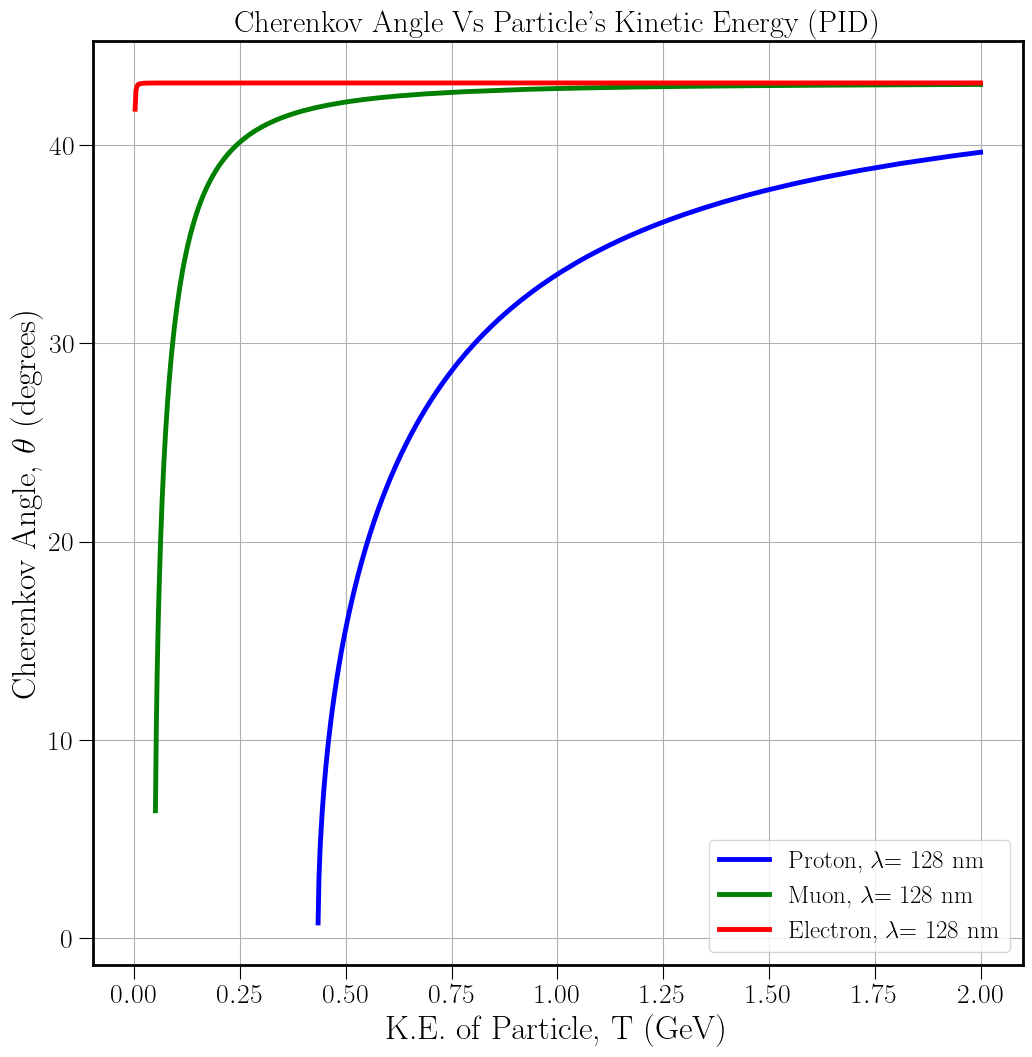

In [249]:
# Cherenkov Angle vs Charged Particle Momentum/K.E/Beta (at the scintillation wavelength of 128 nm)

#Electron
e = 9.11e-31 #Electron's mass in Kg.
me = e*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Muon
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

#Proton
m = 1.67e-27  #mass of proton in Kg
mp = 938  #Proton's mass in MeV


c= 3e8  #speed of light in m/s
rho = 1380 #density of LAr in kg/m^3 at 89 K

n = 1.37  #(Approx Fit/Exp. Data)
# n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                  #https://arxiv.org/abs/2002.09346

    
t = np.linspace(0, 2000, 1000) #K.E of Proton  in MeV
# t = np.logspace(0, 2000, 1000) #K.E of Proton  in MeV

tgev= t/1000  #1 GeV = 1.602e-10 J

# beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 
betap  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gammap = (1-betap**2)**(-0.5)

betamu  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
gammamu = (1-betamu**2)**(-0.5)

betae  = np.sqrt(1 - (1/(1 + t/me)**2)) #Relativistic Approach 
gammae = (1-betae**2)**(-0.5)



# print(beta,gamma)

betamin = 1/n
gammamin = (1-betamin**2)**(-0.5)

tmin = (gammamin-1) * mp #in MeV
tmingev = tmin/1000 #in GeV 
print(betamin,gammamin,tmingev)

# t = np.linspace(tmin, 100000, 1000) #K.E of Proton  in MeV
# tgev= t/1000  #1 GeV = 1.602e-10 J

#beta[:,n] All rows in n-th column 

mom= (m*c*betap)*(1-betap**2)**(-0.5)  #momentum of proton in kgm/s
momgev= mom/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

# tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 


def thetap(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetap = np.arccos(np.round((1/(betap*n)),5))    #theta= cerenkov angle
    
    return thetap

cer_angp = thetap(t,n)*(180/np.pi) #Converting radian in degree

# Create a boolean mask where True indicates non-NaN values
# valid_values = ~np.isnan(cer_angp)
# valid_values = ~np.isnan(cer_angp)

# Use the mask to filter the array
# cer_angp = cer_angp[valid_values]

print(np.shape(tgev), np.shape(cer_angp))
print(tgev, cer_angp)


def thetamu(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetamu = np.arccos(np.round((1/(betamu*n)),5))    #theta= cerenkov angle
    
    return thetamu

cer_angmu = thetamu(t,n)*(180/np.pi) #Converting radian in degree


def thetae(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetae = np.arccos(np.round((1/(betae*n)),5))    #theta= cerenkov angle
    
    return thetae

cer_ange = thetae(t,n)*(180/np.pi) #Converting radian in degree


#Plot without considering Energy loss in the LAr medium.

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev, cer_angp, color='b', lw=3.5, label="Proton, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
ax.plot(tgev, cer_angmu, color='g', lw=3.5, label="Muon, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
ax.plot(tgev, cer_ange, color='r', lw=3.5, label="Electron, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])

# ax.plot(momgev, cer_angp, color='b', lw=3.5, label="Proton, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
# ax.plot(momgev, cer_angmu, color='g', lw=3.5, label="Muon, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
# ax.plot(momgev, cer_ange, color='r', lw=3.5, label="Electron, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])

# ax.plot(tgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
# ax.plot(tgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# ax.set_title(r"Cherenkov Angle Vs Proton's Momentum (PID)", fontsize=22)
ax.set_title(r"Cherenkov Angle Vs Particle's Kinetic Energy (PID)", fontsize=22)

ax.set_xlabel(r"K.E. of Particle, T (GeV)",fontsize=24)
# ax.set_xlabel(r"Momentum of Particle, T (GeV)",fontsize=24)
ax.set_ylabel(r"Cherenkov Angle, $\theta$ (degrees)",fontsize=24) #

# plt.xlim(0,1)

ax.grid()
ax.legend(fontsize=18)
# plt.savefig("Cherenkov Angle_vs_Protons_Kinetic_Energy_leq1GeV.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov Angle_vs_Electrons_Kinetic_Energy_leq2GeV.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov Angle_vs_Particles_Kinetic_Energy_leq2GeV_PID.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov Angle_vs_Particles_Momentum_leq2GeV_PID.jpg", bbox_inches= 'tight')

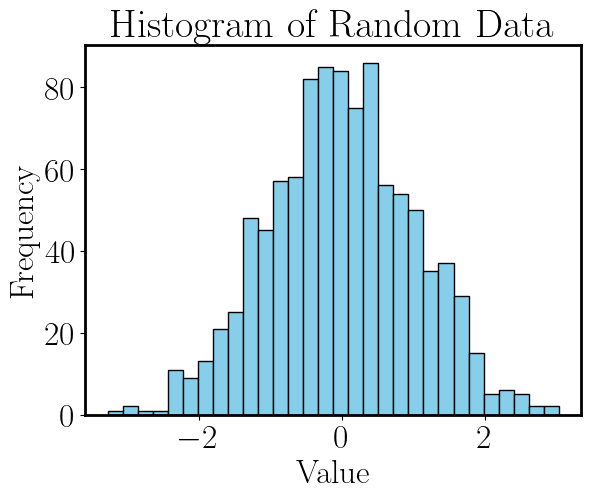

In [210]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(1000)

# Create a histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')

# Show the plot
plt.show()

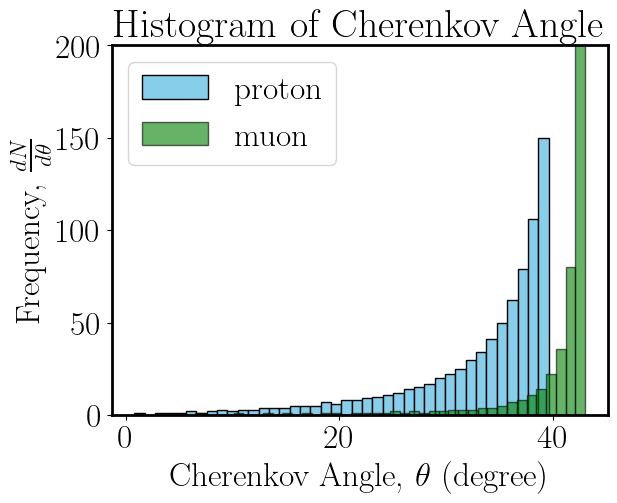

<Figure size 640x480 with 0 Axes>

In [266]:
# Create a histogram
plt.hist(cer_angp, bins=40, color='skyblue', edgecolor='black', label='proton')
plt.hist(cer_angmu, bins=40, color='green', edgecolor='black', label='muon', alpha=0.6)

# Add labels and title
plt.xlabel(r'Cherenkov Angle, $\theta$ (degree)')
plt.ylabel(r'Frequency, $\frac{dN}{d\theta}$')
plt.title('Histogram of Cherenkov Angle')

plt.ylim(0,200)
plt.legend()

# Show the plot
plt.show()

plt.savefig("Cherenkov_angle_histogram2.jpg", bbox_inches='tight')

[218   0   1   0   2   1   2   2   2   2   3   3   4   4   4   5   6   6
   6   7   8   9  10  10  12  14  15  16  19  22  25  30  34  41  50  63
  80 108 156] [ 0.          1.01601422  2.03202843  3.04804265  4.06405687  5.08007109
  6.0960853   7.11209952  8.12811374  9.14412795 10.16014217 11.17615639
 12.1921706  13.20818482 14.22419904 15.24021326 16.25622747 17.27224169
 18.28825591 19.30427012 20.32028434 21.33629856 22.35231277 23.36832699
 24.38434121 25.40035543 26.41636964 27.43238386 28.44839808 29.46441229
 30.48042651 31.49644073 32.51245494 33.52846916 34.54448338 35.5604976
 36.57651181 37.59252603 38.60854025 39.62455446]
1.0160142170200877
1.1036487190449231


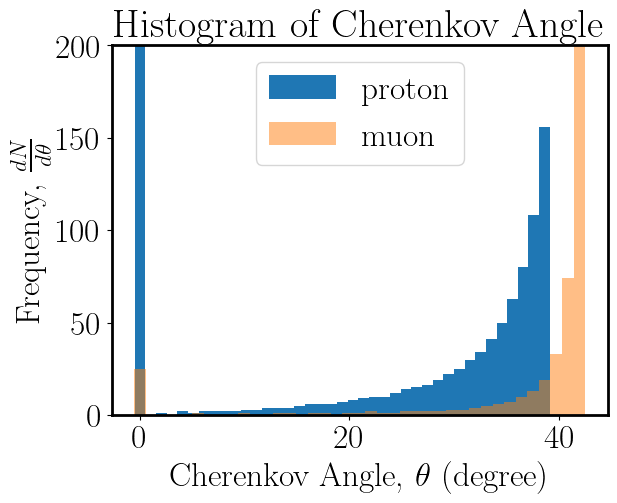

2


In [297]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
# data = np.random.normal(0, 1, 1000)  # Example data

#Setting NaN to 0 or any desired value for histogram function

# data = np.array([1, np.nan, 3, 5, 1, 2, 5, 2, 4, 1, 2, np.nan, 2, 1, np.nan, 2, np.nan, 1, 2])
# data_filled = np.nan_to_num(data, nan=0) # Replaces NaN with 0, or any other desired value
# plt.hist(data_filled)

cer_angp_filled = np.nan_to_num(cer_angp, nan=0) # Replaces NaN with 0, or any other desired value
# print(cer_angp_filled)

cer_angmu_filled = np.nan_to_num(cer_angmu, nan=0) # Replaces NaN with 0, or any other desired value
# print(cer_angmu_filled)

# Calculate histogram
histp, bin_edgesp = np.histogram(cer_angp_filled, bins=39)
histmu, bin_edgesmu = np.histogram(cer_angmu_filled, bins=39)

print(histp, bin_edgesp)

# Calculate bar width
bin_widthp = bin_edgesp[1] - bin_edgesp[0]
print(bin_widthp)

bin_widthmu = bin_edgesmu[1] - bin_edgesmu[0]
print(bin_widthmu)

# Create the histogram
plt.bar(bin_edgesp[:-1], histp, width=bin_widthp, label='proton')
plt.bar(bin_edgesmu[:-1], histmu, width=bin_widthmu, alpha=0.5, label='muon')

# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.title("Histogram")

# Add labels and title
plt.xlabel(r'Cherenkov Angle, $\theta$ (degree)')
plt.ylabel(r'Frequency, $\frac{dN}{d\theta}$')
plt.title('Histogram of Cherenkov Angle')

plt.legend()
plt.ylim(0,200)
plt.show()

# Accessing the frequency of a specific bin
# Example: get the frequency of the 5th bin
frequency_of_5th_bin_p = histp[4]
print(frequency_of_5th_bin_p)

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\2544151777.py:14: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


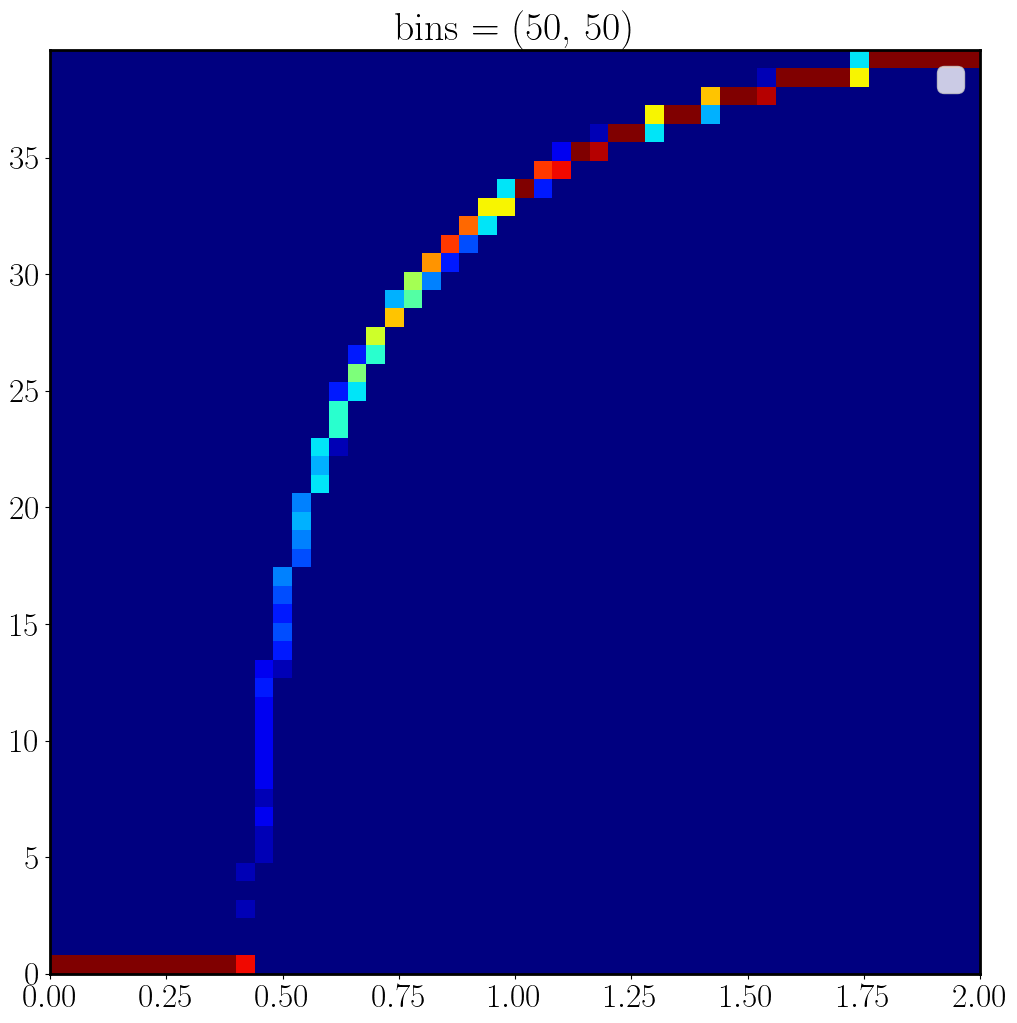

In [317]:
#2D Histogram 

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

# Big bins
# plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
ax.hist2d(tgev, cer_angp_filled, bins=(50, 50), cmap=plt.cm.jet, label='proton')
# ax.hist2d(tgev, cer_angmu_filled, bins=(50, 50), cmap=plt.cm.jet, label='muon')

ax.set_title('bins = (50, 50)')

ax.legend()

plt.show()


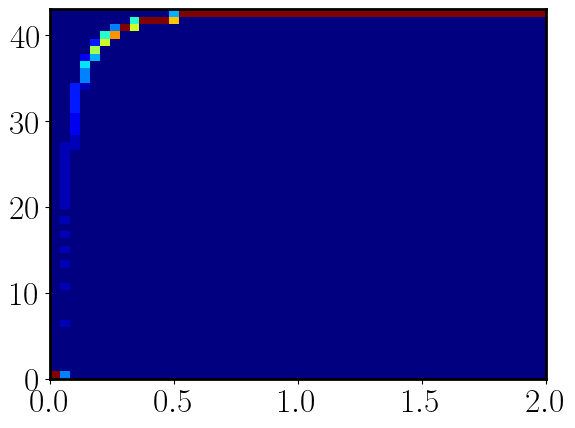

In [309]:
plt.hist2d(tgev, cer_angmu_filled, bins=(50, 50), cmap=plt.cm.jet)
plt.show()

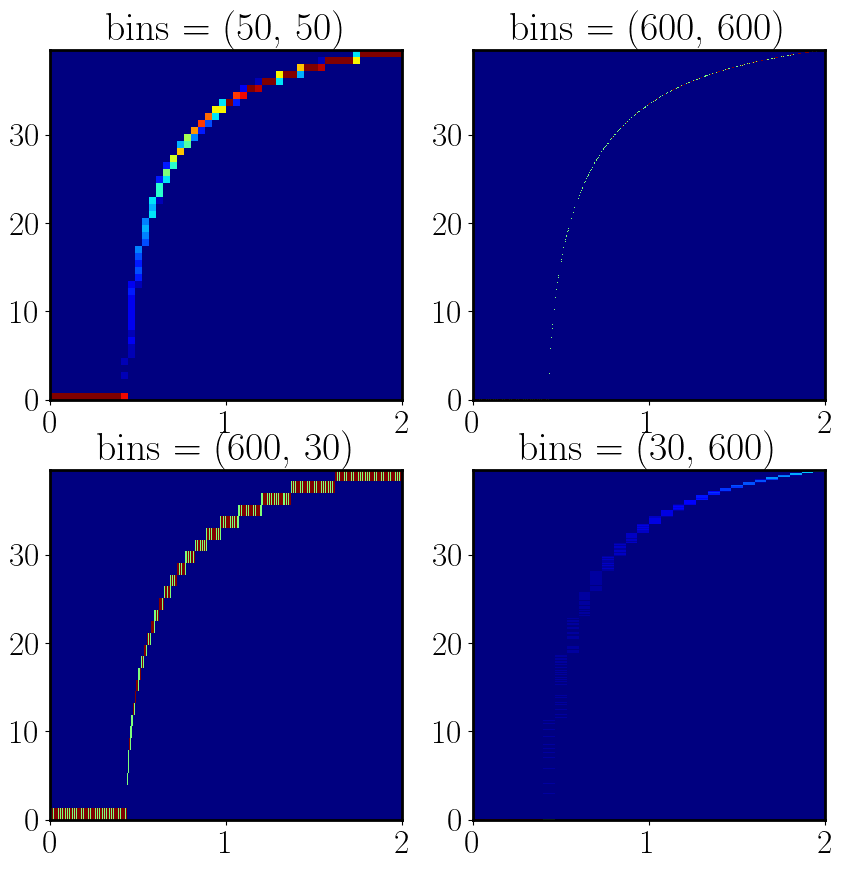

In [393]:
#Proton's Cherenkov Angle 2D Histogram

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

x = tgev
y = cer_angp_filled
z = cer_angmu_filled

# Big bins
axs[0,0].hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet) #, label='proton'
# axs[0,0].hist2d(x, ym, bins=(50, 50), cmap=plt.cm.jet, label='muon')
axs[0, 0].set_title('bins = (50, 50)')
 
# Small bins
axs[0,1].hist2d(x, y, bins=(600, 600), cmap=plt.cm.jet)
axs[0, 1].set_title('bins = (600, 600)')
 
# If you do not set the same values for X and Y, the bins won't be a square!
axs[1,0].hist2d(x, y, bins=(600, 30), cmap=plt.cm.jet)
axs[1, 0].set_title('bins = (600, 30)')

# If you do not set the same values for X and Y, the bins won't be a square!
axs[1,1].hist2d(x, y, bins=(30, 600), cmap=plt.cm.jet)
axs[1, 1].set_title('bins = (30, 600)')

# plt.legend()
plt.show()
# plt.savefig("Cherenkov_angle_T_Proton_2D_histogram_4pannel.jpg", bbox_inches='tight')

In [392]:
# #Muon's Cherenkov Angle 2D Histogram

# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# x = tgev
# y = cer_angp_filled
# z = cer_angmu_filled

# # Big bins
# axs[0,0].hist2d(x, z, bins=(50, 50), cmap=plt.cm.jet) #, label='muon'
# # axs[0,0].hist2d(x, ym, bins=(50, 50), cmap=plt.cm.jet, label='muon')
# axs[0, 0].set_title('bins = (50, 50)')
 
# # Small bins
# axs[0,1].hist2d(x, z, bins=(600, 600), cmap=plt.cm.jet)
# axs[0, 1].set_title('bins = (600, 600)')
 
# # If you do not set the same values for X and Y, the bins won't be a square!
# axs[1,0].hist2d(x, z, bins=(600, 30), cmap=plt.cm.jet)
# axs[1, 0].set_title('bins = (600, 30)')

# # If you do not set the same values for X and Y, the bins won't be a square!
# axs[1,1].hist2d(x, z, bins=(30, 600), cmap=plt.cm.jet)
# axs[1, 1].set_title('bins = (30, 600)')

# # plt.legend()
# plt.show()
# plt.savefig("Cherenkov_angle_T_Muon_2D_histogram_4pannel.jpg", bbox_inches='tight')

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\2699561474.py:4: RuntimeWarning: invalid value encountered in divide
  z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)


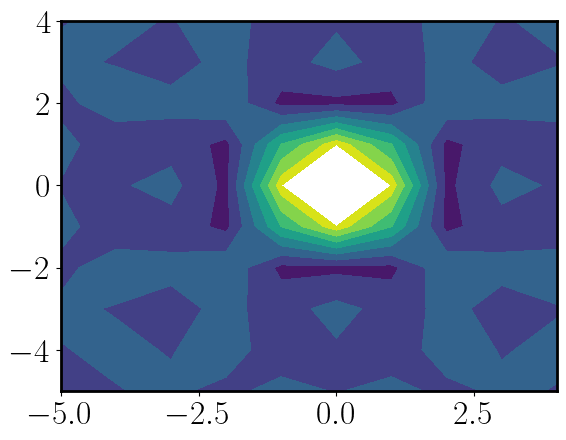

In [351]:
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

(1000,) (1000,)
(1000, 1000) (1000, 1000) (1000, 1000) (1000, 1000)
[[0.       0.002002 0.004004 ... 1.995996 1.997998 2.      ]
 [0.       0.002002 0.004004 ... 1.995996 1.997998 2.      ]
 [0.       0.002002 0.004004 ... 1.995996 1.997998 2.      ]
 ...
 [0.       0.002002 0.004004 ... 1.995996 1.997998 2.      ]
 [0.       0.002002 0.004004 ... 1.995996 1.997998 2.      ]
 [0.       0.002002 0.004004 ... 1.995996 1.997998 2.      ]]


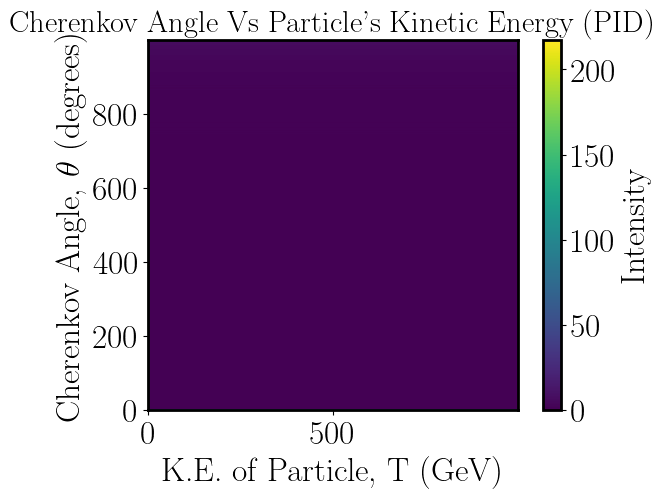

In [391]:
import matplotlib.pyplot as plt
import numpy as np

print(np.shape(tgev), np.shape(cer_angp))
# print(tgev, cer_angp)


# ax.set_title(r"Cherenkov Angle Vs Proton's Momentum (PID)", fontsize=22)
plt.title(r"Cherenkov Angle Vs Particle's Kinetic Energy (PID)", fontsize=22)

plt.xlabel(r"K.E. of Particle, T (GeV)",fontsize=24)
# ax.set_xlabel(r"Momentum of Particle, T (GeV)",fontsize=24)
plt.ylabel(r"Cherenkov Angle, $\theta$ (degrees)",fontsize=24) #

# plt.xlim(0,1)

# ax.grid()
# ax.legend(fontsize=18)

# # Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

# print(np.shape(x), np.shape(y), np.shape(z))
# print(x,y,z)


# x, y = np.meshgrid(tgev, cer_angp_filled)

# x, x = np.meshgrid(tgev, tgev)
# y, y = np.meshgrid(cer_angp_filled, cer_angp_filled)
x, y = np.meshgrid(tgev, cer_angp_filled)

# x= tgev
# y = cer_angp_filled

# z = x*y

hist_ang, bin_edges_ang = np.histogram(cer_angp_filled, bins=1000)

hist_t, bin_edges_t = np.histogram(tgev, bins=1000)

a, b = np.meshgrid(hist_t, hist_ang)

print(np.shape(x), np.shape(y), np.shape(a), np.shape(b))

print(x) 


# # Calculate histogram

# hist_ang, bin_edges_ang = np.histogram(cer_angp_filled, bins=39)

# hist_t, bin_edges_t = np.histogram(tgev, bins=39)

# print(np.shape(hist_ang), np.shape(bin_edges_ang))
# print(np.shape(hist_t), np.shape(bin_edges_t))

# # print(hist_ang, bin_edges_ang)
# # print(hist_t, bin_edges_t)

# print(np.shape(hist_ang[1:]), np.shape(bin_edges_ang[2:]))
# print(np.shape(hist_t[1:]), np.shape(bin_edges_t[2:]))

# # print(hist_ang[1:], bin_edges_ang[2:])
# # print(hist_t[1:], bin_edges_t[2:])


# # x = bin_edges_t[2:]
# # y = bin_edges_ang[2:]
# # # z = np.histogram(cer_angp_filled, bins=20)
# # z = hist_ang[1:]


# # Accessing the frequency of a specific bin
# # Example: get the frequency of the 5th bin
# frequency_of_5th_bin = hist_ang[4]
# print('frequency_of_5th_bin= {}'.format(frequency_of_5th_bin))

#Create 2D histogram

# plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet) #, label='muon'
# plt.hist2d(x, z, bins=(50, 50), cmap=plt.cm.jet) #, label='muon'

# axs[0,0].hist2d(x, ym, bins=(50, 50), cmap=plt.cm.jet, label='muon')
# plt.title('bins = (50, 50)')


# Create the intensity plot using imshow
# plt.imshow(b, extent=[np.min(x), np.max(x), np.min(y), np.max(y)], origin='lower', cmap='viridis') #extent=[-5, 5, -5, 5], extent=[np.min(x), np.max(x), np.min(y), np.max(y)], 
plt.imshow(b, origin='lower', cmap='viridis') #extent=[0, 2000, 0, 40], 

plt.colorbar(label='Intensity')  # Add a colorbar to show intensity scale
# # plt.xlabel('x')
# # plt.ylabel('y')
# # plt.title('Intensity Plot')
plt.show()



[[-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 ...
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]] [[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.7  4.7  4.7 ...  4.7  4.7  4.7]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]] [[0.13533528 0.14080209 0.14637258 ... 0.15204177 0.14637258 0.14080209]
 [0.14080209 0.14648972 0.15228523 ... 0.15818343 0.15228523 0.14648972]
 [0.14637258 0.15228523 0.15831002 ... 0.16444156 0.15831002 0.15228523]
 ...
 [0.15204177 0.15818343 0.16444156 ... 0.17081059 0.16444156 0.15818343]
 [0.14637258 0.15228523 0.15831002 ... 0.16444156 0.15831002 0.15228523]
 [0.14080209 0.14648972 0.15228523 ... 0.15818343 0.15228523 0.14648972]]
(100, 100) (100, 100) (100, 100)


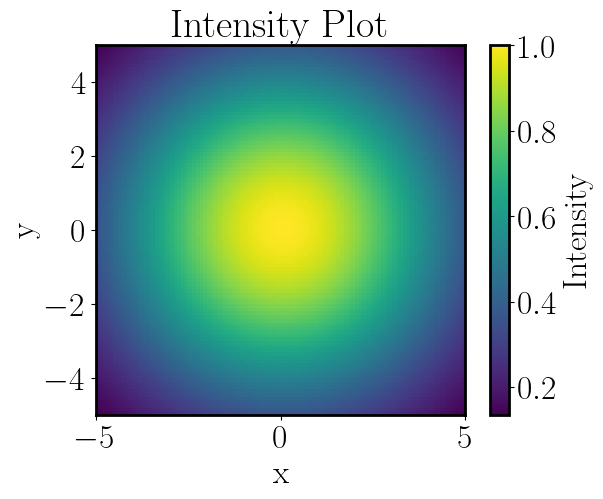

In [343]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample 2D data (e.g., a 2D Gaussian)
x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
z = np.exp(-(x**2 + y**2) / 25)

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))

# Create the intensity plot using imshow
plt.imshow(z, extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
plt.colorbar(label='Intensity')  # Add a colorbar to show intensity scale
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intensity Plot')
plt.show()

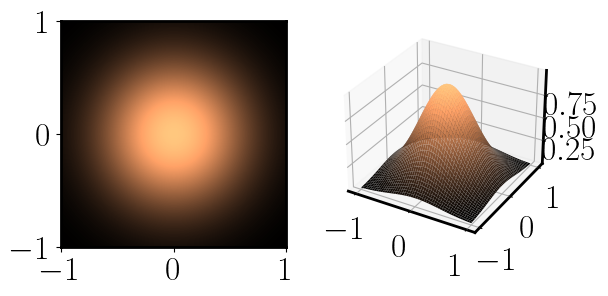

In [368]:
# exploring_meshgrid.py

import matplotlib.pyplot as plt
import numpy as np

wavelength = 0.5
x = y = np.linspace(-1, 1, 1000)

X, Y = np.meshgrid(x, y)

output = np.exp(-5 * (X ** 2) / 2 - 5 * (Y ** 2) / 2)

fig = plt.figure()

ax = fig.add_subplot(121)
ax.imshow(
    output,
    cmap="copper",
    extent=[np.min(x), np.max(x), np.min(y), np.max(y)],
)

ax = fig.add_subplot(122, projection="3d")
ax.plot_surface(X, Y, output, cmap="copper")

plt.show()

In [394]:
#Refractive index new fit: M. Sievert (Mathematica equivalent)
# initially
# a_0 = 1.189
# a_pvs = 0.00029
# tau = 0.0005

# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
tau = 0.000693652

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239


# lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd = np.linspace(90,700,2000)   #wavelength of light 


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd_peak = 115.11 #where n is max 


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + tau**2)))

n_jackson = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

#absorption co-efficient, alpha 

sigma = (lamd_peak - lamd_uv)
mu = lamd_peak
abs_coeff = np.exp(-(lamd - lamd_peak)**2/(2*sigma**2))/(np.sqrt(2*np.pi*sigma**2))

# plt.plot(n_pvs)

#Plot of n vs lambda in the LAr medium.

x = np.array([643.9, 578.0, 546.1, 508.6, 475.3, 435.8, 406.3, 365.0, 361.2, 128.0]) #xdata: wavelength in nm 
y = np.array([1.2256, 1.2264, 1.2269, 1.2277, 1.2285, 1.2297, 1.2308, 1.2331, 1.2326, 1.358]) #ydata: refractive index 1.358+/-0.003

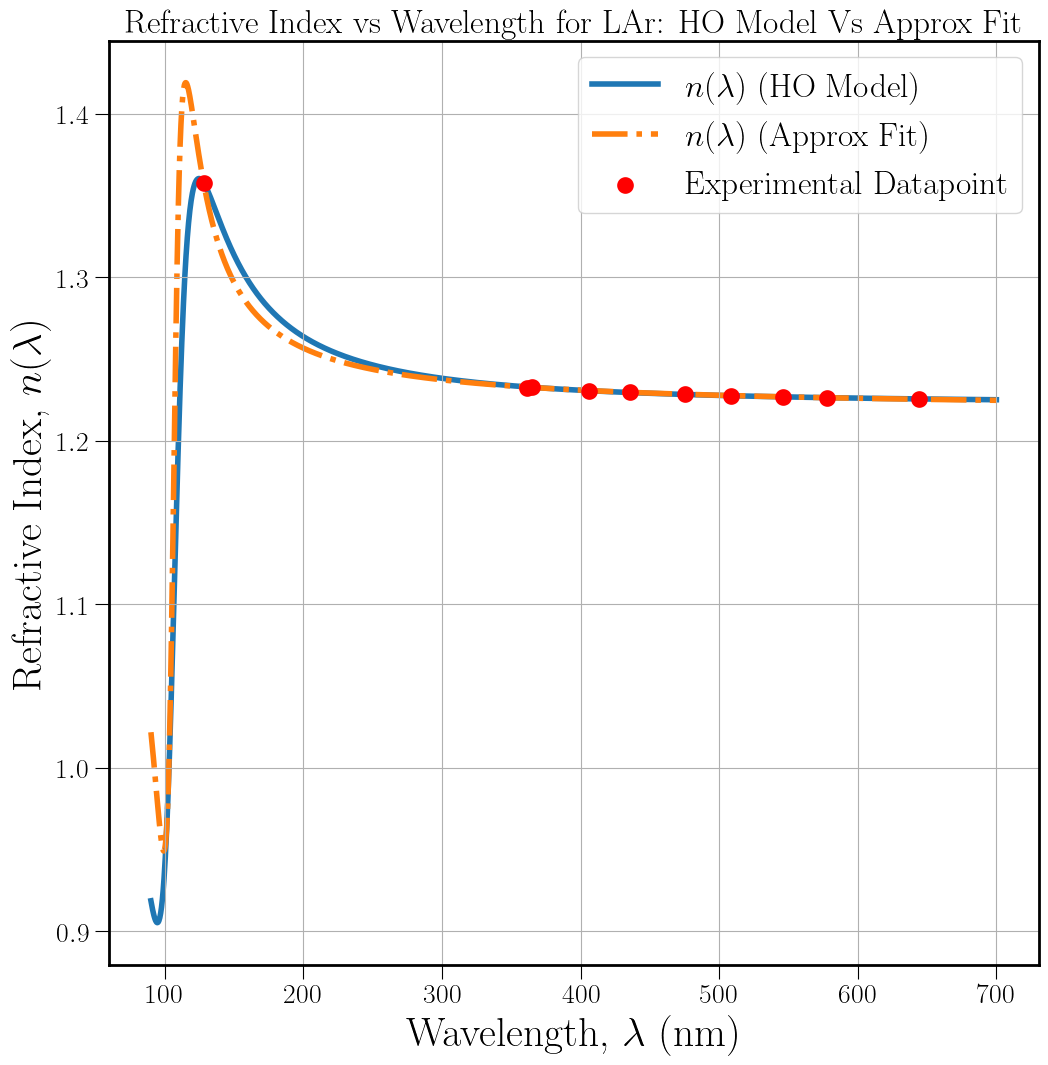

In [395]:
# plt.plot(x, y, 'ro')
# pyplot.scatter(x, y)
#Plot of n vs lambda in the LAr medium near Resonance  



fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

# plt.rc('text', usetex=False)
# plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# #     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams["font.weight"] = "bold"     
# #     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

ax.set_title("Refractive Index vs Wavelength for LAr: HO Model Vs Approx Fit", fontsize=24)
# # ax.set_title("Refractive Index vs Wavelength for LAr:  Absorptive Fits", fontsize=24)
ax.plot(lamd, n_jackson, linewidth = 4, label=r'$n(\lambda)$ (HO Model)', zorder=1)
ax.plot(lamd, n_pvs, ls= 'dashdot', linewidth = 4, label='$n(\lambda)$ (Approx Fit)', zorder=1)

ax.scatter(x, y, color= 'r', linewidth= 6, label= "Experimental Datapoint", zorder=2) #'o', s= 5, color='b'

# # ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel(r'Wavelength, $\lambda$ (nm)',fontsize=30)
ax.set_ylabel(r'Refractive Index, $n(\lambda)$',fontsize=30)
ax.grid()
ax.legend(fontsize=24)

# plt.savefig("n_vs_lambda_hofit_full_withdatapoints.jpg", bbox_inches= 'tight') #Ctrl+/ to comment in or out 
# plt.savefig("n_vs_lambda_absfits_full_withdatapoints.jpg", bbox_inches= 'tight') #Ctrl+/ to comment in or out 

0.7299270072992701 1.4630040626110135 0.4342978107291306


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\188544299.py:66: RuntimeWarning: divide by zero encountered in divide
  thetap_aprx = np.arccos(np.round((1/(betap*n_aprx)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\188544299.py:66: RuntimeWarning: invalid value encountered in arccos
  thetap_aprx = np.arccos(np.round((1/(betap*n_aprx)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\188544299.py:76: RuntimeWarning: divide by zero encountered in divide
  thetap_ho = np.arccos(np.round((1/(betap*n_ho)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\188544299.py:76: RuntimeWarning: invalid value encountered in arccos
  thetap_ho = np.arccos(np.round((1/(betap*n_ho)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\188544299.py:87: RuntimeWarning: divide by zero encountered in divide
  thetamu_aprx = np.arccos(np.round((1/(betamu*n_aprx)

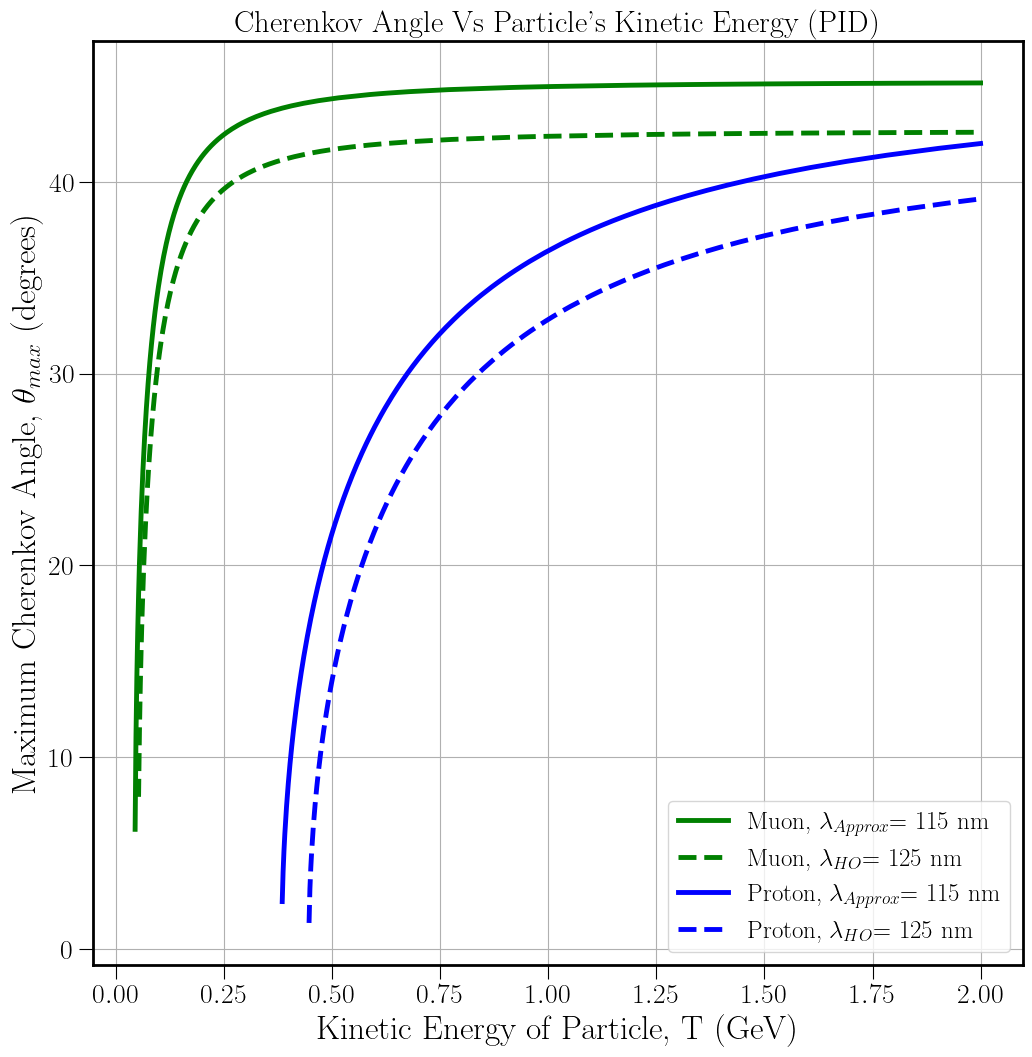

In [208]:
# Cherenkov Angle vs Charged Particle Momentum/K.E/Beta (at the peak wavelength of 115 nm (Approx fit) and 125 nm (HO fit))

#Electron
e = 9.11e-31 #Electron's mass in Kg.
me = e*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Muon
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

#Proton
m = 1.67e-27  #mass of proton in Kg
mp = 938  #Proton's mass in MeV


c= 3e8  #speed of light in m/s
rho = 1380 #density of LAr in kg/m^3 at 89 K

n = 1.37  #(Approx Fit/Exp. Data)
# n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                  #https://arxiv.org/abs/2002.09346
n_aprx = 1.42 #at 115 nm
n_ho = 1.36 #at 125 nm
    
t = np.linspace(0, 2000, 1000) #K.E of Proton  in MeV
# t = np.logspace(0, 2000, 1000) #K.E of Proton  in MeV

tgev= t/1000  #1 GeV = 1.602e-10 J

# beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 
betap  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gammap = (1-betap**2)**(-0.5)

betamu  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
gammamu = (1-betamu**2)**(-0.5)

betae  = np.sqrt(1 - (1/(1 + t/me)**2)) #Relativistic Approach 
gammae = (1-betae**2)**(-0.5)



# print(beta,gamma)

betamin = 1/n   #n_max
gammamin = (1-betamin**2)**(-0.5)

tmin = (gammamin-1) * mp #in MeV
tmingev = tmin/1000 #in GeV 
print(betamin,gammamin,tmingev)

# t = np.linspace(tmin, 100000, 1000) #K.E of Proton  in MeV
# tgev= t/1000  #1 GeV = 1.602e-10 J

#beta[:,n] All rows in n-th column 

mom= (m*c*betap)*(1-betap**2)**(-0.5)  #momentum of proton in kgm/s
momgev= mom/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

# tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 



def thetap_aprx(t,n_aprx):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetap_aprx = np.arccos(np.round((1/(betap*n_aprx)),5))    #theta= cerenkov angle
    
    return thetap_aprx

cer_angp_aprx = thetap_aprx(t,n_aprx)*(180/np.pi) #Converting radian in degree


def thetap_ho(t,n_ho):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetap_ho = np.arccos(np.round((1/(betap*n_ho)),5))    #theta= cerenkov angle
    
    return thetap_ho

cer_angp_ho = thetap_ho(t,n_ho)*(180/np.pi) #Converting radian in degree



def thetamu_aprx(t,n_aprx):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetamu_aprx = np.arccos(np.round((1/(betamu*n_aprx)),5))    #theta= cerenkov angle
    
    return thetamu_aprx

cer_angmu_aprx = thetamu_aprx(t,n_aprx)*(180/np.pi) #Converting radian in degree


def thetamu_ho(t,n_ho):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetamu_ho = np.arccos(np.round((1/(betamu*n_ho)),5))    #theta= cerenkov angle
    
    return thetamu_ho

cer_angmu_ho = thetamu_ho(t,n_ho)*(180/np.pi) #Converting radian in degree


# def thetae(t,n):
          
# #     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
#     thetae = np.arccos(np.round((1/(betae*n)),5))    #theta= cerenkov angle
    
#     return thetae

# cer_ange = thetae(t,n)*(180/np.pi) #Converting radian in degree


#Plot without considering Energy loss in the LAr medium.

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev, cer_angmu_aprx, color='g', lw=3.5, label="Muon, $\\lambda_{Approx}$= 115 nm")   #, label="n = {}".format(n[0])
ax.plot(tgev, cer_angmu_ho, color='g', lw=3.5, ls='dashed', label="Muon, $\\lambda_{HO}$= 125 nm")   #, label="n = {}".format(n[0])

ax.plot(tgev, cer_angp_aprx, color='b', lw=3.5, label="Proton, $\\lambda_{Approx}$= 115 nm")   #, label="n = {}".format(n[0])
ax.plot(tgev, cer_angp_ho, color='b', lw=3.5, ls='dashed', label="Proton, $\\lambda_{HO}$= 125 nm")   #, label="n = {}".format(n[0])


# ax.plot(tgev, cer_ange, color='r', lw=3.5, label="Electron, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])

# ax.plot(tgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
# ax.plot(tgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# ax.set_title(r"Cherenkov Angle Vs Proton's Kinetic Energy", fontsize=22)
ax.set_title(r"Cherenkov Angle Vs Particle's Kinetic Energy (PID)", fontsize=22)

ax.set_xlabel(r"Kinetic Energy of Particle, T (GeV)",fontsize=24)
ax.set_ylabel(r"Maximum Cherenkov Angle, $\theta_{max}$ (degrees)",fontsize=24) #

# plt.xlim(0,1)

ax.grid()
ax.legend(fontsize=18)
# plt.savefig("Cherenkov_Angle_vs_Protons_Kinetic_Energy_leq1GeV.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov_Angle_vs_Electrons_Kinetic_Energy_leq2GeV.jpg", bbox_inches= 'tight')

# plt.savefig("Cherenkov_angle_max_vs_particles_kinetic_energy_leq2GeV_PID.jpg", bbox_inches= 'tight')

In [277]:
#2D Histogram 

# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# create data
size = 100000
df = pd.DataFrame({
   'x': np.random.normal(size=size),
   'y': np.random.normal(size=size)
})
df.head()

x         y
0  0.856662  0.443515
1 -0.358407  2.790956
2 -0.642120 -1.288293
3  0.210297 -0.161506
4 -0.615043  1.264909

In [290]:
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Big bins
axs[0,0].hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
axs[0, 0].set_title('bins = (50, 50)')
 
# Small bins
axs[0,1].hist2d(x, y, bins=(600, 600), cmap=plt.cm.jet)
axs[0, 1].set_title('bins = (600, 600)')
 
# If you do not set the same values for X and Y, the bins won't be a square!
axs[1,0].hist2d(x, y, bins=(600, 30), cmap=plt.cm.jet)
axs[1, 0].set_title('bins = (600, 30)')

# If you do not set the same values for X and Y, the bins won't be a square!
axs[1,1].hist2d(x, y, bins=(30, 600), cmap=plt.cm.jet)
axs[1, 1].set_title('bins = (30, 600)')

plt.show()

ValueError: too many values to unpack (expected 2)

# Betalist, K.E. Loss \& Range : Electrons

In [118]:
#Calculating Betalist for Electrons with different K.E.

#Parameters

rho = 1.38 #density of LAr in kg/m^3 at 89K temperature  
me = 9.11e-31 #Electron's mass in Kg.
io = 23.6e-6  #Average Ionization Potential of LAr in MeV
k =  0.307  #Constant in MeV.cm^2/g 
zb = 18  #Atomic No of Ar (absorber)
a = 39.948  #Mass no of Ar (absorber)
zs = -1 #charge of the particle 
c = 3e8
e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)
print(e)
#Mass of the particle travelling
# mp = 938 #Proton's mass
# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

k1 = k*rho*zb*zs**2/a
k2 = 2*e/io 

alpha = 1/137 #Fine-structure (EM coupling) constant 

# t = np.array([0,43.11,50.24,100,200,300,400,500,600,800,1000,1200,1500,1800,2000])
t = np.array([0,5,10,15,20,25,50,100,200,500])
b  = np.sqrt(1 - (1/(1 + t/e)**2)) #Relativistic Approach 
print(t, b)

0.5117977528089888
[  0   5  10  15  20  25  50 100 200 500] [0.         0.99567965 0.99881404 0.99945555 0.99968867 0.99979875
 0.99994867 0.99998704 0.99999674 0.99999948]


In [119]:
#Defining a function to calculate the betalist for some given initial K.E of Electons in LAr
#Calculating range of Electrons with different initial KE travelling in LAr:

# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# t_arr = np.array([0,148.8,155.9,200,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,


#def make_first_list(t):


def make_betaliste(t,x,dx):
    ''' t = t_list input from data'''
    
    
    xlist = []
    tlist = [] 
    tslope = []
    betalist = []
    
#     x = 0 #in cm 
#     dx = 0.01 #in cm 
    
    while t>0: 
        
        betae  = np.sqrt(1 - (1/(1 + t/e)**2)) #Relativistic Approach 
        t_slope = (((k1*np.log(k2*(betae**2/(1-betae**2))))/betae**2) - k1)
        t = t - (t_slope * dx)
        tslope.append(t_slope)
        tlist.append(t)
        betalist.append(betae)

        x=x+dx    
        xlist.append(x)
        
#       print(t, beta, xlist)
         
    #Linear Interpolation: 

    if (len(tlist)>1)  and (len(xlist)>1):
    
        tnp1 = tlist[-1]
        tnp2 = tlist[-2]
        xnp1 = xlist[-1]
        xnp2 = xlist[-2]
        
        rang = xnp2 - (tnp2 * ((xnp1-xnp2)/(tnp1 - tnp2))) #Range of Proton: Relativistic approach 
#         print(betalist)
        
        return betalist  #range


betalist_100 = make_betaliste(100,0,0.1)
print(betalist_100)

[0.9999870361055309, 0.9999869358680652, 0.9999868345023224, 0.9999867319916129, 0.9999866283189415, 0.9999865234669997, 0.9999864174181595, 0.999986310154466, 0.9999862016576304, 0.9999860919090221, 0.9999859808896616, 0.9999858685802125, 0.9999857549609735, 0.9999856400118702, 0.9999855237124461, 0.999985406041855, 0.9999852869788514, 0.9999851665017813, 0.9999850445885731, 0.999984921216728, 0.99998479636331, 0.9999846700049354, 0.9999845421177632, 0.9999844126774837, 0.9999842816593077, 0.9999841490379554, 0.9999840147876442, 0.9999838788820774, 0.999983741294432, 0.9999836019973454, 0.9999834609629029, 0.9999833181626246, 0.9999831735674513, 0.9999830271477302, 0.9999828788732015, 0.9999827287129824, 0.9999825766355522, 0.9999824226087368, 0.9999822665996919, 0.999982108574887, 0.9999819485000879, 0.9999817863403389, 0.999981622059945, 0.999981455622453, 0.9999812869906324, 0.999981116126455, 0.9999809429910756, 0.99998076754481, 0.9999805897471137, 0.9999804095565595, 0.999980226

0.5117977528089888
[0.94095349 0.97902138 0.98932342 0.99354537 0.99567965 0.99881404
 0.99945555 0.99968867 0.99979875 0.99994867 0.99998704 0.99999674
 0.99999855 0.99999912 0.99999918 0.99999948]


(array([  1,   2,   3,   4,   5,  10,  15,  20,  25,  50, 100, 200, 300,
        385, 400, 500]),
 array([0.94095349, 0.97902138, 0.98932342, 0.99354537, 0.99567965,
        0.99881404, 0.99945555, 0.99968867, 0.99979875, 0.99994867,
        0.99998704, 0.99999674, 0.99999855, 0.99999912, 0.99999918,
        0.99999948]),
 [1078.489925008281,
  1262.6025184707441,
  1309.351706612889,
  1328.1657461713535,
  1337.6027817248964,
  1351.3738660180188,
  1354.1795880317516,
  1355.1981016239688,
  1355.6788855943385,
  1356.3333989045288,
  1356.5008756579743,
  1356.543241000714,
  1356.5511290739285,
  1356.5536126273262,
  1356.5538953328696,
  1356.5551770438146])

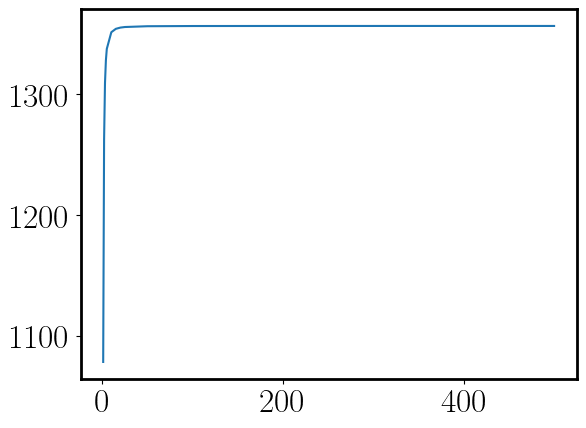

In [120]:
#Instantaneous Cherenkov Yield of Electrons


#Defining Refractive index fit & Calculating Instantaneous Cherenkov Yield of Muons
 

# t = 500 #K.E of Proton  in MeV
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# mp = 938  #Proton's mass in MeV
# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# t = np.array([43.11,50.24,100,200,300,385,400,500,600,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muons in MeV 600,700,800,900,1000 148.8,
# t = np.array([0,5,10,15,20,25,50,100,200,500])
# te = np.array([1,2,3,4,5,10,15,20,25,50])
te = np.array([1,2,3,4,5,10,15,20,25,50,100,200,300,385,400,500]) #,600,800,900,1000,1200,1500,1800,2000

print(e)
betae  = np.sqrt(1 - (1/(1 + te/e)**2)) #Relativistic Approach 
print(betae)

# i = beta 
# print(i)

#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betae - 1))/(2 * (a_0*betae - 1) + lamd_uv * (a_pvs * betae - np.sqrt((a_pvs * betae)**2 - 4 * (a_0*betae - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betae - 1))/(2 * (a_0*betae - 1) + lamd_uv * (a_pvs * betae + np.sqrt((a_pvs * betae)**2 - 4 * (a_0*betae - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 

# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# t = np.array([43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000 
# print(beta)

cerenkovfinallist = []
cerenkovaprxisume = []
x=0
# dx = 0.01 #in cm 
      
for j in te: 
    cerenkovtlist = []
    cerenkovsum = 0
#     mybetalist = make_betalist(j,x,dx)
#     filtered_betalist = [x for x in mybetalist if x > 0.7046534357] 
  
    # for i in filtered_betalist:  #[0:20]
        
        # dx = 0.01 #one that matters 
        
        
#         filtered_xlist = myxlist
#         print(filtered_xlist)

    i  = np.sqrt(1 - (1/(1 + j/e)**2)) #Relativistic Approach 

         
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
        lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
        lmax = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
        lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
        lmax = 500 #nm
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
    no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(j, no_cerenkov_x[0]*1e7)
    cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
    # cerenkovsum += no_cerenkov_x[0] 
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovaprxisume.append(no_cerenkov_x[0] * 1e7) #conversion factor to standard units
    
    
plt.plot(te, cerenkovaprxisume)
te, betae, cerenkovaprxisume
    
# make_betalist(500)

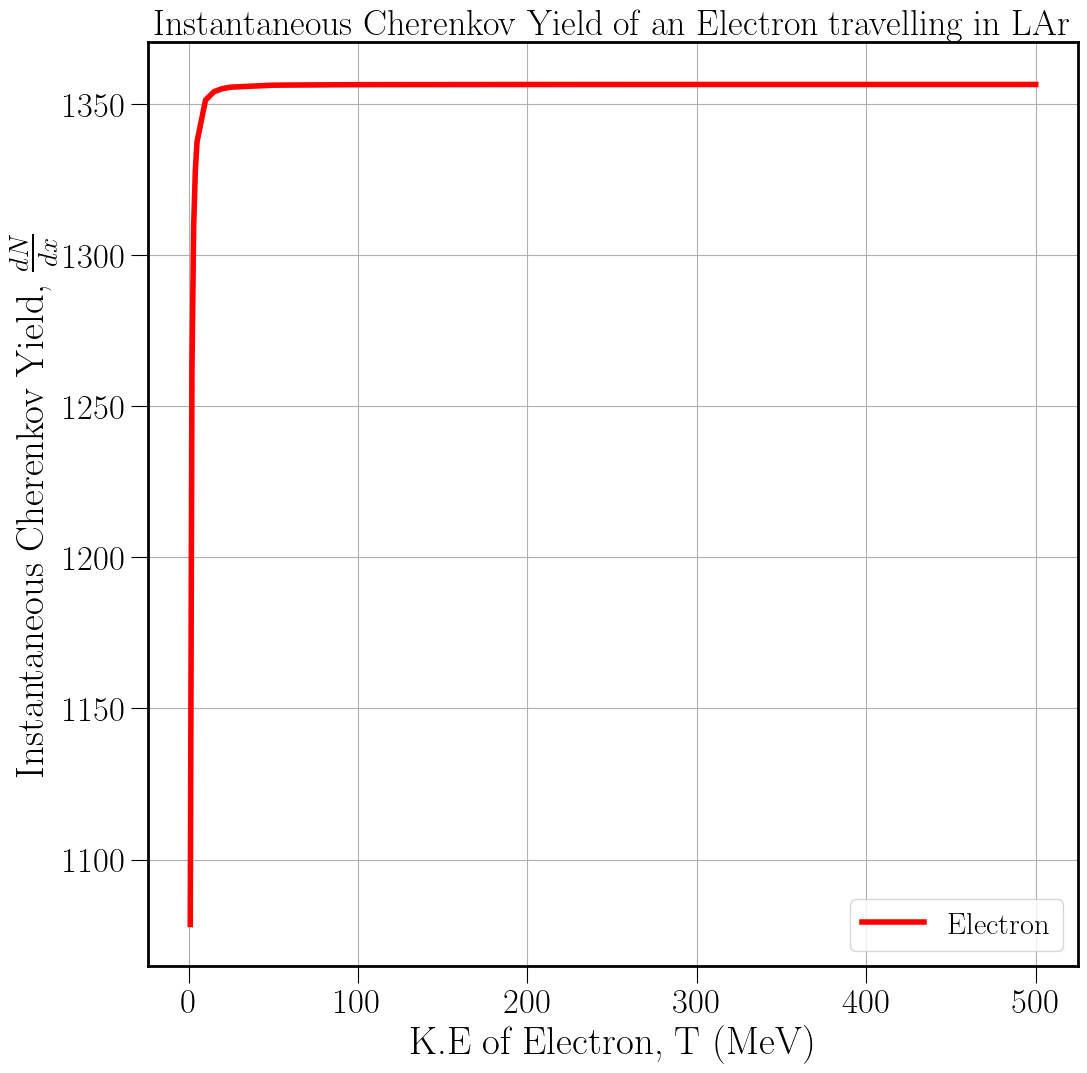

In [121]:
#Plot of instantaneous Cherenkov photons emitted by Muon in the LAr medium. (no vs T)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Instantaneous Cherenkov Yield of an Electron travelling in LAr", fontsize=26)
ax.plot(te, cerenkovaprxisume, linewidth = 4, label='Electron', color='r')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("K.E of Electron, T (MeV)",fontsize=28)
ax.set_ylabel('Instantaneous Cherenkov Yield, $\\frac{dN}{dx}$',fontsize=28)
ax.grid()
ax.legend(fontsize=22)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("Instantaneous_cherenkov_yield_electron_LAr_approxfit.jpg")

[0.94095349 0.97902138 0.98932342 0.99354537 0.99567965 0.99881404
 0.99945555 0.99968867 0.99979875 0.99994867 0.99998704 0.99999674
 0.99999855 0.99999912 0.99999918 0.99999948]


(array([  1,   2,   3,   4,   5,  10,  15,  20,  25,  50, 100, 200, 300,
        385, 400, 500]),
 array([0.94095349, 0.97902138, 0.98932342, 0.99354537, 0.99567965,
        0.99881404, 0.99945555, 0.99968867, 0.99979875, 0.99994867,
        0.99998704, 0.99999674, 0.99999855, 0.99999912, 0.99999918,
        0.99999948]),
 [259.3427435468711,
  733.8833424869197,
  1225.1942700320951,
  1705.2773859943195,
  2181.8750867737986,
  4460.339512566064,
  6616.858955031141,
  8693.136377106062,
  10711.190655623355,
  20287.641656504868,
  38099.262314676474,
  71403.73416817626,
  103115.70367211902,
  129321.48480241153,
  133891.30973249997,
  163987.1821900568])

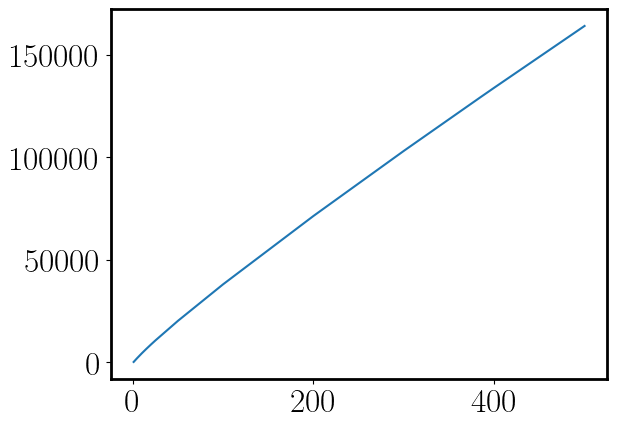

In [122]:
#Defining Refractive index fit & Calculating the total Cherenkov yield 

# t = 500 #K.E of Proton  in MeV
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# mp = 938  #Proton's mass in MeV
# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# te = np.array([43.11,50.24,100,200,300,385,400,500,600,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muons in MeV 600,700,800,900,1000 148.8,

te = np.array([1,2,3,4,5,10,15,20,25,50,100,200,300,385,400,500]) #,600,800,900,1000,1200,1500,1800,2000

betae  = np.sqrt(1 - (1/(1 + te/e)**2)) #Relativistic Approach 
print(betae)

#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betae - 1))/(2 * (a_0*betae - 1) + lamd_uv * (a_pvs * betae - np.sqrt((a_pvs * betae)**2 - 4 * (a_0*betae - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betae - 1))/(2 * (a_0*betae - 1) + lamd_uv * (a_pvs * betae + np.sqrt((a_pvs * betae)**2 - 4 * (a_0*betae - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 

# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# t = np.array([43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000 
# print(beta)

cerenkovfinallist = []
cerenkovaprxsume = []
x=0
dx = 0.1 #in cm 
      
for j in te: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j) #OUTPUT
#     print(make_betalist(j))
    mybetaliste = make_betaliste(j,x,dx)
    filtered_betaliste = [x for x in mybetaliste if x > 0.7046534357] 
    # print(j, np.shape(filtered_betalist) #filtered_betalist)
#     myxlist = make_xlist(j)
#     print(j, filtered_betalist, filtered_xlist) #OUTPUT filtered_betalist, 

  
    for i in filtered_betaliste:  #[0:20]
        
        dx = 0.1 #one that matters 
        
        
#         filtered_xlist = myxlist
#         print(filtered_xlist)

         
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
            lmin = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2))))
            lmax = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2))))
            # print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
            lmin = max(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))), 106.6)
            lmax = 500
            # print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(j, no_cerenkov_x[0]*1e7)
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0] 
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovaprxsume.append(cerenkovsum * 1e6 * dx/0.1) #conversion factor to standard units
    
    
plt.plot(te, cerenkovaprxsume)
te, betae, cerenkovaprxsume
    
# make_betalist(500)

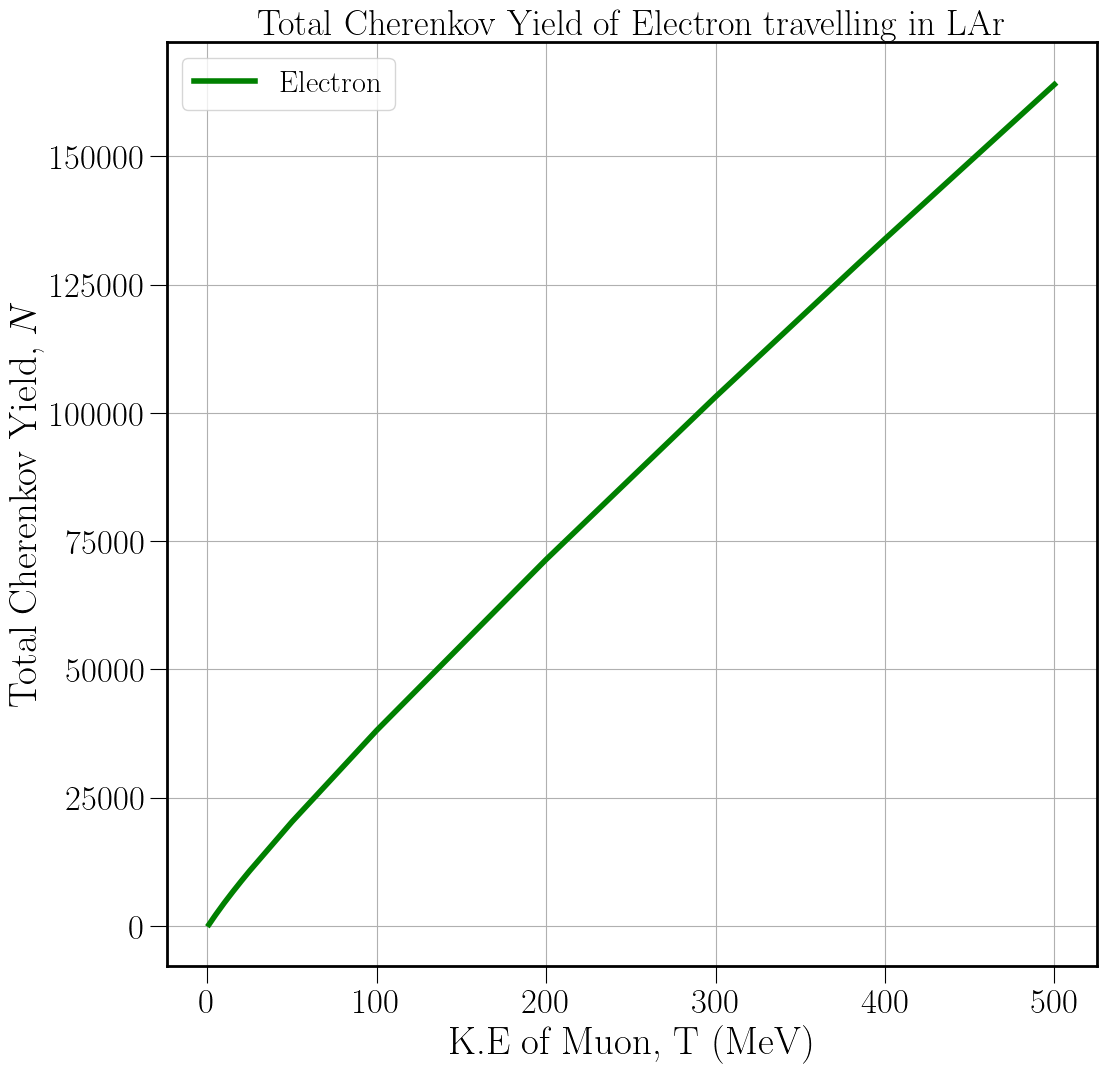

In [123]:
#Plot of Cerenkov photons emitted by Muon in the LAr medium. (no vs T)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Total Cherenkov Yield of Electron travelling in LAr", fontsize=26)
ax.plot(te, cerenkovaprxsume, linewidth = 4, label='Electron', color='g')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("K.E of Muon, T (MeV)",fontsize=28)
ax.set_ylabel('Total Cherenkov Yield, $N$',fontsize=28)
ax.grid()
ax.legend(fontsize=22)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("total_cherenkov_yield_electron_LAr_approxfit.jpg")

# Betalist, K.E. Loss \& Range : Muons

In [124]:
#Calculating Betalist for muons with different K.E.

#Parameters

rho = 1.38 #density of LAr in kg/m^3 at 89K temperature  
me = 9.11e-31 #Electron's mass in Kg.
io = 23.6e-6  #Average Ionization Potential of LAr in MeV
k =  0.307  #Constant in MeV.cm^2/g 
zb = 18  #Atomic No of Ar (absorber)
a = 39.948  #Mass no of Ar (absorber)
zs = -1 #charge of the particle 
c = 3e8
e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Mass of the particle travelling
# mp = 938 #Proton's mass
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

k1 = k*rho*zb*zs**2/a
k2 = 2*e/io 

alpha = 1/137 #Fine-structure (EM coupling) constant 


# lamd = np.linspace(100,200,925)   #wavelength of light 



<font size=4>

## Linear Interpolation: 

This method was used to determine the total distance travelled (i.e range) by Proton in LAr before its K.E becomes zero. As in the CSDA, K.E falls off sharply to zero so we applied the simplest interpolation formula to effectively determine the x-value for which the K.E is zero. In this method, the last two data points have been used for x and T (one posive and one negative value) to find the x for which T = 0. 

Let's suppose these two datapoints (the two green points on the lower right: one above and one below the T = 0 axis) are labelled as $(x_{n-1}, T_{n-1})$ and $(x_{n}, T_{n})$. Then. the straightline joining these two points are given by, 

$$
T - T_{n-1} = (\frac {T_{n} - T_{n-1}}{x_{n} - x_{n-1}}) . (x - x_{n-1}) 
$$ 

Now setting T = 0 in the above equation will give us the range of the Proton i.e x = R (range), 

$$
R = x_{n-1} - T_{n-1} . (\frac {x_{n} - x_{n-1}} {T_{n} - T_{n-1}}) 
$$ 

I have used this linear interpolation method to determine the range of Proton in LAr using various methods: 
    
    1. Non-relativistic method 1: classical K.E and exact B-B formula (Purple curve) 
    2. Non-relativistic method 2: classical K.E and approx B-B formula (Blue curve)
    3. NIST (Orange curve)
    4. Relativistic approach (Green curve)

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\2769647791.py:25: RuntimeWarning: invalid value encountered in log
  t_slope = (((k1*np.log(k2*(betam**2/(1-betam**2))))/betam**2) - k1)


248 248


((array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
  [Text(0, -20.0, '$\\mathdefault{−20}$'),
   Text(0, 0.0, '$\\mathdefault{0}$'),
   Text(0, 20.0, '$\\mathdefault{20}$'),
   Text(0, 40.0, '$\\mathdefault{40}$'),
   Text(0, 60.0, '$\\mathdefault{60}$'),
   Text(0, 80.0, '$\\mathdefault{80}$'),
   Text(0, 100.0, '$\\mathdefault{100}$'),
   Text(0, 120.0, '$\\mathdefault{120}$')]),
 (array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
  [Text(-5.0, 0, '$\\mathdefault{−5}$'),
   Text(0.0, 0, '$\\mathdefault{0}$'),
   Text(5.0, 0, '$\\mathdefault{5}$'),
   Text(10.0, 0, '$\\mathdefault{10}$'),
   Text(15.0, 0, '$\\mathdefault{15}$'),
   Text(20.0, 0, '$\\mathdefault{20}$'),
   Text(25.0, 0, '$\\mathdefault{25}$'),
   Text(30.0, 0, '$\\mathdefault{30}$')]))

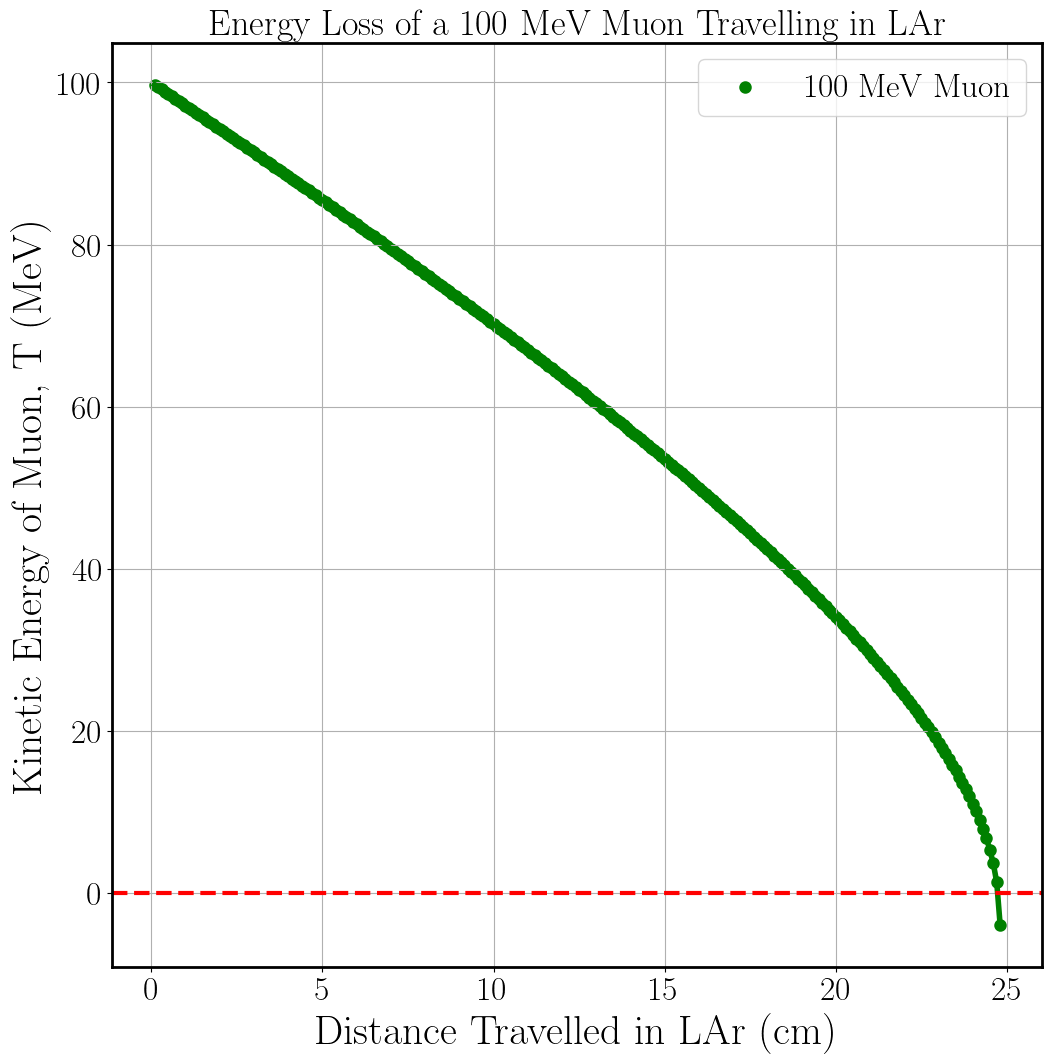

In [125]:
#K.E. loss of a 100 MeV Muon

#Calculating the distance travelled by Proton (with given initial K.E) in LAr
# xlist = np.linspace(0,199.9,2000) 

t = 100 #initial K.E of the proton in MeV 
# t = np.array([1,10,20,50,100,200,250,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV

dx = 0.1 #in cm 

xlist1 = []
tlist1 = [] 
tslope1 = []

xlist2 = []
tlist2 = []
tslope2 = []


x = 0
t1 = t

while t1>0: 
    betam = np.sqrt(2*t1/mm) #Non relativistic approximation
    t_slope = (((k1*np.log(k2*(betam**2/(1-betam**2))))/betam**2) - k1)
    tslope1.append(t_slope)
    t1 = t1 - (t_slope * dx)
    tlist1.append(t1)

    x=x+dx    
    xlist1.append(x) 

t2 = t
x = 0

while t2>0:
    betam  = np.sqrt(1 - (1/(1 + t2/mm)**2)) #Relativistic Approach 
    t_slope = (((k1*np.log(k2*(betam**2/(1-betam**2))))/betam**2) - k1)
    tslope1.append(t_slope)
    t2 = t2 - (t_slope * dx)
    tlist2.append(t2) 

    x=x+dx    
    xlist2.append(x)

#run while loop -> while loop untill T becomes negative -> linear interpolation between last 2 points (1 positive and one negative) -> value of range 

#Plotting the distance travelled by Muon (with given initial K.E) in LAr:  

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

ax.set_title("Energy Loss of a 100 MeV Muon Travelling in LAr", fontsize=26)
# ax.scatter(xlist,tlist)
# ax.scatter(xlist1,tlist1, c='purple',label='non-relativistic',lw=3)
ax.scatter(xlist2, tlist2, c='green',label='100 MeV Muon',lw=3) #'relativistic'
print(len(xlist2), len(tlist2))


#Continuous plot: 
# ax.plot(xlist1,tlist1, c='purple',lw=4) #label='non-relativistic'
ax.plot(xlist2, tlist2, c='green', lw=4) #label='relativistic'
plt.axhline(0,ls='--',c='red',lw=3)

ax.grid()

ax.set_ylabel("Kinetic Energy of Muon, T (MeV)",fontsize=30)
ax.set_xlabel('Distance Travelled in LAr (cm)',fontsize=30)

plt.legend(fontsize=24)

plt.yticks(fontsize=24), plt.xticks(fontsize=24)

# plt.savefig("KEloss_Muon_100MeV_LAr.jpg", bbox_inches= 'tight')
# plt.show()



In [126]:
#Calculating range of Proton of different initial KE travelling in LAr: 

# t = 300
# t = np.array([10,20,50]) #,100,200,250,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV
# tm = np.array([5,10,15,20,25,30,35,40,45,50])
tr = np.array([10,15,20,25,30,35,40,45,50])


def make_range(tl):
    ''' tl = t_list input from data'''
    
    xlist1 = []
    tlist1 = []
    tslope1 = []
    betalist1 = []

    xlist2 = []
    tlist2 = []
    tslope2 = []
    betalist2 = []

#     t = np.array([1,10,20,50,100,200,250,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV
    
    x = 0
    dx = 0.1

    t1 = tl

    while t1>0: 
        betam = np.sqrt(2*t1/mm) #Non relativistic approximation
        t_slope = (((k1*np.log(k2*(betam**2/(1-betam**2))))/betam**2) - k1)
        t1 = t1 - (t_slope * dx)
        tslope1.append(t_slope)
        tlist1.append(t1)
        

        x=x+dx    
        xlist1.append(x) 

    t2 = tl
    x = 0

    while t2>0:
        betam  = np.sqrt(1 - (1/(1 + t2/mm)**2)) #Relativistic Approach 
        t_slope = (((k1*np.log(k2*(betam**2/(1-betam**2))))/betam**2) - k1)
        t2 = t2 - (t_slope * dx)
        tslope2.append(t_slope)
        tlist2.append(t2)
        betalist2.append(betam)

        x=x+dx    
        xlist2.append(x)
    
        
#     return xlist1,tlist1,xlist2,tlist2
    
    #Linear Interpolation: 

    if (len(tlist1)>1) and (len(tlist2)>1) and (len(xlist1)>1) and (len(xlist2)>1):
    
        tn1 = tlist1[-1]
        tn2 = tlist1[-2]
        tnp1 = tlist2[-1]
        tnp2 = tlist2[-2]
        xn1 = xlist1[-1]
        xn2 = xlist1[-2]
        xnp1 = xlist2[-1]
        xnp2 = xlist2[-2]
        # print(xlist[-2],tlist[-2])
        # print(xlist[-1],tlist[-1])

        range1 = xn2 - (tn2 * ((xn1-xn2)/(tn1 - tn2))) #Non-rel approx
        range2 = xnp2 - (tnp2 * ((xnp1-xnp2)/(tnp1 - tnp2))) #Relativistic approach 

        print("K.E: {} MeV, Range (Non-rel apprx):  {:.3f} cm, Range (Rel approach): {:.3f} cm".format(tl,range1,range2))
#         print((tlist1,tslope1) , (tlist2, tslope2))
               
        return range1,range2     
#         return betalist2
    
# betalist2
        
        
# #call the function:

nonrel_listmu, rel_listmu = [], []

# # for i in range(len(data_t)):
for a in tr:   #data_t[1:9]
    # nrl,rl = make_range(a) 
    range1,range2 = make_range(a)
    # print(a, make_range(a))
    tslope1,tslope2
    # nonrel_list.append(nrl), rel_list.append(rl)  #nrl- non-relativistic & rl- relativistic
    nonrel_listmu.append(range1), rel_listmu.append(range2)  #nrl- non-relativistic & rl- relativistic
#     ratio = nonrel_list / rel_list  #Ratio of x_classical & x_relativistic



K.E: 10 MeV, Range (Non-rel apprx):  0.672 cm, Range (Rel approach): 0.616 cm
K.E: 15 MeV, Range (Non-rel apprx):  1.353 cm, Range (Rel approach): 1.209 cm
K.E: 20 MeV, Range (Non-rel apprx):  2.268 cm, Range (Rel approach): 1.955 cm
K.E: 25 MeV, Range (Non-rel apprx):  3.401 cm, Range (Rel approach): 2.832 cm
K.E: 30 MeV, Range (Non-rel apprx):  4.730 cm, Range (Rel approach): 3.829 cm
K.E: 35 MeV, Range (Non-rel apprx):  6.273 cm, Range (Rel approach): 4.929 cm
K.E: 40 MeV, Range (Non-rel apprx):  7.995 cm, Range (Rel approach): 6.120 cm
K.E: 45 MeV, Range (Non-rel apprx):  9.853 cm, Range (Rel approach): 7.401 cm
K.E: 50 MeV, Range (Non-rel apprx):  11.813 cm, Range (Rel approach): 8.732 cm


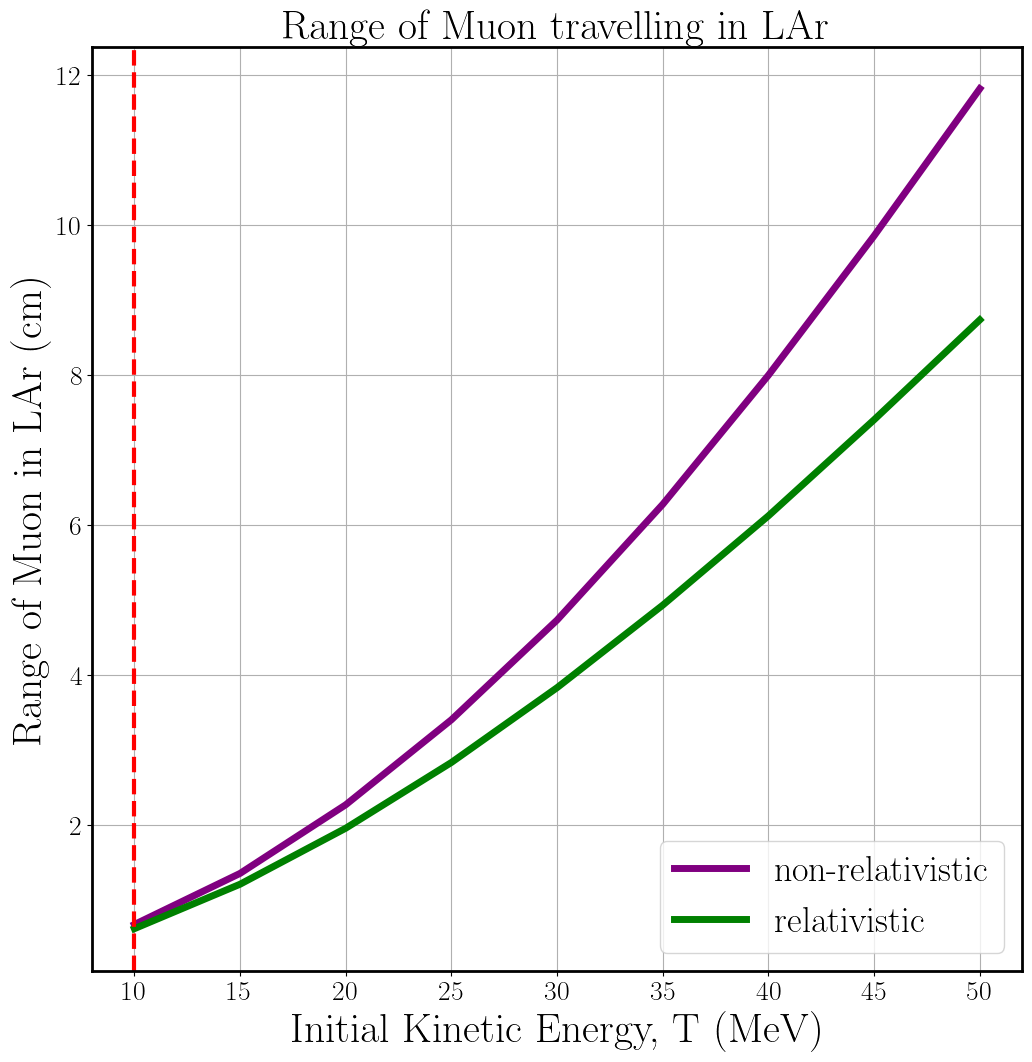

In [127]:
# Plotting the function 

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_title("Range of Muon travelling in LAr", fontsize=30)
plt.plot(tr,nonrel_listmu, c='purple',label='non-relativistic',lw=5)
plt.plot(tr,rel_listmu, c='green',label='relativistic',lw=5)
plt.axvline(10,ls='--',c='red',lw=3)
plt.grid()

ax.set_ylabel("Range of Muon in LAr (cm)",fontsize=30)
ax.set_xlabel('Initial Kinetic Energy, T (MeV)',fontsize=30)
plt.legend(fontsize=24)

plt.yticks(fontsize=20), plt.xticks(fontsize=20)

ax.legend(fontsize=26)

# plt.savefig("Range_Muon_LAr_rel_vs_nonrel.jpg", bbox_inches= 'tight')
plt.show()

In [128]:
#Defining a function to calculate the betalist for some given initial K.E of Proton in LAr
#Calculating range of Muons with different initial KE travelling in LAr:

# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
t_arr = np.array([0,148.8,155.9,200,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,


#def make_first_list(t):


def make_betalistmu(t,x,dx):
    ''' t = t_list input from data'''
    
    
    xlist = []
    tlist = [] 
    tslope = []
    betalist = []
    
#     x = 0 #in cm 
#     dx = 0.01 #in cm 
    
    while t>0: 
        
        betam  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
        t_slope = (((k1*np.log(k2*(betam**2/(1-betam**2))))/betam**2) - k1)
        t = t - (t_slope * dx)
        tslope.append(t_slope)
        tlist.append(t)
        betalist.append(betam)

        x=x+dx    
        xlist.append(x)
        
#       print(t, beta, xlist)
         
    #Linear Interpolation: 

    if (len(tlist)>1)  and (len(xlist)>1):
    
        tnp1 = tlist[-1]
        tnp2 = tlist[-2]
        xnp1 = xlist[-1]
        xnp2 = xlist[-2]
        
        rang = xnp2 - (tnp2 * ((xnp1-xnp2)/(tnp1 - tnp2))) #Range of Proton: Relativistic approach 
#         print(betalist)
        
        return betalist  #range


betalist_50 = make_betalistmu(50,0,0.1)
print(betalist_50)

[0.7343351229183378, 0.7328593481721767, 0.7313650605139412, 0.7298518419489141, 0.7283192602186594, 0.7267668681398994, 0.7251942029043774, 0.7236007853368999, 0.7219861191085044, 0.7203496899014423, 0.7186909645223678, 0.7170093899598134, 0.7153043923816709, 0.713575376068012, 0.7118217222741527, 0.7100427880183809, 0.7082379047882511, 0.706406377158746, 0.7045474813149655, 0.7026604634712684, 0.700744538177984, 0.6987988865059025, 0.6968226540977422, 0.6948149490746541, 0.6927748397845483, 0.6907013523775969, 0.68859346819265, 0.6864501209364811, 0.6842701936357191, 0.6820525153389883, 0.6797958575441337, 0.6774989303223888, 0.6751603781079198, 0.672778775117243, 0.6703526203585345, 0.6678803321856788, 0.6653602423459828, 0.662790589463624, 0.6601695118929891, 0.6574950398668709, 0.654765086853804, 0.6519774400263562, 0.6491297497275909, 0.6462195178057916, 0.6432440846673423, 0.640200614873795, 0.637086081080829, 0.6338972460830655, 0.6306306426883508, 0.6272825510966464, 0.6238489

# Cherenkov photons: Muons

<font size=4>

<!-- ## Linear Interpolation: 

This method was used to determine the total distance travelled (i.e range) by Muon in LAr before its K.E becomes zero. As in the CSDA, K.E falls off sharply to zero so we applied the simplest interpolation formula to effectively determine the x-value for which the K.E is zero. In this method, the last two data points have been used for x and T (one posive and one negative value) to find the x for which T = 0. 

Let's suppose these two datapoints (the two green points on the lower right: one above and one below the T = 0 axis) are labelled as $(x_{n-1}, T_{n-1})$ and $(x_{n}, T_{n})$. Then. the straightline joining these two points are given by, 

$$
T - T_{n-1} = (\frac {T_{n} - T_{n-1}}{x_{n} - x_{n-1}}) . (x - x_{n-1}) 
$$ 

Now setting T = 0 in the above equation will give us the range of the Proton i.e x = R (range), 

$$
R = x_{n-1} - T_{n-1} . (\frac {x_{n} - x_{n-1}} {T_{n} - T_{n-1}}) 
$$ 

I have used this linear interpolation method to determine the range of Muon in LAr using various methods.
 -->
<font size = 5>
    
Frank-Tamm formula for calculating number of Cerenkov lights emitted is given by,
    
$$\frac{d^2N}{dE dx} = (\frac{\alpha z^2}{\hbar c}) sin^2\theta_{c}  \approx 370. sin^2\theta_{c} ev^{-1} cm^{-1} $$
    
where, $ z = 1 $ for Proton and $\alpha$ is the fine structure constant 
    
Equivalently, 
    
    
$$ \frac{d^2N}{dx d\lambda} = \frac{2 \pi \alpha z^2}{\lambda^2} (1 - \frac{1}{\beta^2 n^2(\lambda)})  \approx 370. sin^2\theta_{c}$$
    
Integrating over $\lambda$ gives, 
    
$$ \frac{dN}{dx} = \int_{\lambda_{min}}^{\lambda_{max}} \frac{2 \pi \alpha z^2}{\lambda^2} (1 - \frac{1}{\beta^2 n^2(\lambda)}) d\lambda  = I(\beta, x) $$
    
and finally, number of Cerenkov photons can be determined by integrating once again over x,
        
$$ N = \int dN = \int_{0}^{Range} I(\beta, x) dx $$
    
Gaussian quadrature method has been used for integration
   

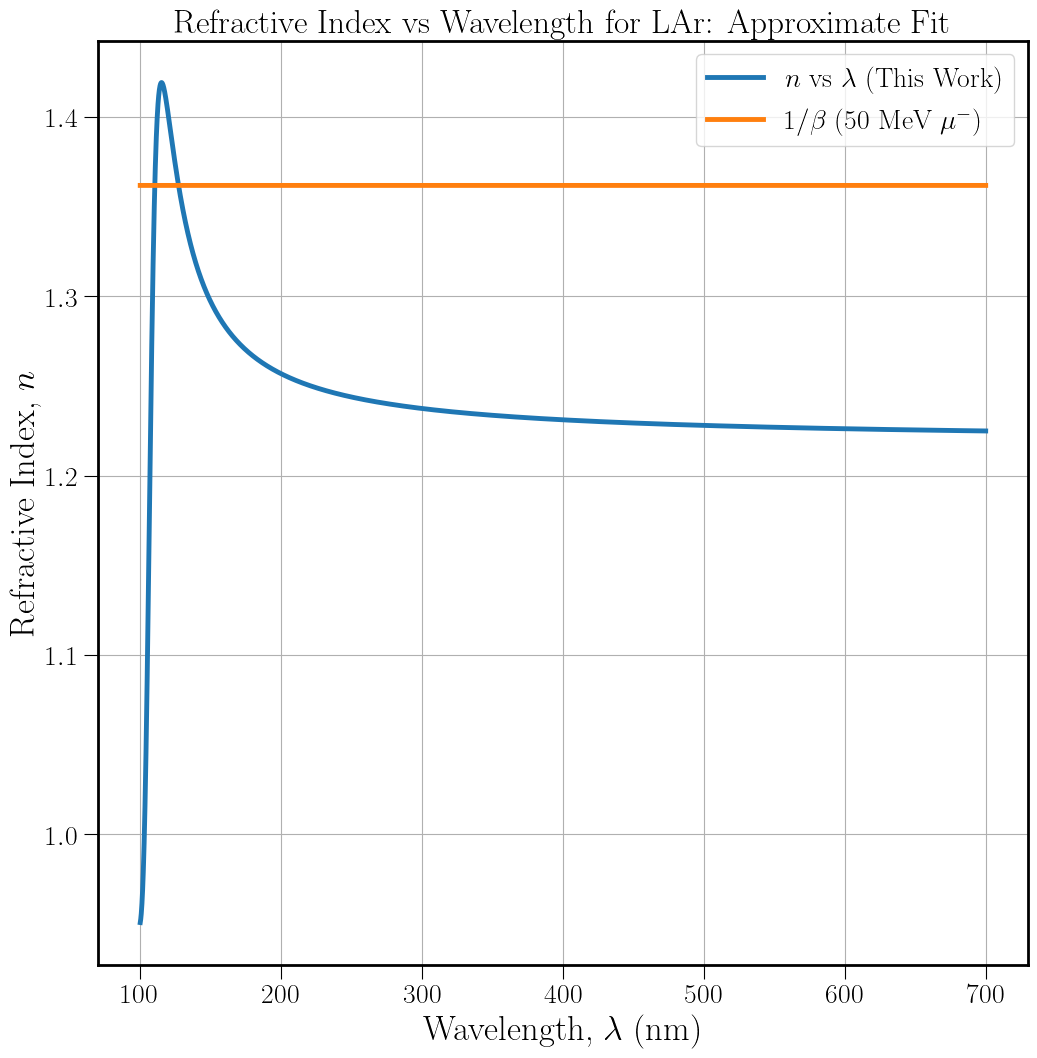

In [129]:
#Refractive index new fit: M. Sievert (Mathematica equivalent)

lamd = np.linspace(100,700,5000)   #wavelength of light 

t = 50 #K.E of Muon  in MeV
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
betam  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
y = 1/betam
y = np.linspace(y,y,5000)   #wavelength of light 



# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))


#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

#Plot of n vs lambda in the LAr medium near Resonance  

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)



ax.set_title("Refractive Index vs Wavelength for LAr: Approximate Fit", fontsize=24)
ax.plot(lamd, n_pvs, linewidth = 3.5, label="$n$ vs $\lambda$ (This Work)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$ (50 MeV $\mu^-$)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $n$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# plt.savefig("n_vs_lambda_near_resonance_approxfit_Muon50MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

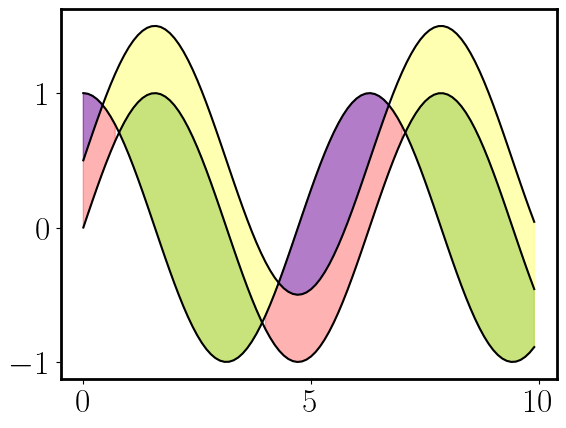

In [130]:
#Sample code to fill in between curves/lines

# import matplotlib.pyplot as plt
# import numpy as np

# Sample data
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) + 0.5

# Create the plot
fig, ax = plt.subplots()

# Fill between y1 and y2
ax.fill_between(x, y1, y2, where=(y1 > y2), color='green', alpha=0.3)
ax.fill_between(x, y1, y2, where=(y1 < y2), color='red', alpha=0.3)

# Fill between y2 and y3
ax.fill_between(x, y2, y3, where=(y2 > y3), color='blue', alpha=0.3)
ax.fill_between(x, y2, y3, where=(y2 < y3), color='yellow', alpha=0.3)

# Plot the lines
ax.plot(x, y1, color='black')
ax.plot(x, y2, color='black')
ax.plot(x, y3, color='black')

plt.show()

Algebraic Method (on Paper): Wavelength_min = 110.32662182736011 nm, Wavelength_max = 127.18769856872609 nm
Algebraic Method (Mathematica): Wavelength_min = 110.32662182736009 nm, Wavelength_max = 127.18769856872606 nm
Numerical Method: Wavelength_min = 110.32206441288258 nm, Wavelength_max = 127.125425085017 nm


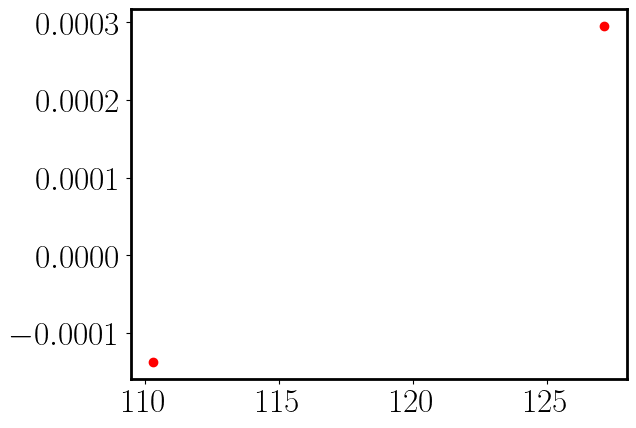

Wavelength_min = 110.32206441288258 nm, Wavelength_max = 127.125425085017 nm


0.7343351229183378

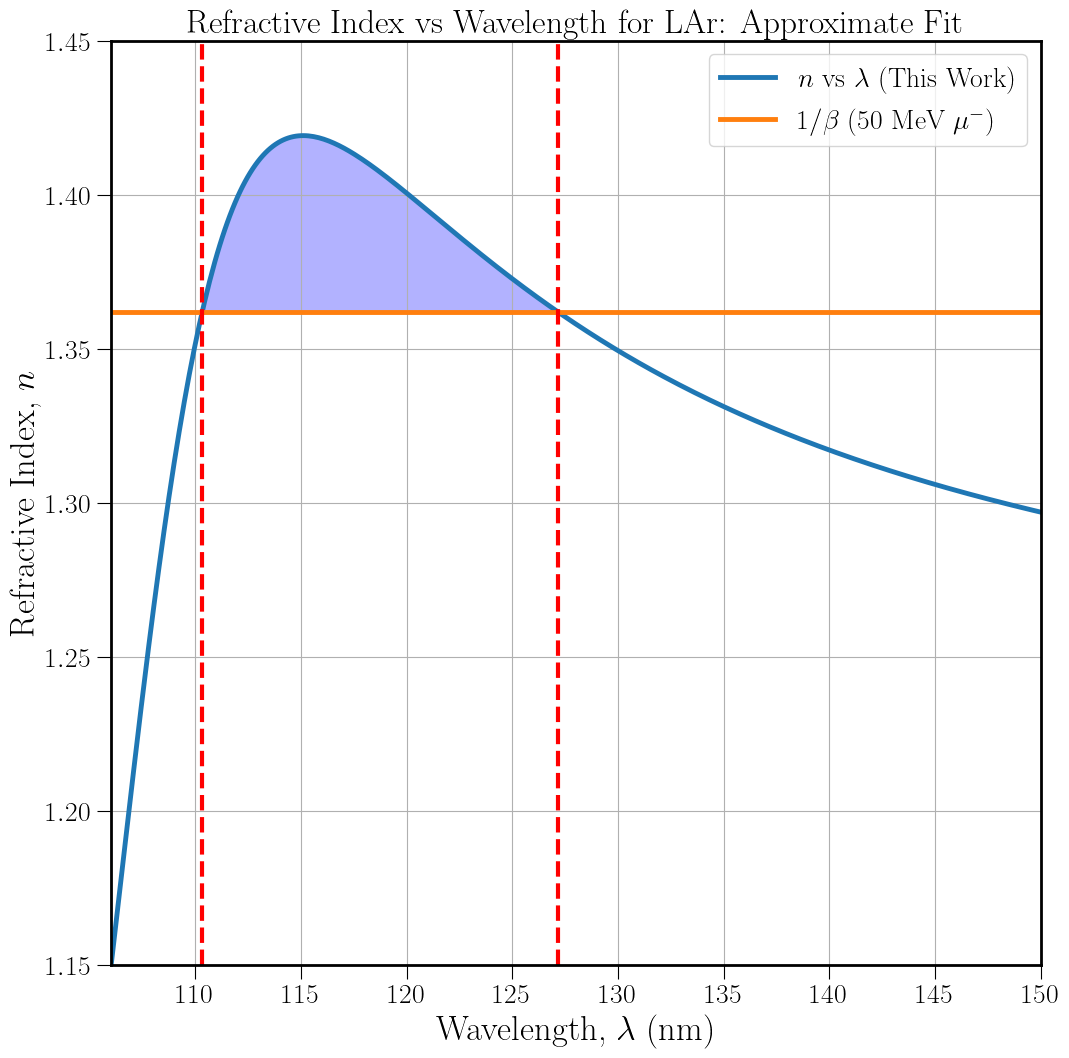

In [131]:
#Intersection Method

lamd = np.linspace(100,700,5000)   #wavelength of light 

t = 50 #K.E of Muon  in MeV
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
betam  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 

y = 1/betam

y = np.linspace(y,y,5000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + (lamd_uv * (a_pvs * betam - np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2))))
lamdmax = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + (lamd_uv * (a_pvs * betam + np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2))))

print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

lammin = (-2*lamd_uv + 2*a_0*betam*lamd_uv + a_pvs*betam*lamd_uv**2 + np.sqrt(a_pvs**2*betam**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*betam*gamma**2*lamd_uv**4 - 4*a_0**2*betam**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*betam + a_pvs*betam*lamd_uv- gamma**2*lamd_uv**2 + a_0*betam*gamma**2*lamd_uv**2))
lammax = (-2*lamd_uv + 2*a_0*betam*lamd_uv + a_pvs*betam*lamd_uv**2 - np.sqrt(a_pvs**2*betam**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*betam*gamma**2*lamd_uv**4 - 4*a_0**2*betam**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*betam + a_pvs*betam*lamd_uv- gamma**2*lamd_uv**2 + a_0*betam*gamma**2*lamd_uv**2))
print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

func = n_pvs - y

idx = np.argwhere(np.diff(np.sign(func))).flatten()
print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

plt.plot(lamd[idx], func[idx], 'ro')
plt.show()
print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Refractive Index vs Wavelength for LAr: Approximate Fit", fontsize=24)
ax.plot(lamd, n_pvs, linewidth = 3.5, label="$n$ vs $\lambda$ (This Work)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$ (50 MeV $\mu^-$)")


# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $n$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv
plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin

lamdminarr = np.linspace(lamdmin,lamdmin,2000)
lamdmaxarr = np.linspace(lamdmax,lamdmax,2000)
#color fill 
# ax.fill_between(x, y1, y2, where=(y1 > y2), color='green', alpha=0.3)
# Two options to fill only in one region:

# Explicitly limit arrays
# ax.fill_between(lamd[(lamd > lamdmin) & (lamd < lamdmax)], n_pvs[(lamd > lamdmin) & (lamd < lamdmax)], y[(lamd > lamdmin) & (lamd < lamdmax)], color='blue', alpha=0.3, interpolate=True)  #, interpolate=True , lamdmin, lamdmax

# Use where keyword to pass to limit x-space
ax.fill_between(lamd, n_pvs, y, where=(lamd > lamdmin) & (lamd < lamdmax), color='blue', alpha=0.3, interpolate=True)  #, interpolate=True , lamdmin, lamdmax

# ax.axhspan(n_pvs, y, xmin=100, xmax=400, alpha=0.5, color='red')


# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

plt.ylim([1.15, 1.45])
plt.xlim([106,150])
plt.savefig("n_vs_lambda_near_resonance_approxfit_Muon50MeV2.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

betam

[0.13661358 0.13828306 0.13997234 0.14168163 0.14341114 0.14516108
 0.14693169 0.14872316 0.15053573 0.15236961 0.15422502 0.15610219
 0.15800133 0.15992269 0.16186647 0.16383292 0.16582225 0.1678347
 0.16987049 0.17192987 0.17401305 0.17612027 0.17825177 0.18040778
 0.18258853 0.18479425 0.18702519 0.18928158 0.19156365 0.19387164
 0.19620579 0.19856632 0.20095348 0.2033675  0.20580861 0.20827705
 0.21077306 0.21329686 0.21584868 0.21842877 0.22103734 0.22367462
 0.22634085 0.22903625 0.23176104 0.23451544 0.23729968 0.24011396
 0.24295851 0.24583354 0.24873925 0.25167586 0.25464356 0.25764256
 0.26067305 0.26373522 0.26682927 0.26995537 0.2731137  0.27630445
 0.27952777 0.28278383 0.28607278 0.28939479 0.29275    0.29613853
 0.29956054 0.30301614 0.30650544 0.31002856 0.31358561 0.31717666
 0.32080182 0.32446114 0.3281547  0.33188255 0.33564473 0.33944129
 0.34327224 0.34713759 0.35103735 0.35497149 0.35894    0.36294284
 0.36697994 0.37105126 0.3751567  0.37929616 0.38346955 0.38767

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\295582244.py:31: RuntimeWarning: invalid value encountered in sqrt
  lamdmin = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + lamd_uv * (a_pvs * betam - np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\295582244.py:32: RuntimeWarning: invalid value encountered in sqrt
  lamdmax = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + lamd_uv * (a_pvs * betam + np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\295582244.py:87: RuntimeWarning: invalid value encountered in sqrt
  lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\295582244.py:88: RuntimeWarning: invalid value encountered in sqrt
  lmax = min(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) -

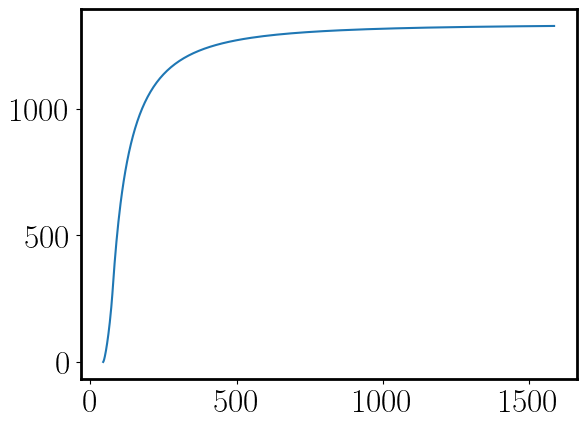

In [134]:
#Instantaneous Cherenkov Yield of Muons


#Defining Refractive index fit & Calculating Instantaneous Cherenkov Yield of Muons
 

# t = 500 #K.E of Proton  in MeV
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# mp = 938  #Proton's mass in MeV
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
tm = np.logspace(0, 3.2, 300) #np.array([43.11,50.24,100,200,300,385,400,500,600,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muons in MeV 600,700,800,900,1000 148.8,
# tm = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muon in MeV 0,148.8,155.9,200,300,

betam  = np.sqrt(1 - (1/(1 + tm/mm)**2)) #Relativistic Approach 
print(betam)

# i = beta 
# print(i)

#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + lamd_uv * (a_pvs * betam - np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + lamd_uv * (a_pvs * betam + np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))

print(func(200,0.8))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 

# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# t = np.array([43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000 
# print(beta)

cerenkovfinallist = []
cerenkovaprxisummu = []
x=0
# dx = 0.01 #in cm 
      
for j in tm: 
    cerenkovtlist = []
    cerenkovsum = 0
#     mybetalist = make_betalist(j,x,dx)
#     filtered_betalist = [x for x in mybetalist if x > 0.7046534357] 
  
    # for i in filtered_betalist:  #[0:20]
        
        # dx = 0.01 #one that matters 
        
        
#         filtered_xlist = myxlist
#         print(filtered_xlist)

    i  = np.sqrt(1 - (1/(1 + j/mm)**2)) #Relativistic Approach 

         
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
        lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
        lmax = min(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))),500)
        # print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
        lmin = max(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))), 106.6)
        lmax = 500 #nm
        # print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
    no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(j, no_cerenkov_x[0]*1e7)
    cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
    # cerenkovsum += no_cerenkov_x[0] 
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovaprxisummu.append(no_cerenkov_x[0] * 1e7) #conversion factor to standard units
    
    
plt.plot(tm, cerenkovaprxisummu)
# tm, betam, cerenkovaprxisummu
    
# make_betalist(500)

[0.70397593 0.73529966 0.85793361 0.93835312 0.96548344 0.97653856
 0.97792534 0.98466527 0.98872659 0.99317117 0.99446532 0.9954234
 0.99672023 0.99783252 0.99846172 0.99874024]
[0.70397593 0.73529966 0.85793361 0.93835312 0.96548344 0.97653856
 0.97792534 0.98466527 0.98872659 0.99317117 0.99446532 0.9954234
 0.99672023 0.99783252 0.99846172 0.99874024] [         nan 110.26794998 106.28897827 104.50947764 103.8676123
 103.58591735 103.54943253 103.36778002 103.2544315  103.12650795
 103.08842001 103.05996179 103.0210742  102.98737123 102.96815872
 102.95961957] [         nan 127.56848131  37.16216343  83.71703102  88.25649937
  89.73765499  89.91270811  90.73447944  91.20877791  91.71225064
  91.85608132  91.96181427  92.10396003  92.22502456  92.29317206
  92.32326188]


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\739360195.py:22: RuntimeWarning: invalid value encountered in sqrt
  lamdmin = (2*lamd_uv*(a_0*betaml - 1))/(2 * (a_0*betaml - 1) + lamd_uv * (a_pvs * betaml - np.sqrt((a_pvs * betaml)**2 - 4 * (a_0*betaml - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\739360195.py:23: RuntimeWarning: invalid value encountered in sqrt
  lamdmax = (2*lamd_uv*(a_0*betaml - 1))/(2 * (a_0*betaml - 1) + lamd_uv * (a_pvs * betaml + np.sqrt((a_pvs * betaml)**2 - 4 * (a_0*betaml - 1)**2 * gamma**2)))


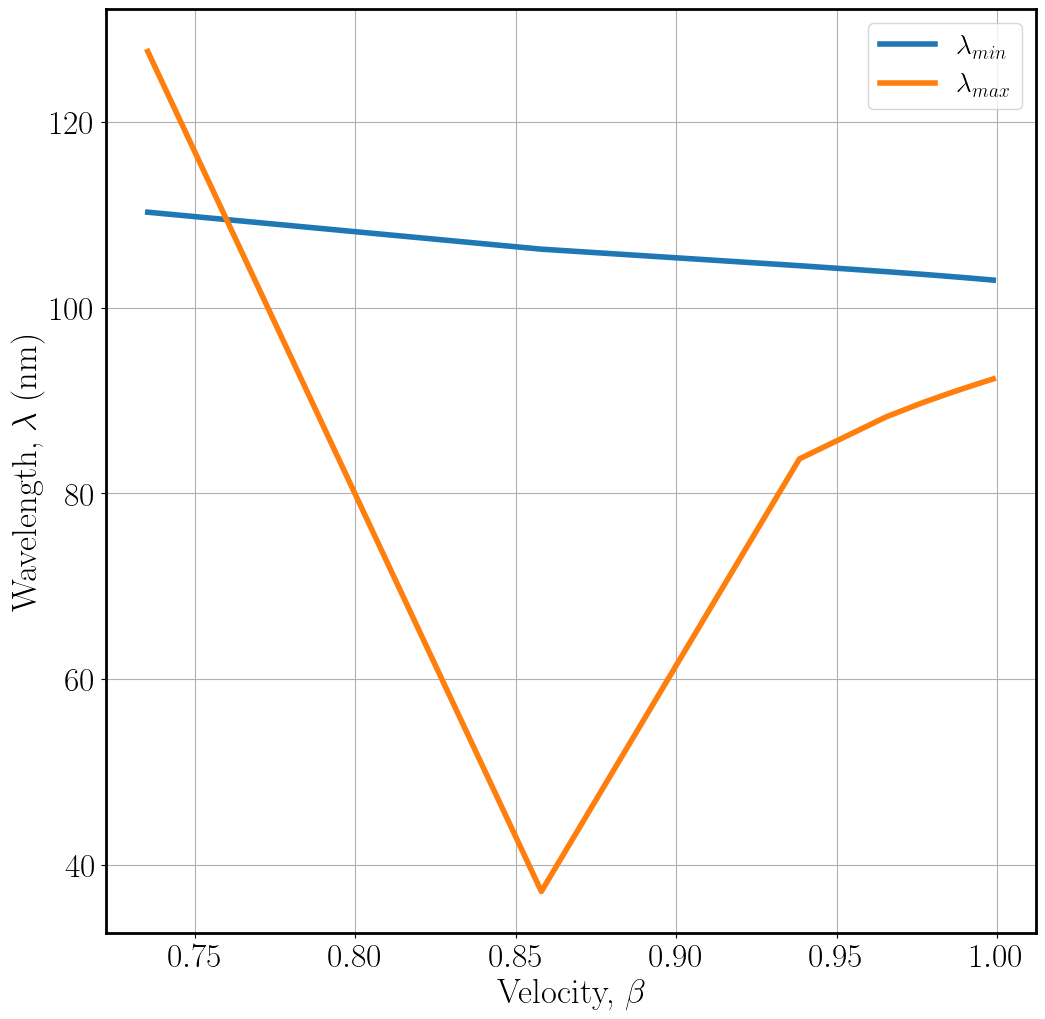

In [135]:
# mp = 938  #Proton's mass in MeV
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
tml = np.array([43.11,50.24,100,200,300,385,400,500,600,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muons in MeV 600,700,800,900,1000 148.8,

betaml  = np.sqrt(1 - (1/(1 + tml/mm)**2)) #Relativistic Approach 
# betam = 0.75796532
print(betaml)


# i = beta 
# print(i)

#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betaml - 1))/(2 * (a_0*betaml - 1) + lamd_uv * (a_pvs * betaml - np.sqrt((a_pvs * betaml)**2 - 4 * (a_0*betaml - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betaml - 1))/(2 * (a_0*betaml - 1) + lamd_uv * (a_pvs * betaml + np.sqrt((a_pvs * betaml)**2 - 4 * (a_0*betaml - 1)**2 * gamma**2)))

# lamdminc = max(lamdmin,106.6)
# lamdmaxc = min(lamdmax,500)
print(betaml, lamdmin, lamdmax)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_ylabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_xlabel('Velocity, $\\beta$',fontsize=25)
ax.grid()

ax.plot(betaml, lamdmin, linewidth= 4, label="$\\lambda_{min}$")
ax.plot(betaml, lamdmax, linewidth= 4, label="$\\lambda_{max}$")

ax.legend(fontsize=20)


# plt.plot(betam, lamdminc)
# plt.plot(betam, lamdmaxc)


[0.13661358 0.13828306 0.13997234 0.14168163 0.14341114 0.14516108
 0.14693169 0.14872316 0.15053573 0.15236961 0.15422502 0.15610219
 0.15800133 0.15992269 0.16186647 0.16383292 0.16582225 0.1678347
 0.16987049 0.17192987 0.17401305 0.17612027 0.17825177 0.18040778
 0.18258853 0.18479425 0.18702519 0.18928158 0.19156365 0.19387164
 0.19620579 0.19856632 0.20095348 0.2033675  0.20580861 0.20827705
 0.21077306 0.21329686 0.21584868 0.21842877 0.22103734 0.22367462
 0.22634085 0.22903625 0.23176104 0.23451544 0.23729968 0.24011396
 0.24295851 0.24583354 0.24873925 0.25167586 0.25464356 0.25764256
 0.26067305 0.26373522 0.26682927 0.26995537 0.2731137  0.27630445
 0.27952777 0.28278383 0.28607278 0.28939479 0.29275    0.29613853
 0.29956054 0.30301614 0.30650544 0.31002856 0.31358561 0.31717666
 0.32080182 0.32446114 0.3281547  0.33188255 0.33564473 0.33944129
 0.34327224 0.34713759 0.35103735 0.35497149 0.35894    0.36294284
 0.36697994 0.37105126 0.3751567  0.37929616 0.38346955 0.38767

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\2379429644.py:31: RuntimeWarning: invalid value encountered in sqrt
  lamdmin = (2*lamd_uv*(a_0*betaml - 1))/(2 * (a_0*betaml - 1) + lamd_uv * (a_pvs * betaml - np.sqrt((a_pvs * betaml)**2 - 4 * (a_0*betaml - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\2379429644.py:32: RuntimeWarning: invalid value encountered in sqrt
  lamdmax = (2*lamd_uv*(a_0*betaml - 1))/(2 * (a_0*betaml - 1) + lamd_uv * (a_pvs * betaml + np.sqrt((a_pvs * betaml)**2 - 4 * (a_0*betaml - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\2379429644.py:89: RuntimeWarning: invalid value encountered in sqrt
  lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\2379429644.py:90: RuntimeWarning: invalid value encountered in sqrt
  lmax = min(((2*lamd_uv*((a_0 * i) - 1))/(2 

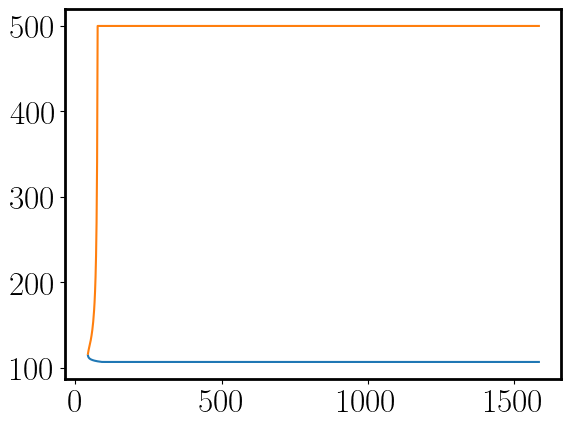

In [136]:
#Wavelength solutions for Muons
#Instantaneous Cherenkov Yield of Muons
#Defining Refractive index fit & Calculating Instantaneous Cherenkov Yield of Muons
 

# t = 500 #K.E of Proton  in MeV
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# mp = 938  #Proton's mass in MeV
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
tml = np.logspace(0, 3.2, 300)
# tml = np.array([43.11,50.24,100,200,300,385,400,500,600,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muons in MeV 600,700,800,900,1000 148.8,
# tml = np.array([43.11,50.24,100,200,300,385,400,500]) #,600,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muons in MeV 600,700,800,900,1000 148.8,
# tml = np.array([0,100,200,300,385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,   ,2500,3000

betaml  = np.sqrt(1 - (1/(1 + tml/mm)**2)) #Relativistic Approach 
print(betaml)

# i = beta 
# print(i)

#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betaml - 1))/(2 * (a_0*betaml - 1) + lamd_uv * (a_pvs * betaml - np.sqrt((a_pvs * betaml)**2 - 4 * (a_0*betaml - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betaml - 1))/(2 * (a_0*betaml - 1) + lamd_uv * (a_pvs * betaml + np.sqrt((a_pvs * betaml)**2 - 4 * (a_0*betaml - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))

print(func(200,0.8))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 

# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# t = np.array([43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000 
# print(beta)

lamd_minmu = []
lamd_maxmu = []
cerenkovfinallist = []
# cerenkovaprxisummu = []
x=0
# dx = 0.01 #in cm 
      
for j in tml: 
    cerenkovtlist = []
    cerenkovsum = 0
#     mybetalist = make_betalist(j,x,dx)
#     filtered_betalist = [x for x in mybetalist if x > 0.7046534357] 
  
    # for i in filtered_betalist:  #[0:20]
        
        # dx = 0.01 #one that matters 
        
        
#         filtered_xlist = myxlist
#         print(filtered_xlist)

    i  = np.sqrt(1 - (1/(1 + j/mm)**2)) #Relativistic Approach 

         
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
        lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
        lmax = min(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))),500)
        print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
        lmin = max(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))), 106.6)
        lmax = 500 #nm
        # print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
#     no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
# #         print(j, no_cerenkov_x[0]*1e7)
#     cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
#     # cerenkovsum += no_cerenkov_x[0] 
        
    lamd_minmu.append(lmin)
    lamd_maxmu.append(lmax)
    cerenkovfinallist.append(cerenkovtlist)
    # cerenkovaprxisump.append(no_cerenkov_x[0] * 1e7) #conversion factor to standard units
    
plt.plot(tml,lamd_minmu)
plt.plot(tml,lamd_maxmu)
# print(tml,lamd_minmu,lamd_maxmu)
# plt.xlim(0,2000)
# plt.plot(tm, cerenkovaprxisummu)
# tm, betam, cerenkovaprxisummu
    
# make_betalist(500)

(0.0, 500.0)

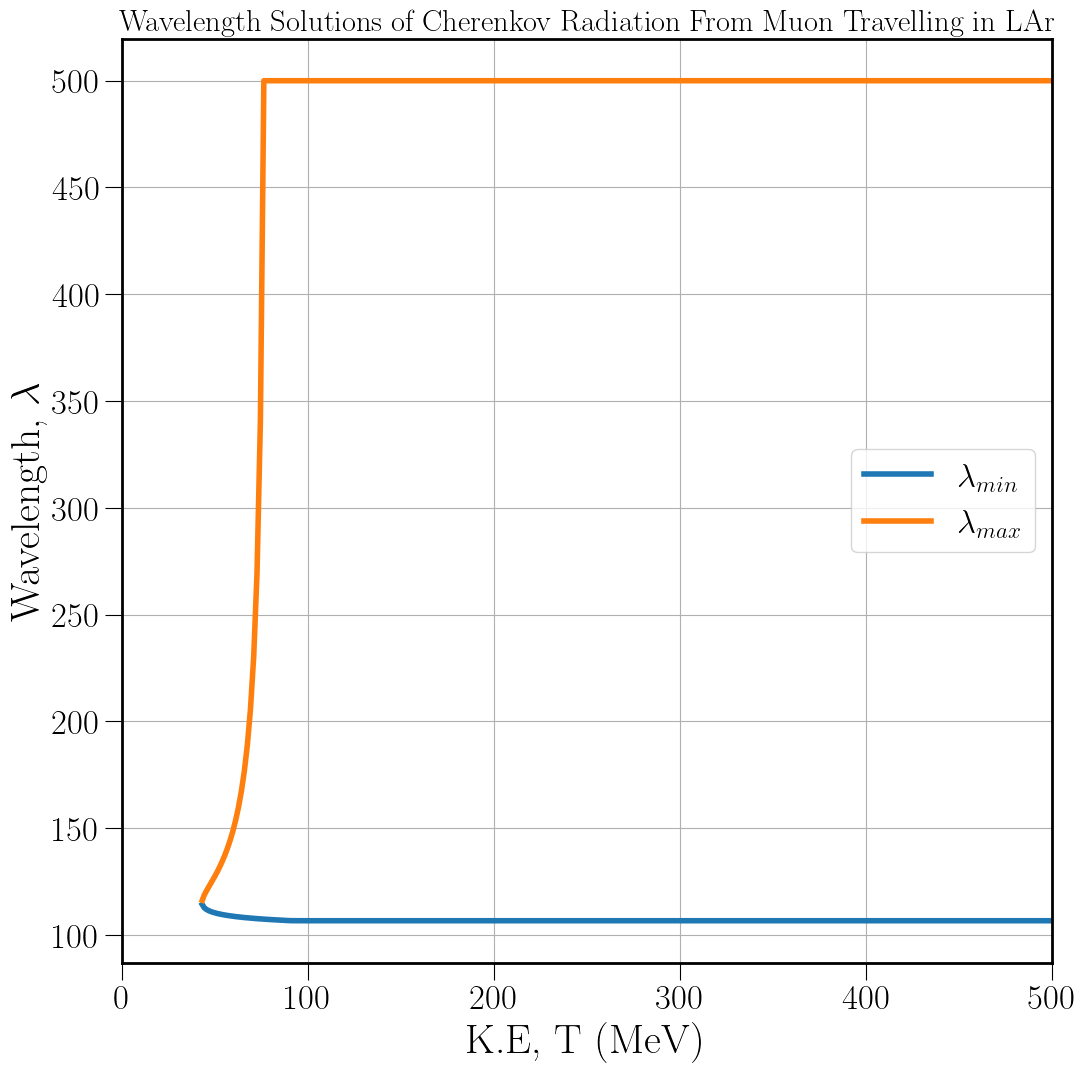

In [137]:
#Wavelength solutions for Muons

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Wavelength Solutions of Cherenkov Radiation From Muon Travelling in LAr", fontsize=22)
ax.plot(tml, lamd_minmu, linewidth = 4, label='$\\lambda_{min}$') #, color='g'
ax.plot(tml, lamd_maxmu, linewidth = 4, label='$\\lambda_{max}$') #, color='b'
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("K.E, T (MeV)",fontsize=30)
# ax.set_xlabel("$\\beta$",fontsize=28)
ax.set_ylabel('Wavelength, $\\lambda$',fontsize=30)
ax.grid()
ax.legend(fontsize=24)
plt.xlim(0,500)
# plt.ylim(0,15000)
# plt.savefig("wavelength_solns_muon_fT_LAr_approxfit.jpg")

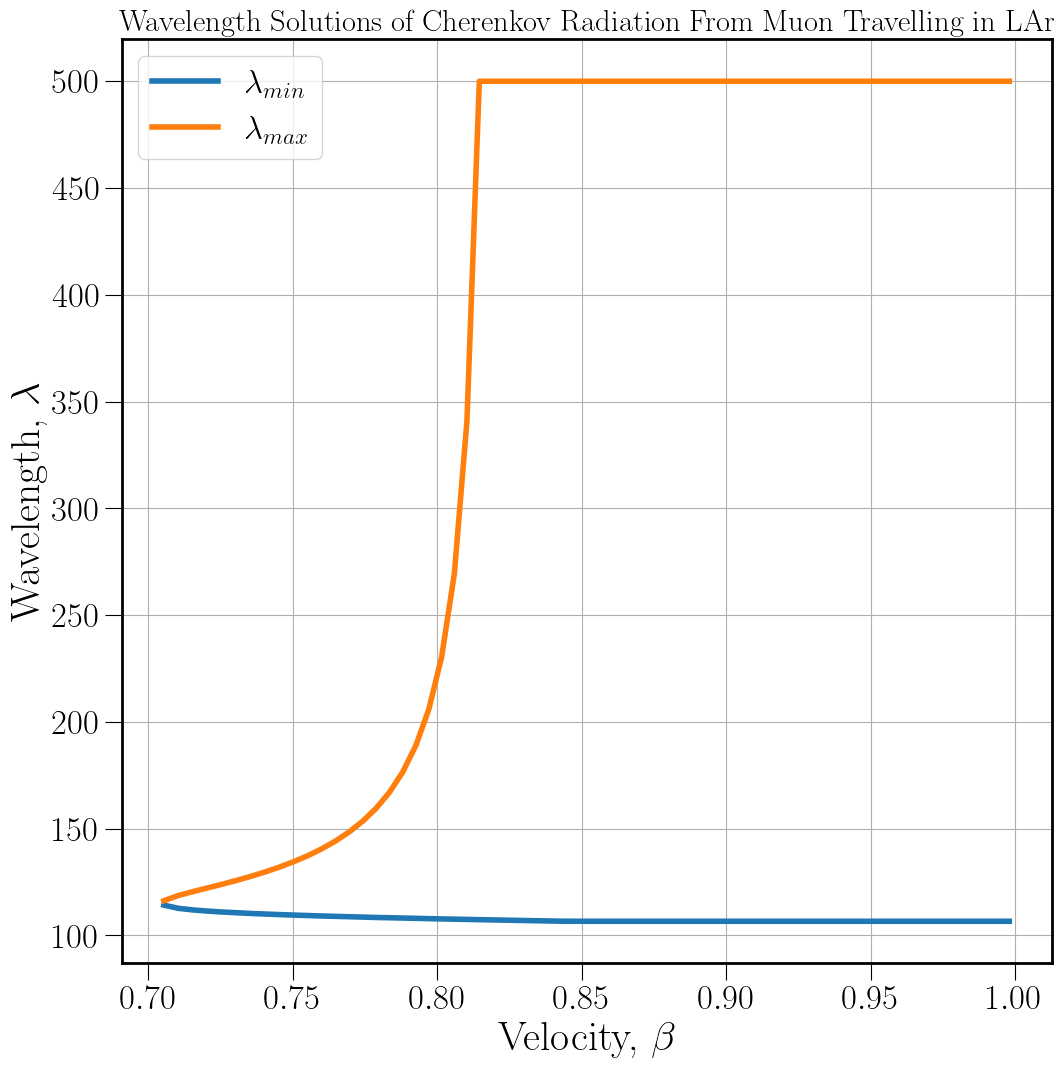

In [138]:
#Wavelength solutions for Muons

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Wavelength Solutions of Cherenkov Radiation From Muon Travelling in LAr", fontsize=22)
ax.plot(betaml, lamd_minmu, linewidth = 4, label='$\\lambda_{min}$') #, color='g'
ax.plot(betaml, lamd_maxmu, linewidth = 4, label='$\\lambda_{max}$') #, color='b'
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("Velocity, $\\beta$",fontsize=30)
# ax.set_xlabel("$\\beta$",fontsize=28)
ax.set_ylabel('Wavelength, $\\lambda$',fontsize=30)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(0,500)
# plt.ylim(0,15000)
plt.savefig("wavelength_solns_fbeta_muon_LAr_approxfit.jpg")

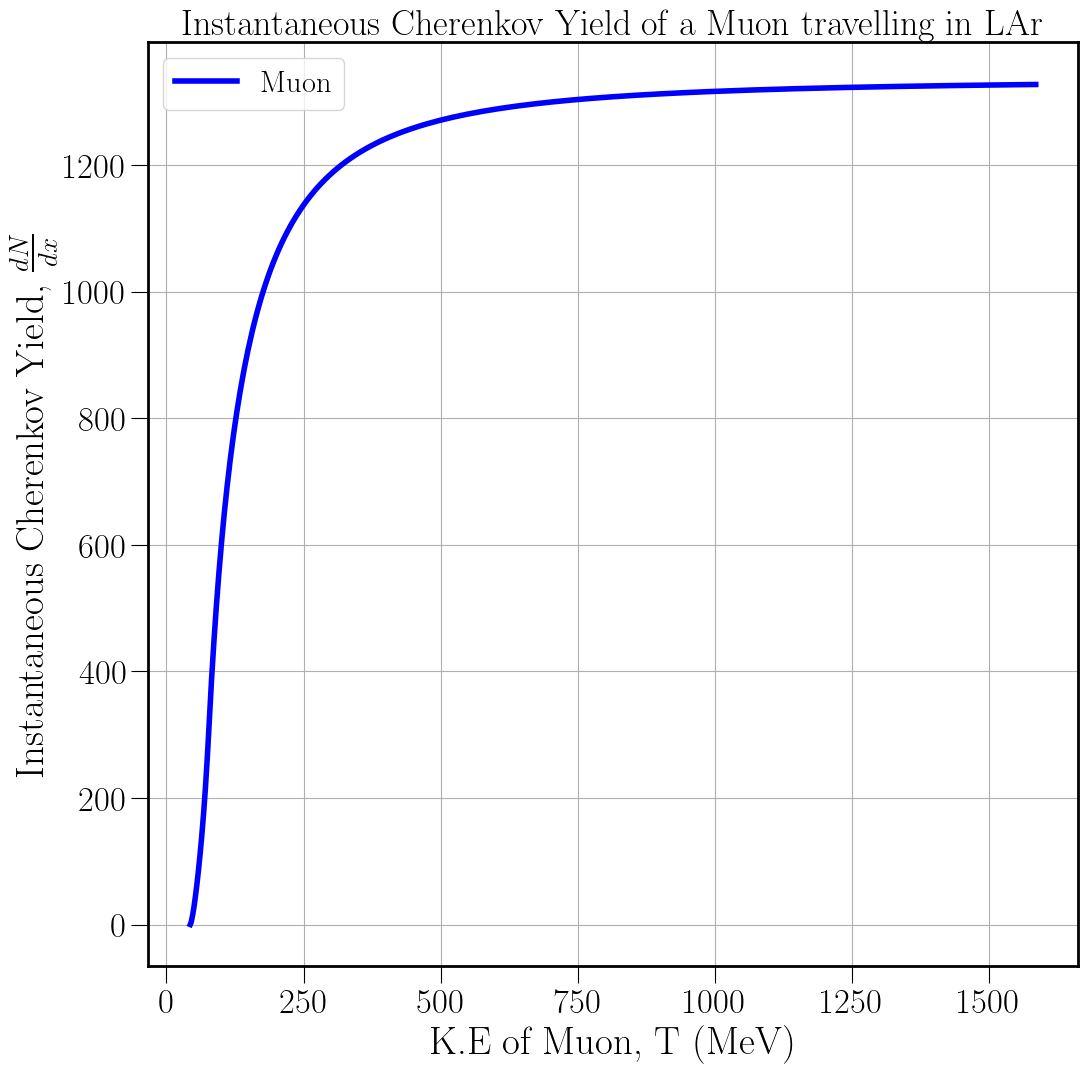

In [139]:
#Plot of instantaneous Cherenkov photons emitted by Muon in the LAr medium. (no vs T)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Instantaneous Cherenkov Yield of a Muon travelling in LAr", fontsize=26)
ax.plot(tm, cerenkovaprxisummu, linewidth = 4, label='Muon', color='b')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("K.E of Muon, T (MeV)",fontsize=28)
ax.set_ylabel('Instantaneous Cherenkov Yield, $\\frac{dN}{dx}$',fontsize=28)
ax.grid()
ax.legend(fontsize=22)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("Instantaneous_cherenkov_yield_muon_LAr_approxfit.jpg")

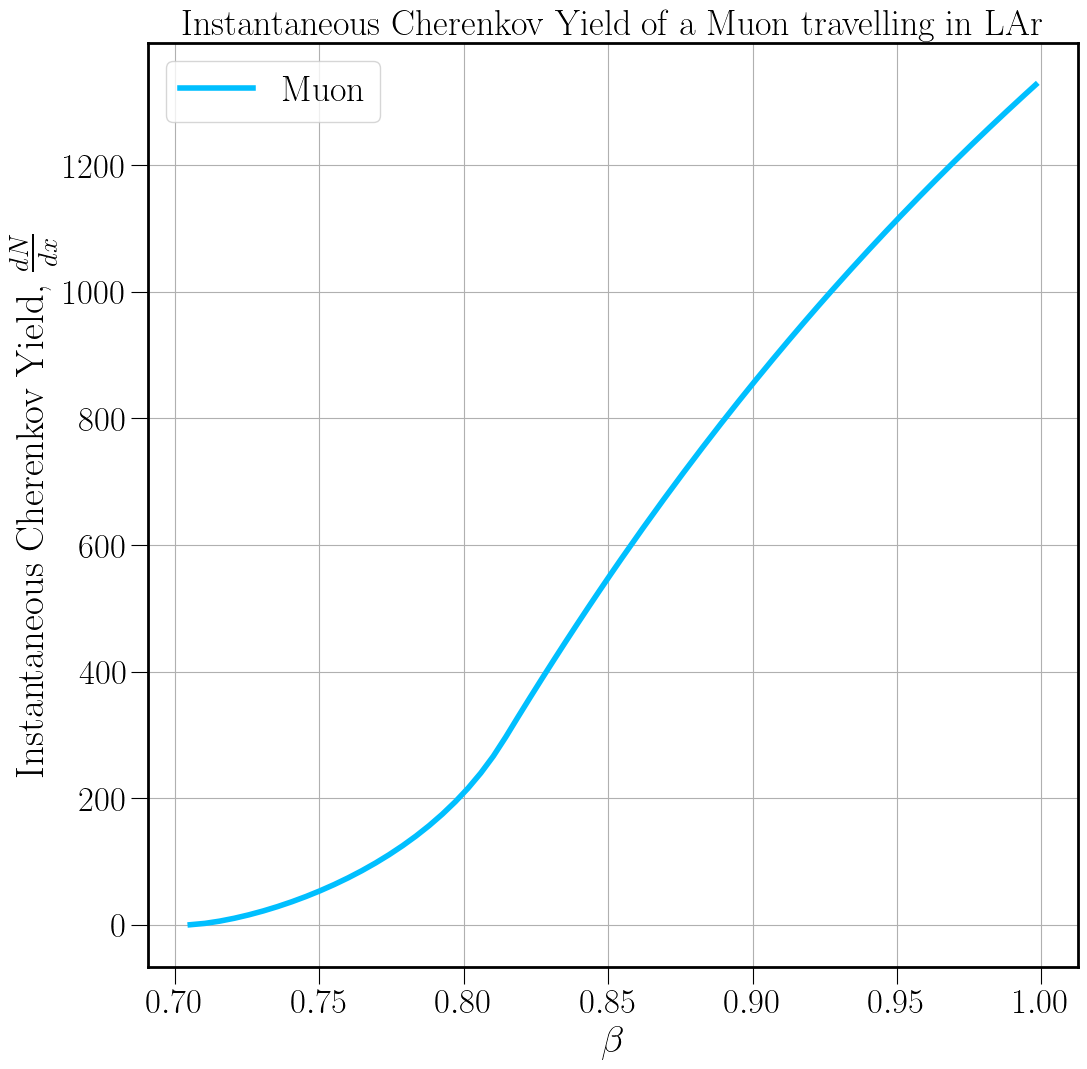

In [140]:
#Plot of instantaneous Cherenkov photons emitted by Muon in the LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Instantaneous Cherenkov Yield of a Muon travelling in LAr", fontsize=26)
ax.plot(betam, cerenkovaprxisummu, linewidth = 4, label='Muon', color='deepskyblue')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("$\\beta$",fontsize=28)
ax.set_ylabel('Instantaneous Cherenkov Yield, $\\frac{dN}{dx}$',fontsize=28)
ax.grid()
ax.legend(fontsize=26)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("Instantaneous_cherenkov_yield_fbeta_muon_LAr_approxfit.jpg")

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1973250909.py:27: RuntimeWarning: invalid value encountered in sqrt
  lamdmin = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + lamd_uv * (a_pvs * betam - np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1973250909.py:28: RuntimeWarning: invalid value encountered in sqrt
  lamdmax = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + lamd_uv * (a_pvs * betam + np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2)))


[  43.11   50.24  100.    200.    300.    385.    400.    500.    600.
  800.    900.   1000.   1200.   1500.   1800.   2000.  ] [0.70397593 0.73529966 0.85793361 0.93835312 0.96548344 0.97653856
 0.97792534 0.98466527 0.98872659 0.99317117 0.99446532 0.9954234
 0.99672023 0.99783252 0.99846172 0.99874024] [0.0, 23.27406007054502, 4904.597967605458, 38500.67904063689, 83114.09658976136, 123669.37361889868, 130977.53791651092, 179825.54086694977, 228831.80077262514, 326163.2748419682, 374288.739925735, 422017.19876863627, 516306.34425921616, 655039.9467250259, 790945.450617295, 880185.4429653861]


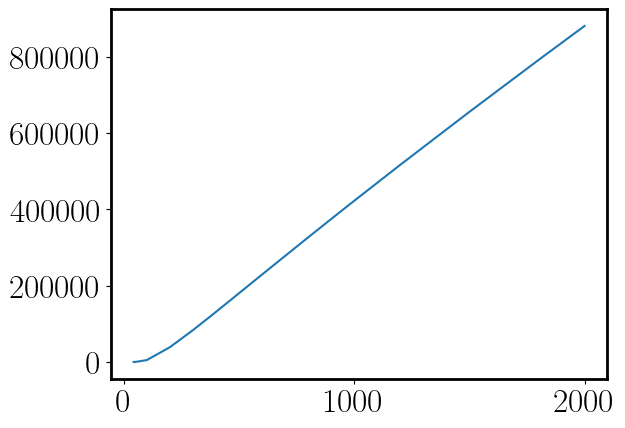

In [402]:
#Defining Refractive index fit & Calculating the total Cherenkov yield 

# t = 500 #K.E of Proton  in MeV
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# mp = 938  #Proton's mass in MeV
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# tm = np.logspace(0, 3.2, 300)  
tm = np.array([43.11,50.24,100,200,300,385,400,500,600,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muons in MeV 600,700,800,900,1000 148.8,
# tm = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muons in MeV 0,148.8,155.9,200,300,
betam  = np.sqrt(1 - (1/(1 + tm/mm)**2)) #Relativistic Approach 

# tml = np.array([500])
# betaml  = np.sqrt(1 - (1/(1 + tml/mm)**2)) #Relativistic Approach 
# print(betaml)

#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + lamd_uv * (a_pvs * betam - np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + lamd_uv * (a_pvs * betam + np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []
lamdminmu = []
lamdmaxmu = []



# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 

# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# t = np.array([43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000 
# print(beta)

cerenkovfinallist = []
cerenkovaprxsummu = []
x=0
dx = 0.1 #in cm 
      
for j in tm: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j) #OUTPUT
#     print(make_betalist(j))
    mybetalistmu = make_betalistmu(j,x,dx)
    filtered_betalistmu = [x for x in mybetalistmu if x > 0.7046534357] 
    # print(j, np.shape(filtered_betalist) #filtered_betalist)
#     myxlist = make_xlist(j)
#     print(j, filtered_betalist, filtered_xlist) #OUTPUT filtered_betalist, 

  
    for i in filtered_betalistmu:  #[0:20]
        
        dx = 0.1 #one that matters 
        
        
#         filtered_xlist = myxlist
#         print(filtered_xlist)

         
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
            lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            lmax = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            # print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
            lmin = max(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))), 106.6)
            lmax = 500
            # print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(j, no_cerenkov_x[0]*1e7)
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0] 
        
    cerenkovfinallist.append(cerenkovtlist)
    lamdminmu.append(lmin)
    lamdmaxmu.append(lmax)
    cerenkovaprxsummu.append(cerenkovsum * 1e6 * dx/0.1) #conversion factor to standard units
    
    
print(tm, betam, cerenkovaprxsummu)
# print(tm, betam, lamdminmu,lamdmaxmu)
plt.plot(tm, cerenkovaprxsummu)
  
# make_betalist(500)

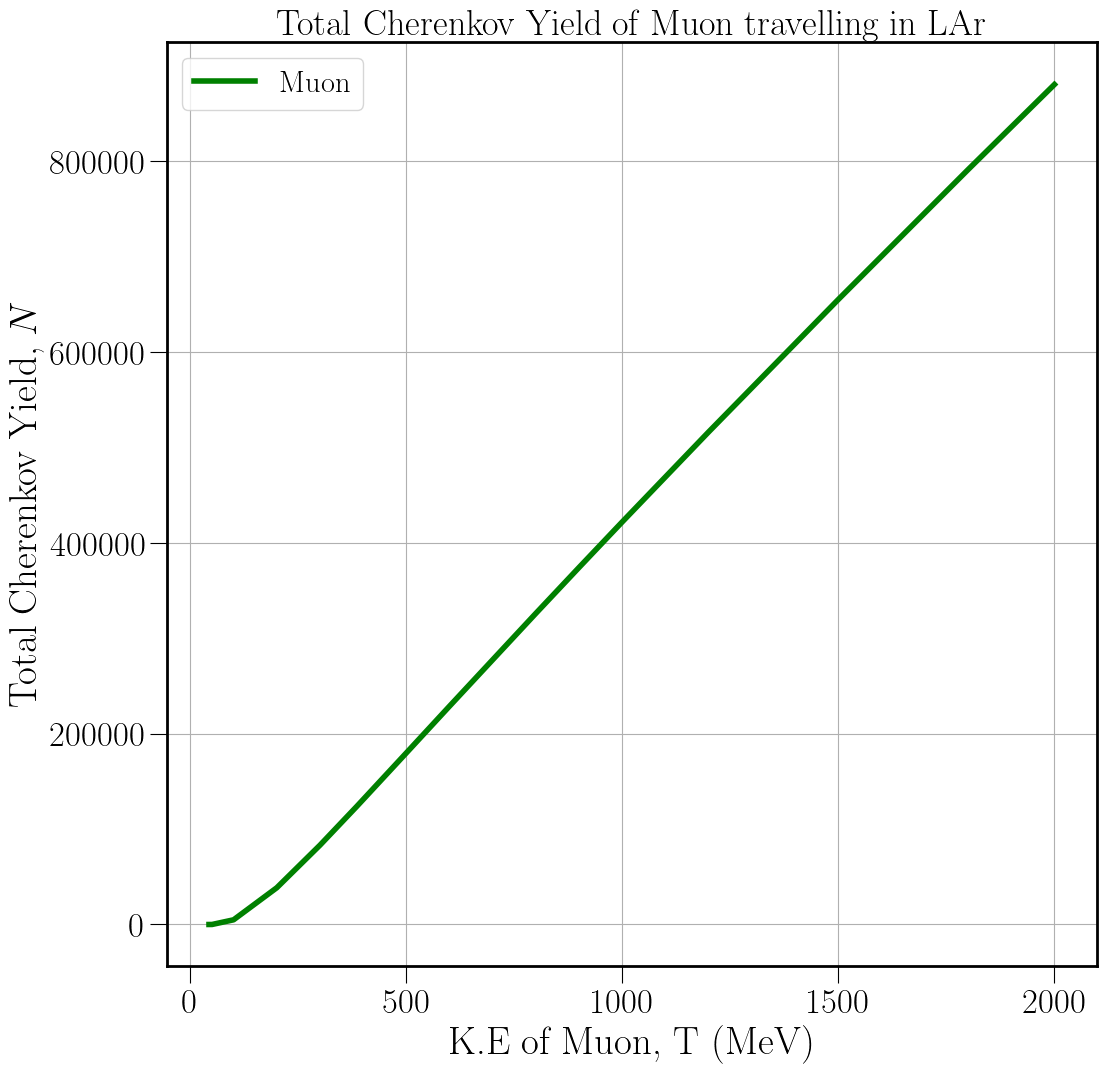

In [400]:
#Plot of Cerenkov photons emitted by Muon in the LAr medium. (no vs T)

# #TeX up labels and text:

# plt.rc("text", usetex=True)
# plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
# plt.rc('font', size=24) 
# plt.rc('font', family='serif')

# #     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams["font.weight"] = "bold"     
# #     plt.rcParams["axes.labelweight"] = "bold"
# plt.rc('axes', linewidth=2)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Total Cherenkov Yield of Muon travelling in LAr", fontsize=26)
ax.plot(tm, cerenkovaprxsummu, linewidth = 4, label='Muon', color='g')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("K.E of Muon, T (MeV)",fontsize=28)
ax.set_ylabel('Total Cherenkov Yield, $N$',fontsize=28)
ax.grid()
ax.legend(fontsize=22)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("total_cherenkov_yield_muon_LAr_approxfit.jpg")

In [ ]:
#Defining Refractive index fit & Calculating the total Cherenkov yield 

# t = 500 #K.E of Proton  in MeV
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# mp = 938  #Proton's mass in MeV
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# tm = np.logspace(0, 3.2, 300)  #np.array([43.11,50.24,100,200,300,385,400,500,600,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muons in MeV 600,700,800,900,1000 148.8,
# tm = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the muons in MeV 0,148.8,155.9,200,300,

betam  = np.sqrt(1 - (1/(1 + tm/mm)**2)) #Relativistic Approach 
print(betam)

#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + lamd_uv * (a_pvs * betam - np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betam - 1))/(2 * (a_0*betam - 1) + lamd_uv * (a_pvs * betam + np.sqrt((a_pvs * betam)**2 - 4 * (a_0*betam - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 

# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
# t = np.array([43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000 
# print(beta)

cerenkovfinallist = []
cerenkovaprxsummu = []
x=0
dx = 0.1 #in cm 
      
for j in tm: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j) #OUTPUT
#     print(make_betalist(j))
    mybetalistmu = make_betalistmu(j,x,dx)
    filtered_betalistmu = [x for x in mybetalistmu if x > 0.7046534357] 
    # print(j, np.shape(filtered_betalist) #filtered_betalist)
#     myxlist = make_xlist(j)
#     print(j, filtered_betalist, filtered_xlist) #OUTPUT filtered_betalist, 

  
    for i in filtered_betalistmu:  #[0:20]
        
        dx = 0.1 #one that matters 
        
        
#         filtered_xlist = myxlist
#         print(filtered_xlist)

         
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
            lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            lmax = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            # print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
            lmin = max(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))), 106.6)
            lmax = 500
            # print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(j, no_cerenkov_x[0]*1e7)
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0] 
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovaprxsummu.append(cerenkovsum * 1e6 * dx/0.1) #conversion factor to standard units
    
    
plt.plot(tm, cerenkovaprxsummu)
tm, betam, cerenkovaprxsummu
    
# make_betalist(500)

# Betalist, K.E. Loss \& Range : Protons 

In [144]:
#Calculating Betalist for Protons with different K.E.

#Parameters

rho = 1.38 #density of LAr in kg/m^3 at 89K temperature  
me = 9.11e-31 #Electron's mass in Kg.
io = 23.6e-6  #Average Ionization Potential of LAr in MeV
k =  0.307  #Constant in MeV.cm^2/g 
zb = 18  #Atomic No of Ar (absorber)
a = 39.948  #Mass no of Ar (absorber)
zs = 1 #charge of the particle 
c = 3e8
e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Mass of the particle travelling
mp = 938 #Proton's mass in MeV/c^2 
# mp = 105.66 #Muon rest mass in MeV/c^2

k1 = k*rho*zb*zs**2/a
k2 = 2*e/io 

alpha = 1/137 #Fine-structure (EM coupling) constant 


61 61


((array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
  [Text(0, -20.0, '$\\mathdefault{−20}$'),
   Text(0, 0.0, '$\\mathdefault{0}$'),
   Text(0, 20.0, '$\\mathdefault{20}$'),
   Text(0, 40.0, '$\\mathdefault{40}$'),
   Text(0, 60.0, '$\\mathdefault{60}$'),
   Text(0, 80.0, '$\\mathdefault{80}$'),
   Text(0, 100.0, '$\\mathdefault{100}$'),
   Text(0, 120.0, '$\\mathdefault{120}$')]),
 (array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
  [Text(-1.0, 0, '$\\mathdefault{−1}$'),
   Text(0.0, 0, '$\\mathdefault{0}$'),
   Text(1.0, 0, '$\\mathdefault{1}$'),
   Text(2.0, 0, '$\\mathdefault{2}$'),
   Text(3.0, 0, '$\\mathdefault{3}$'),
   Text(4.0, 0, '$\\mathdefault{4}$'),
   Text(5.0, 0, '$\\mathdefault{5}$'),
   Text(6.0, 0, '$\\mathdefault{6}$'),
   Text(7.0, 0, '$\\mathdefault{7}$')]))

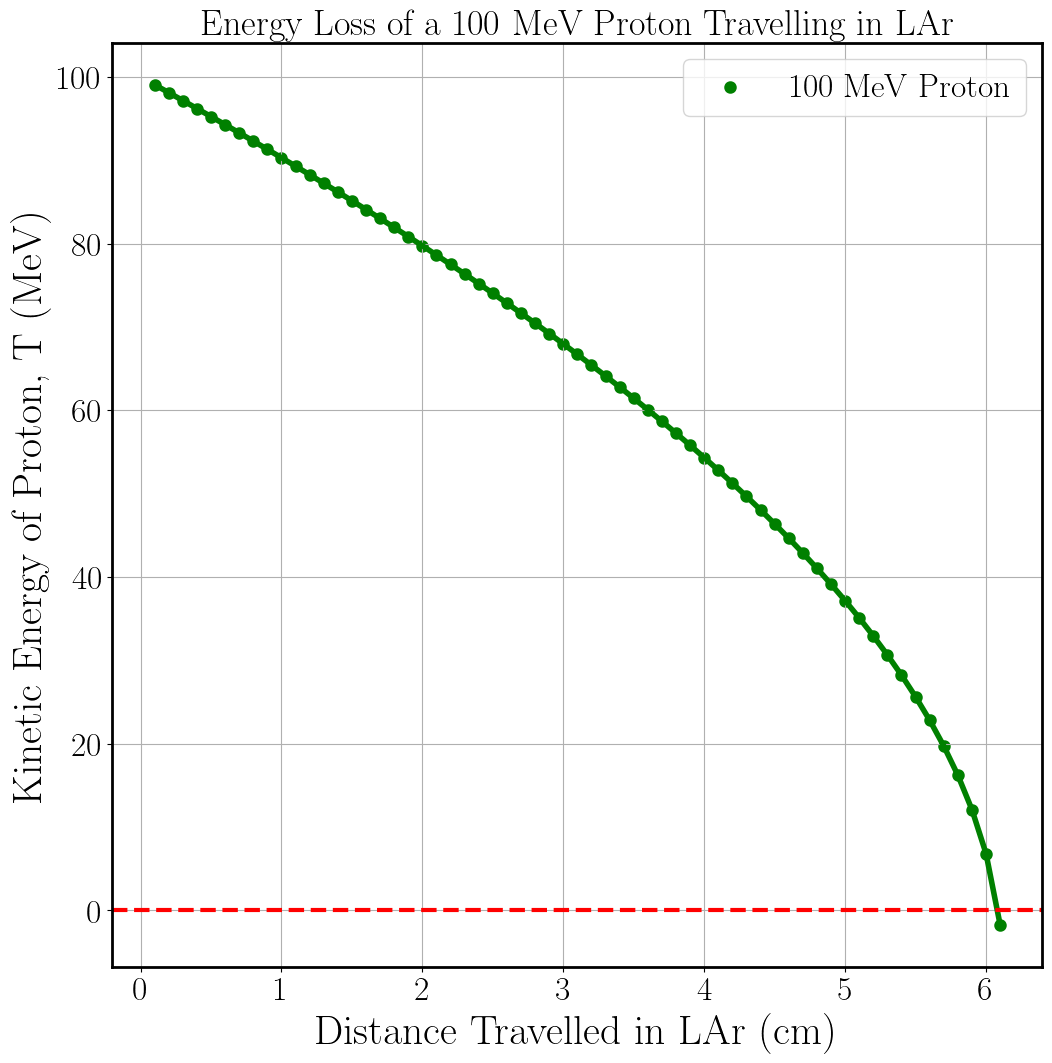

In [145]:
#K.E. loss of a 100 MeV Proton

#Calculating the distance travelled by Proton (with given initial K.E) in LAr
# xlist = np.linspace(0,199.9,2000) 

t = 100 #initial K.E of the proton in MeV 
# t = np.array([1,10,20,50,100,200,250,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV

dx = 0.1 #in cm 

xlist1p = []
tlist1p = [] 
tslope1p = []

xlist2p = []
tlist2p = []
tslope2p = []


x = 0
t1 = t

while t1>0: 
    betap = np.sqrt(2*t1/mp) #Non relativistic approximation
    t_slopep = (((k1*np.log(k2*(betap**2/(1-betap**2))))/betap**2) - k1)
    tslope1p.append(t_slopep)
    t1 = t1 - (t_slopep * dx)
    tlist1p.append(t1)

    x=x+dx    
    xlist1p.append(x) 

t2 = t
x = 0

while t2>0:
    betap  = np.sqrt(1 - (1/(1 + t2/mp)**2)) #Relativistic Approach 
    t_slopep = (((k1*np.log(k2*(betap**2/(1-betap**2))))/betap**2) - k1)
    tslope1p.append(t_slopep)
    t2 = t2 - (t_slopep * dx)
    tlist2p.append(t2) 

    x=x+dx    
    xlist2p.append(x)

#run while loop -> while loop untill T becomes negative -> linear interpolation between last 2 points (1 positive and one negative) -> value of range 

#Plotting the distance travelled by Muon (with given initial K.E) in LAr:  

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# #TeX up labels and text:

# plt.rc("text", usetex=True)
# plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
# plt.rc('font', size=24) 
# plt.rc('font', family='serif')

# #     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams["font.weight"] = "bold"     
# #     plt.rcParams["axes.labelweight"] = "bold"
# plt.rc('axes', linewidth=2)

ax.set_title("Energy Loss of a 100 MeV Proton Travelling in LAr", fontsize=26)
# ax.scatter(xlist,tlist)
# ax.scatter(xlist1,tlist1, c='purple',label='non-relativistic',lw=3)
ax.scatter(xlist2p, tlist2p, c='green',label='100 MeV Proton',lw=3) #'relativistic'
print(len(xlist2p), len(tlist2p))
#Continuous plot: 
# ax.plot(xlist1,tlist1, c='purple',lw=4) #label='non-relativistic'
ax.plot(xlist2p, tlist2p, c='green', lw=4) #label='relativistic'
plt.axhline(0,ls='--',c='red',lw=3)

ax.grid()

ax.set_ylabel("Kinetic Energy of Proton, T (MeV)",fontsize=30)
ax.set_xlabel('Distance Travelled in LAr (cm)',fontsize=30)

plt.legend(fontsize=24)

plt.yticks(fontsize=24), plt.xticks(fontsize=24)

# plt.savefig("KEloss_Proton_100MeV_LAr.jpg", bbox_inches= 'tight')
# plt.show()



In [146]:
#Calculating range of Proton of different initial KE travelling in LAr: 

# t = 300
# t = np.array([10,20,50,100,200,250,300,400,450]) #initial  K.E of the proton in MeV ,500,600,700,800,900,1000
# tm = np.array([10,15,20,25,30,35,40,45,50])

# tp = np.array([10,20,50,100,200,250,300,400,450]) #initial  K.E of the proton in MeV ,500,600,700,800,900,1000
tr = np.array([10,15,20,25,30,35,40,45,50])

mp = 938 

def make_rangep(tl):
    ''' tl = t_list input from data'''
    
    xlist1p = []
    tlist1p = []
    tslope1p = []
    betalist1p = []

    xlist2p = []
    tlist2p = []
    tslope2p = []
    betalist2p = []

    # t = np.array([10,20,50,100,200,250,300,400,450]) #initial  K.E of the proton in MeV ,500,600,700,800,900,1000
    
    x = 0
    dx = 0.1

    t1 = tl

    while t1>0: 
        betap = np.sqrt(2*t1/mp) #Non relativistic approximation
        t_slopep = (((k1*np.log(k2*(betap**2/(1-betap**2))))/betap**2) - k1)
        t1 = t1 - (t_slopep * dx)
        tslope1p.append(t_slopep)
        tlist1p.append(t1)
        

        x=x+dx    
        xlist1p.append(x) 

    t2 = tl
    x = 0

    while t2>0:
        betap  = np.sqrt(1 - (1/(1 + t2/mp)**2)) #Relativistic Approach 
        t_slopep = (((k1*np.log(k2*(betap**2/(1-betap**2))))/betap**2) - k1)
        t2 = t2 - (t_slopep * dx)
        tslope2p.append(t_slopep)
        tlist2p.append(t2)
        betalist2p.append(betap)

        x=x+dx    
        xlist2p.append(x)
    
        
#     return xlist1,tlist1,xlist2,tlist2
    
    #Linear Interpolation: 

    if (len(tlist1p)>1) and (len(tlist2p)>1) and (len(xlist1p)>1) and (len(xlist2p)>1):
    
        tn1 = tlist1p[-1]
        tn2 = tlist1p[-2]
        tnp1 = tlist2p[-1]
        tnp2 = tlist2p[-2]
        xn1 = xlist1p[-1]
        xn2 = xlist1p[-2]
        xnp1 = xlist2p[-1]
        xnp2 = xlist2p[-2]
        # print(xlist[-2],tlist[-2])
        # print(xlist[-1],tlist[-1])

        range1p = xn2 - (tn2 * ((xn1-xn2)/(tn1 - tn2))) #Non-rel approx
        range2p = xnp2 - (tnp2 * ((xnp1-xnp2)/(tnp1 - tnp2))) #Relativistic approach 

        print("K.E: {} MeV, Range (Non-rel apprx):  {:.3f} cm, Range (Rel approach): {:.3f} cm".format(tl,range1p,range2p))
#         print((tlist1,tslope1) , (tlist2, tslope2))
               
        return range1p,range2p     
#         return betalist2
    
# betalist2
        
        
# #call the function:

nonrel_listp, rel_listp = [], []

# # for i in range(len(data_t)):
for a in tr:   #data_t[1:9]
    # nrl,rl = make_range(a) 
    range1p,range2p = make_rangep(a)
    # print(a, make_range(a))
    tslope1p,tslope2p
    # nonrel_list.append(nrl), rel_list.append(rl)  #nrl- non-relativistic & rl- relativistic
    nonrel_listp.append(range1p), rel_listp.append(range2p)  #nrl- non-relativistic & rl- relativistic
#     ratio = nonrel_list / rel_list  #Ratio of x_classical & x_relativistic



K.E: 10 MeV, Range (Non-rel apprx):  0.129 cm, Range (Rel approach): 0.127 cm
K.E: 15 MeV, Range (Non-rel apprx):  0.244 cm, Range (Rel approach): 0.240 cm
K.E: 20 MeV, Range (Non-rel apprx):  0.400 cm, Range (Rel approach): 0.391 cm
K.E: 25 MeV, Range (Non-rel apprx):  0.565 cm, Range (Rel approach): 0.550 cm
K.E: 30 MeV, Range (Non-rel apprx):  0.769 cm, Range (Rel approach): 0.745 cm
K.E: 35 MeV, Range (Non-rel apprx):  1.003 cm, Range (Rel approach): 0.974 cm
K.E: 40 MeV, Range (Non-rel apprx):  1.264 cm, Range (Rel approach): 1.216 cm
K.E: 45 MeV, Range (Non-rel apprx):  1.553 cm, Range (Rel approach): 1.501 cm
K.E: 50 MeV, Range (Non-rel apprx):  1.880 cm, Range (Rel approach): 1.801 cm


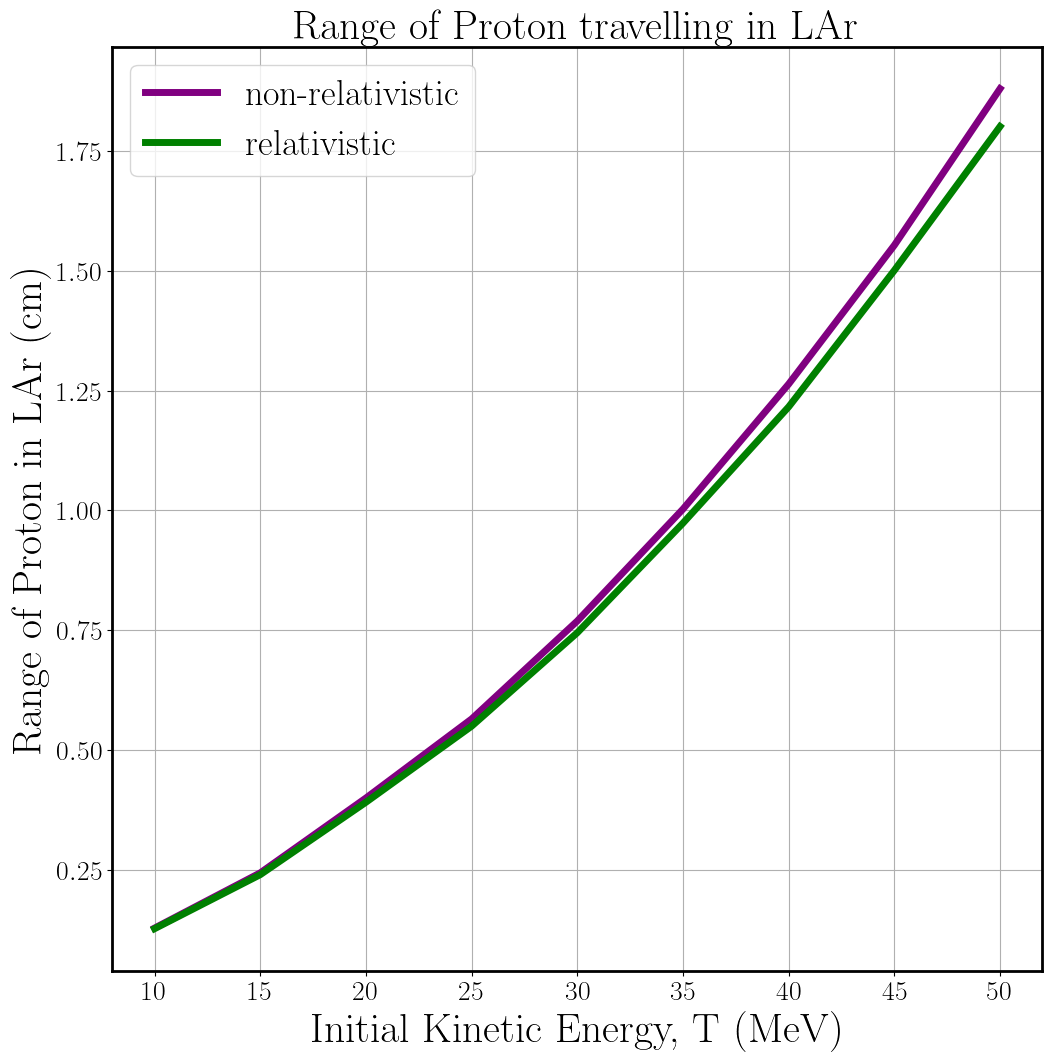

In [147]:
# Plotting the function 

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_title("Range of Proton travelling in LAr", fontsize=30)
plt.plot(tr,nonrel_listp, c='purple',label='non-relativistic',lw=5)
plt.plot(tr,rel_listp, c='green',label='relativistic',lw=5)
# plt.axvline(100,ls='--',c='red',lw=3)
plt.grid()

ax.set_ylabel("Range of Proton in LAr (cm)",fontsize=30)
ax.set_xlabel('Initial Kinetic Energy, T (MeV)',fontsize=30)
plt.legend(fontsize=24)

plt.yticks(fontsize=20), plt.xticks(fontsize=20)

ax.legend(fontsize=26)

# plt.savefig("Range_Proton_LAr_rel_vs_nonrel.jpg", bbox_inches= 'tight')
plt.show()

In [148]:
# lamd = np.linspace(100,200,925)   #wavelength of light 

#Defining a function to calculate the betalist for some given initial K.E of Proton in LAr
#Calculating range of Proton of different initial KE travelling in LAr: 

# t_arr = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000


#def make_first_list(t):


def make_betalistp(t,x,dx):
    ''' t = t_list input from data'''
    
    
    xlist = []
    tlist = [] 
    tslope = []
    betalistp = []
    
#     x = 0 #in cm 
#     dx = 0.01 #in cm 
    
    while t>0: 
        
        betap  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
        t_slope = (((k1*np.log(k2*(betap**2/(1-betap**2))))/betap**2) - k1)
        t = t - (t_slope * dx)
        tslope.append(t_slope)
        tlist.append(t)
        betalistp.append(betap)

        x=x+dx    
        xlist.append(x)
        
#       print(t, beta, xlist)
         
    #Linear Interpolation: 

    if (len(tlist)>1)  and (len(xlist)>1):
    
        tnp1 = tlist[-1]
        tnp2 = tlist[-2]
        xnp1 = xlist[-1]
        xnp2 = xlist[-2]
        
        rangp = xnp2 - (tnp2 * ((xnp1-xnp2)/(tnp1 - tnp2))) #Range of Proton: Relativistic approach 
#         print(betalist)
        
        return betalistp  #range


betalistp_500 = make_betalistp(500,0,0.1)
# print(betalistp_500)


# Cherenkov photons: Protons

In [149]:

# betap  = np.sqrt(1 - (1/(1 + tp/mp)**2)) #Relativistic Approach 
# betap
print(betap)

# print(beta)
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betap - 1))/(2 * (a_0*betap - 1) + lamd_uv * (a_pvs * betap - np.sqrt((a_pvs * betap)**2 - 4 * (a_0*betap - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betap - 1))/(2 * (a_0*betap - 1) + lamd_uv * (a_pvs * betap + np.sqrt((a_pvs * betap)**2 - 4 * (a_0*betap - 1)**2 * gamma**2)))

# plt.plot(betap, lamdmin)
# plt.plot(betap, lamdmax)

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)


print(func(200,0.8))


0.11997882039260821
1.228556414545162e-08


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\3851866689.py:15: RuntimeWarning: invalid value encountered in sqrt
  lamdmin = (2*lamd_uv*(a_0*betap - 1))/(2 * (a_0*betap - 1) + lamd_uv * (a_pvs * betap - np.sqrt((a_pvs * betap)**2 - 4 * (a_0*betap - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\3851866689.py:16: RuntimeWarning: invalid value encountered in sqrt
  lamdmax = (2*lamd_uv*(a_0*betap - 1))/(2 * (a_0*betap - 1) + lamd_uv * (a_pvs * betap + np.sqrt((a_pvs * betap)**2 - 4 * (a_0*betap - 1)**2 * gamma**2)))


[0.7052138  0.71311572 0.75796532 0.79249149 0.81980026 0.8418569
 0.85997431 0.87506571 0.89862002 0.92302433 0.93948654 0.94766554]
114.25870587211331 116.0676642813296 0.8594588910545236
112.21537399475207 119.67611908457438 0.8690891299298864
109.15369782633309 139.11078368042578 0.9237482767581839
107.95771444065065 188.5902383072582 0.9658260543609161
107.20482450892213 500 0.999107821570974
106.66193623069087 500 1.025988712529471
106.6 500 1.0480687827938144
106.6 500 1.066460992573257
106.6 500 1.09516711519255
106.6 500 1.1249091625360406
106.6 500 1.1449720021696195
106.6 500 1.1549399325424936


(array([ 385,  400,  500,  600,  700,  800,  900, 1000, 1200, 1500, 1800,
        2000]),
 array([0.7052138 , 0.71311572, 0.75796532, 0.79249149, 0.81980026,
        0.8418569 , 0.85997431, 0.87506571, 0.89862002, 0.92302433,
        0.93948654, 0.94766554]),
 [0.06617273049394226,
  3.931795377574739,
  69.56733454236348,
  174.21466730294875,
  335.56769644271054,
  492.58463265244507,
  613.1672094341894,
  707.9510472313307,
  846.4545856625617,
  978.9189784171338,
  1062.50371423808,
  1102.4212540581495])

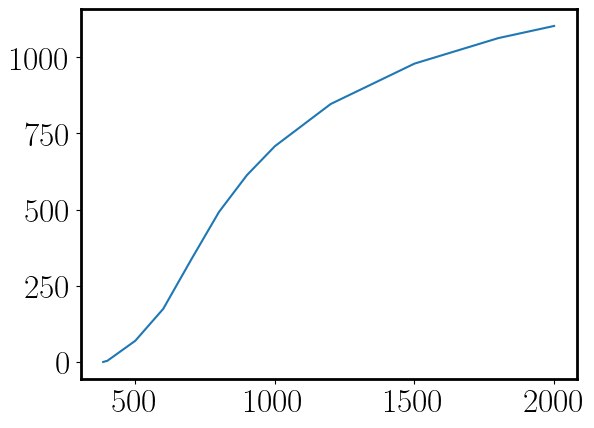

In [150]:
#Instantaneous Yield of Proton
#Defining Refractive index fit & Calculating the instantaneous Cerenkov light (Proton)

# t = 500 #K.E of Proton  in MeV
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

mp = 938  #Proton's mass in MeV

# t = np.array([383.96156,400,500,600,650,700,750,800,825,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
tp = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,

# print(beta)

betap  = np.sqrt(1 - (1/(1 + tp/mp)**2)) #Relativistic Approach 
print(betap)

# print(beta)
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betap - 1))/(2 * (a_0*betap - 1) + lamd_uv * (a_pvs * betap - np.sqrt((a_pvs * betap)**2 - 4 * (a_0*betap - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betap - 1))/(2 * (a_0*betap - 1) + lamd_uv * (a_pvs * betap + np.sqrt((a_pvs * betap)**2 - 4 * (a_0*betap - 1)**2 * gamma**2)))

# plt.plot(betap, lamdmin)
# plt.plot(betap, lamdmax)

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 

lamd_min = []
lamd_max = []
cerenkovfinallist = []
cerenkovaprxisump = []

# dx = 0.01 #in cm 
      
for j in tp: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j) #OUTPUT
#     print(make_betalist(j))
#     mybetalist = make_betalist(j,0,0.01)
#     filtered_betalist = [x for x in mybetalist if x > 0.7046534357] 
#     print(j, np.shape(filtered_betalist))#, filtered_betalist)
# #     myxlist = make_xlist(j)
#     print(j, filtered_betalist, filtered_xlist) #OUTPUT filtered_betalist, 

  
    # for i in filtered_betalist:  #[0:20]
        
        # dx = 0.01 #one that matters 
        
        
#         filtered_xlist = myxlist
#         print(filtered_xlist)

    i  = np.sqrt(1 - (1/(1 + j/mp)**2)) #Relativistic Approach 
    
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
        lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
        lmax = min(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))), 500)
        print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
        lmin = max(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))), 106.6)
        lmax = 500
        print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
        
    no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(j, no_cerenkov_x[0]*1e7)
    cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
    # cerenkovsum += no_cerenkov_x[0] 
    
    # lmin.append(lamd_min)
    # lmax.append(lamd_max)
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovaprxisump.append(no_cerenkov_x[0] * 1e7) #conversion factor to standard units
    
# plt.plot(tp,lamd_min)
# plt.plot(tp,lamd_max)

plt.plot(tp, cerenkovaprxisump)
tp, betap, cerenkovaprxisump
    
# make_betalist(500)

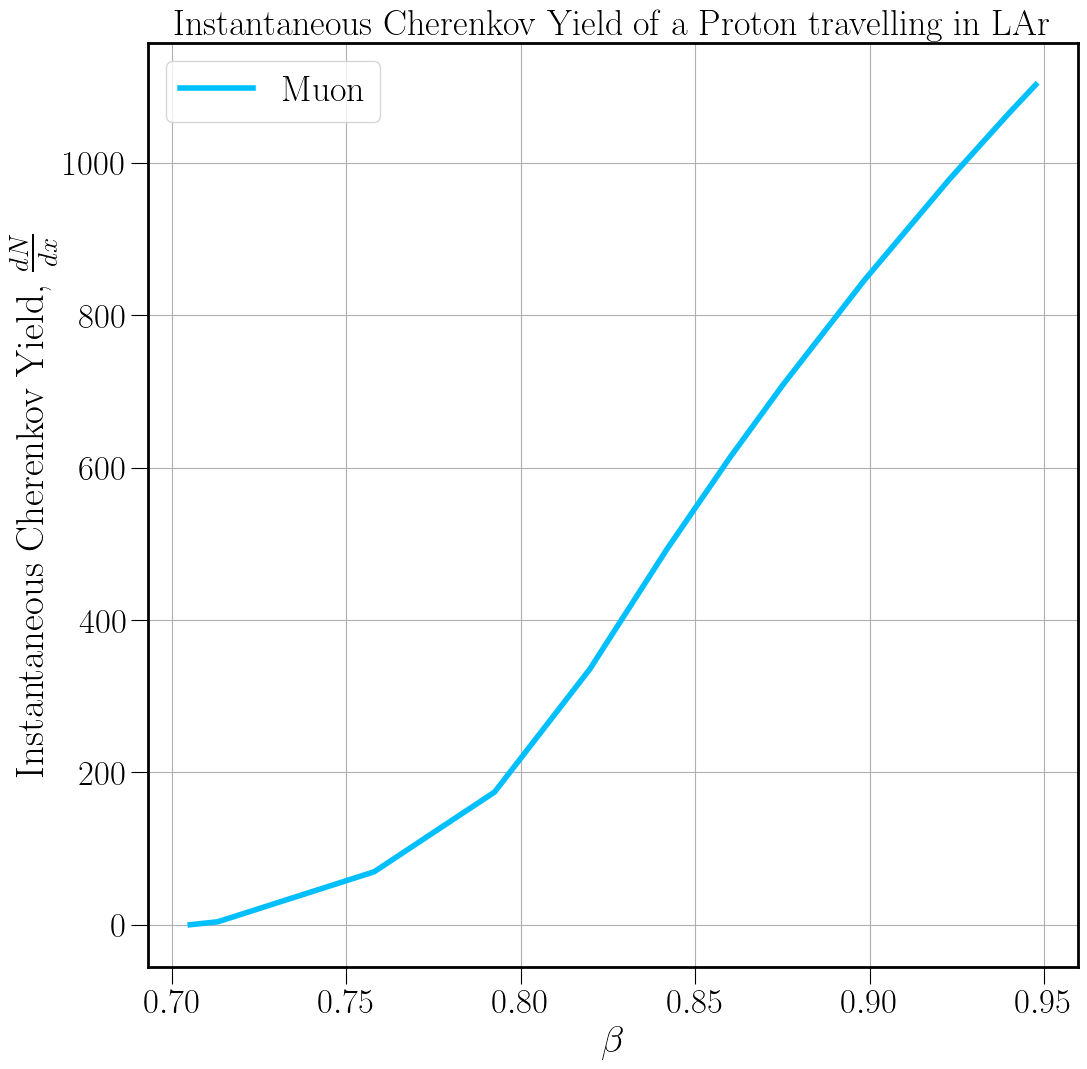

In [151]:
#Plot of instantaneous Cherenkov photons emitted by Muon in the LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Instantaneous Cherenkov Yield of a Proton travelling in LAr", fontsize=26)
ax.plot(betap, cerenkovaprxisump, linewidth = 4, label='Muon', color='deepskyblue')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("$\\beta$",fontsize=28)
ax.set_ylabel('Instantaneous Cherenkov Yield, $\\frac{dN}{dx}$',fontsize=28)
ax.grid()
ax.legend(fontsize=26)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("Instantaneous_cherenkov_yield_fbeta_proton_LAr_approxfit.jpg")

[0.         0.42824876 0.56622157 0.6526336  0.7052138  0.71311572
 0.75796532 0.79249149 0.81980026 0.8418569  0.85997431 0.87506571
 0.89862002 0.92302433 0.93948654 0.94766554]
nan nan 0.0
nan nan 0.5219157748626554
nan nan 0.6900661388026771
nan nan 0.79537829454772
114.25870587211331 116.0676642813296 0.8594588910545236
112.21537399475207 119.67611908457438 0.8690891299298864
109.15369782633309 139.11078368042578 0.9237482767581839
107.95771444065065 188.5902383072582 0.9658260543609161
107.20482450892213 500 0.999107821570974
106.66193623069087 500 1.025988712529471
106.6 500 1.0480687827938144
106.6 500 1.066460992573257
106.6 500 1.09516711519255
106.6 500 1.1249091625360406
106.6 500 1.1449720021696195
106.6 500 1.1549399325424936
[   0  100  200  300  385  400  500  600  700  800  900 1000 1200 1500
 1800 2000] [nan, nan, nan, nan, 114.25870587211331, 112.21537399475207, 109.15369782633309, 107.95771444065065, 107.20482450892213, 106.66193623069087, 106.6, 106.6, 106.6, 106.6

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1568380835.py:29: RuntimeWarning: invalid value encountered in sqrt
  lamdmin = (2*lamd_uv*(a_0*betapl - 1))/(2 * (a_0*betapl - 1) + lamd_uv * (a_pvs * betapl - np.sqrt((a_pvs * betapl)**2 - 4 * (a_0*betapl - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1568380835.py:30: RuntimeWarning: invalid value encountered in sqrt
  lamdmax = (2*lamd_uv*(a_0*betapl - 1))/(2 * (a_0*betapl - 1) + lamd_uv * (a_pvs * betapl + np.sqrt((a_pvs * betapl)**2 - 4 * (a_0*betapl - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1568380835.py:89: RuntimeWarning: invalid value encountered in sqrt
  lmin = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2))))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\1568380835.py:90: RuntimeWarning: invalid value encountered in sqrt
  lmax = min(((2*lamd_uv*((a_0 * i) - 1))/(

(0.0, 2000.0)

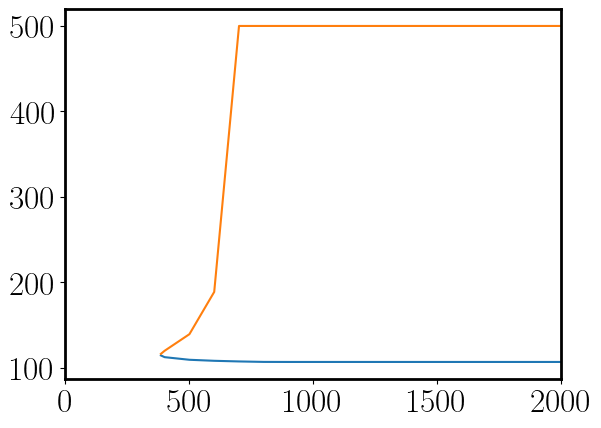

In [152]:
#Instantaneous Yield of Proton
#Defining Refractive index fit & Calculating the instantaneous Cerenkov light (Proton)

# t = 500 #K.E of Proton  in MeV
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

mp = 938  #Proton's mass in MeV

# t = np.array([383.96156,400,500,600,650,700,750,800,825,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# tp = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,
tpl = np.array([0,100,200,300,385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,   ,2500,3000
# tpl = np.array([500])
# print(beta)

betapl  = np.sqrt(1 - (1/(1 + tpl/mp)**2)) #Relativistic Approach 
print(betapl)

# print(beta)
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betapl - 1))/(2 * (a_0*betapl - 1) + lamd_uv * (a_pvs * betapl - np.sqrt((a_pvs * betapl)**2 - 4 * (a_0*betapl - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betapl - 1))/(2 * (a_0*betapl - 1) + lamd_uv * (a_pvs * betapl + np.sqrt((a_pvs * betapl)**2 - 4 * (a_0*betapl - 1)**2 * gamma**2)))

# plt.plot(betap, lamdmin)
# plt.plot(betap, lamdmax)

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 

lamd_minp = []
lamd_maxp = []
cerenkovfinallist = []
# cerenkovaprxisump = []

# dx = 0.01 #in cm 
      
for j in tpl: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j) #OUTPUT
#     print(make_betalist(j))
#     mybetalist = make_betalist(j,0,0.01)
#     filtered_betalist = [x for x in mybetalist if x > 0.7046534357] 
#     print(j, np.shape(filtered_betalist))#, filtered_betalist)
# #     myxlist = make_xlist(j)
#     print(j, filtered_betalist, filtered_xlist) #OUTPUT filtered_betalist, 

  
    # for i in filtered_betalist:  #[0:20]
        
        # dx = 0.01 #one that matters 
        
        
#         filtered_xlist = myxlist
#         print(filtered_xlist)

    i  = np.sqrt(1 - (1/(1 + j/mp)**2)) #Relativistic Approach 
    
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
        lmin = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2))))
        lmax = min(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))), 500)
        print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
        lmin = max(((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))), 106.6)
        lmax = 500
        print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
        
#     no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
# #         print(j, no_cerenkov_x[0]*1e7)
#     cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
#     # cerenkovsum += no_cerenkov_x[0] 
    
    lamd_minp.append(lmin)
    lamd_maxp.append(lmax)
    cerenkovfinallist.append(cerenkovtlist)
    # cerenkovaprxisump.append(no_cerenkov_x[0] * 1e7) #conversion factor to standard units
    
plt.plot(tpl,lamd_minp)
plt.plot(tpl,lamd_maxp)
print(tpl,lamd_minp,lamd_maxp)
plt.xlim(0,2000)
# plt.plot(tp, cerenkovaprxisump)
# tpl, betapl, cerenkovaprxisump
    
# make_betalist(500)

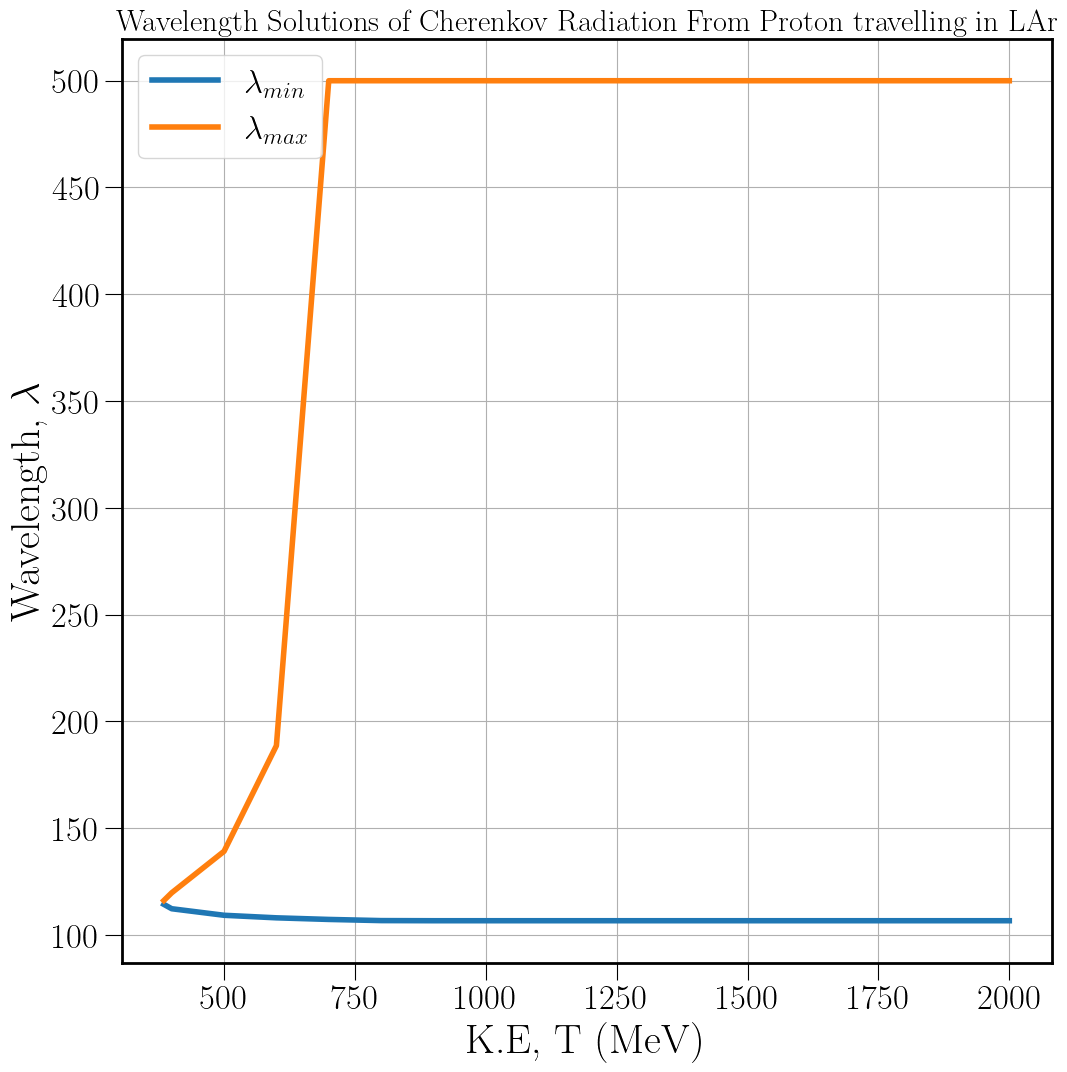

In [153]:
#Wavelength solutions for Protons

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Wavelength Solutions of Cherenkov Radiation From Proton travelling in LAr", fontsize=22)
ax.plot(tpl, lamd_minp, linewidth = 4, label='$\\lambda_{min}$') #, color='g'
ax.plot(tpl, lamd_maxp, linewidth = 4, label='$\\lambda_{max}$') #, color='b'
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("K.E, T (MeV)",fontsize=30)
# ax.set_xlabel("$\\beta$",fontsize=28)
ax.set_ylabel('Wavelength, $\\lambda$',fontsize=30)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(350,1000)
# plt.ylim(0,15000)
# plt.savefig("wavelength_solns_proton_fT_LAr_approxfit.jpg")

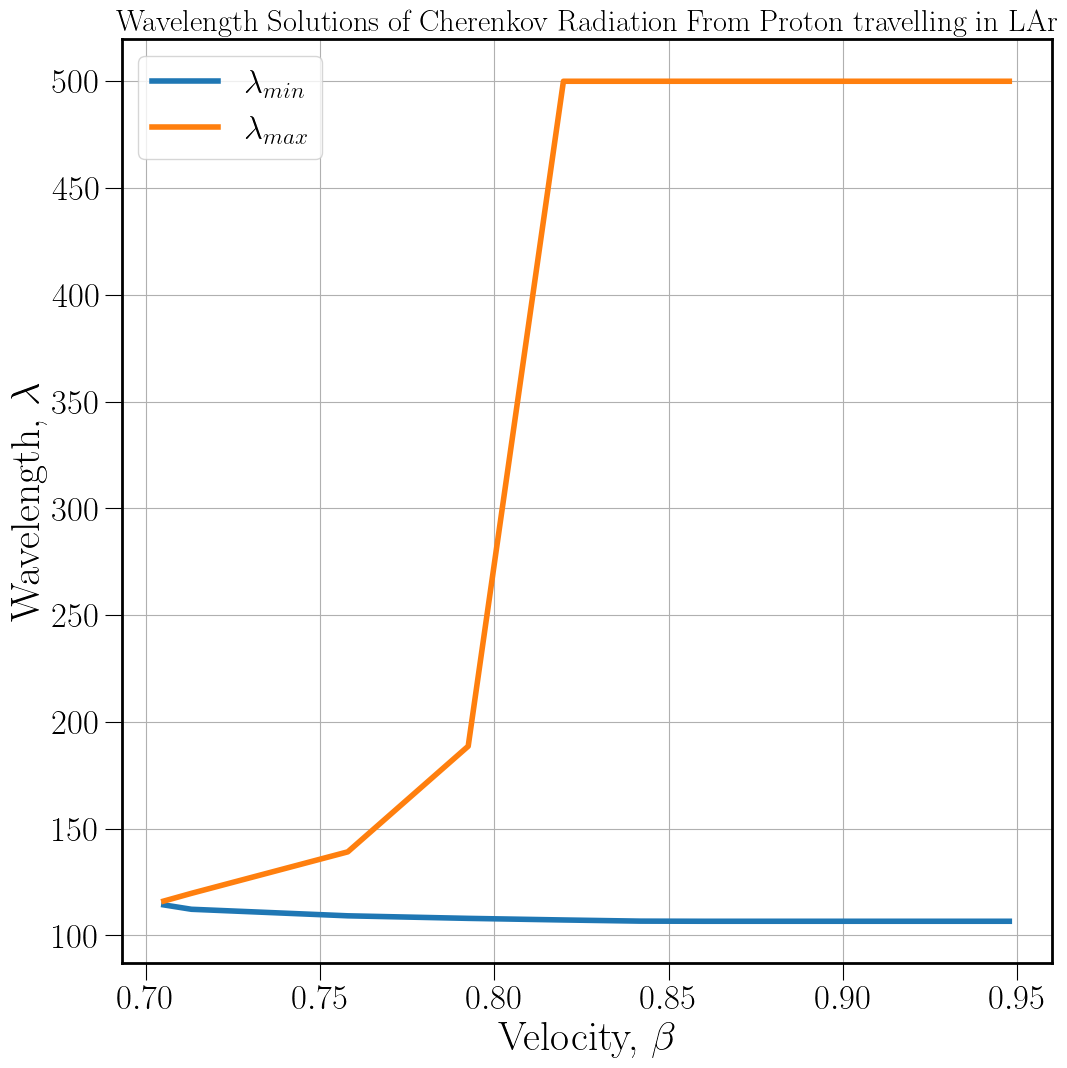

In [154]:
#Wavelength solutions for Protons

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Wavelength Solutions of Cherenkov Radiation From Proton travelling in LAr", fontsize=22)
ax.plot(betapl, lamd_minp, linewidth = 4, label='$\\lambda_{min}$') #, color='g'
ax.plot(betapl, lamd_maxp, linewidth = 4, label='$\\lambda_{max}$') #, color='b'
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("Velocity, $\\beta$",fontsize=30)
# ax.set_xlabel("$\\beta$",fontsize=28)
ax.set_ylabel('Wavelength, $\\lambda$',fontsize=30)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("wavelength_solns_proton_fbeta_LAr_approxfit.jpg")

[0.         0.42824876 0.56622157 0.6526336  0.7052138  0.71311572
 0.75796532 0.79249149 0.81980026 0.8418569  0.85997431 0.87506571
 0.89862002 0.92302433 0.93948654 0.94766554 0.9620614  0.97121809]
[   0  100  200  300  385  400  500  600  700  800  900 1000 1200 1500
 1800 2000 2500 3000] [          nan           nan           nan           nan  116.06766428
  119.67611908  139.11078368  188.59023831 3453.34210682  -12.6664824
   40.60259059   58.15481997   72.24229607   80.25882865   83.94126539
   85.45665838   87.76290325   89.0448804 ]


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\4076321823.py:24: RuntimeWarning: invalid value encountered in sqrt
  lamdmin = (2*lamd_uv*(a_0*betapl - 1))/(2 * (a_0*betapl - 1) + lamd_uv * (a_pvs * betapl - np.sqrt((a_pvs * betapl)**2 - 4 * (a_0*betapl - 1)**2 * gamma**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_5900\4076321823.py:25: RuntimeWarning: invalid value encountered in sqrt
  lamdmax = (2*lamd_uv*(a_0*betapl - 1))/(2 * (a_0*betapl - 1) + lamd_uv * (a_pvs * betapl + np.sqrt((a_pvs * betapl)**2 - 4 * (a_0*betapl - 1)**2 * gamma**2)))


(0.0, 1000.0)

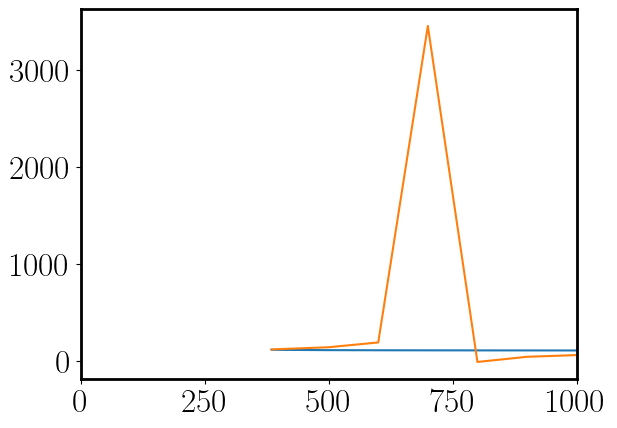

In [155]:
#Instantaneous Yield of Proton

mp = 938  #Proton's mass in MeV

# t = np.array([383.96156,400,500,600,650,700,750,800,825,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# tp = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,
tpl = np.array([0,100,200,300,385,400,500,600,700,800,900,1000,1200,1500,1800,2000,2500,3000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,

# print(beta)

betapl  = np.sqrt(1 - (1/(1 + tpl/mp)**2)) #Relativistic Approach 
print(betapl)

# print(beta)
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betapl - 1))/(2 * (a_0*betapl - 1) + lamd_uv * (a_pvs * betapl - np.sqrt((a_pvs * betapl)**2 - 4 * (a_0*betapl - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betapl - 1))/(2 * (a_0*betapl - 1) + lamd_uv * (a_pvs * betapl + np.sqrt((a_pvs * betapl)**2 - 4 * (a_0*betapl - 1)**2 * gamma**2)))

print(tpl,lamdmax)
plt.plot(tpl,lamdmin)
plt.plot(tpl,lamdmax)
plt.xlim(0,1000)

[0.7052138  0.71311572 0.75796532 0.79249149 0.81980026 0.8418569
 0.85997431 0.87506571 0.89862002 0.92302433 0.93948654 0.94766554]


(array([ 385,  400,  500,  600,  700,  800,  900, 1000, 1200, 1500, 1800,
        2000]),
 array([0.7052138 , 0.71311572, 0.75796532, 0.79249149, 0.81980026,
        0.8418569 , 0.85997431, 0.87506571, 0.89862002, 0.92302433,
        0.93948654, 0.94766554]),
 [0.010699949173122017,
  6.789321534722044,
  932.306317713878,
  4522.40557836276,
  12534.30341429221,
  27564.389488452165,
  49351.33892729327,
  76724.8143235782,
  144704.93446311125,
  270544.01407298323,
  415403.7606405965,
  519133.1837355845])

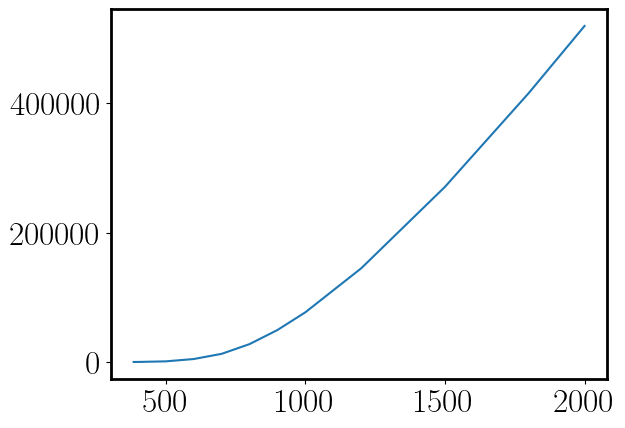

In [156]:
#Defining Refractive index fit & Calculating the total Cerenkov light (Proton)

# t = 500 #K.E of Proton  in MeV
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

mp = 938  #Proton's mass in MeV

# t = np.array([383.96156,400,500,600,650,700,750,800,825,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
tp = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,
# tp = np.array([385,400,500,600]) #,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,

# print(beta)

betap  = np.sqrt(1 - (1/(1 + tp/mp)**2)) #Relativistic Approach 
print(betap)

# print(beta)
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*betap - 1))/(2 * (a_0*betap - 1) + lamd_uv * (a_pvs * betap - np.sqrt((a_pvs * betap)**2 - 4 * (a_0*betap - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*betap - 1))/(2 * (a_0*betap - 1) + lamd_uv * (a_pvs * betap + np.sqrt((a_pvs * betap)**2 - 4 * (a_0*betap - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 


cerenkovfinallist = []
cerenkovaprxsump = []

dx = 0.1 #in cm 
      
for j in tp: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j) #OUTPUT
#     print(make_betalist(j))
    mybetalistp = make_betalistp(j,0,0.1)
    filtered_betalistp = [x for x in mybetalistp if x > 0.7046534357] 
    # print(j, np.shape(filtered_betalistp))#, filtered_betalist)
#     myxlist = make_xlist(j)
#     print(j, filtered_betalistp, filtered_xlist) #OUTPUT filtered_betalist, 

  
    for i in filtered_betalistp:  #[0:20]
        
        dx = 0.1 #one that matters 
        
        
#         filtered_xlist = myxlist
#         print(filtered_xlist)

         
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
            lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            lmax = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
            lmin = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))) #, 106.6)
            lmax = np.inf
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(j, no_cerenkov_x[0]*1e7)
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
    
        cerenkovsum += no_cerenkov_x[0] 
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovaprxsump.append(cerenkovsum * 1e6 * dx/0.1) #conversion factor to standard units
    
    
plt.plot(tp, cerenkovaprxsump)
tp, betap, cerenkovaprxsump
    
# make_betalist(500)

# Comparison of Range

((array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
  [Text(0, -20.0, '$\\mathdefault{−20}$'),
   Text(0, 0.0, '$\\mathdefault{0}$'),
   Text(0, 20.0, '$\\mathdefault{20}$'),
   Text(0, 40.0, '$\\mathdefault{40}$'),
   Text(0, 60.0, '$\\mathdefault{60}$'),
   Text(0, 80.0, '$\\mathdefault{80}$'),
   Text(0, 100.0, '$\\mathdefault{100}$'),
   Text(0, 120.0, '$\\mathdefault{120}$')]),
 (array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
  [Text(-5.0, 0, '$\\mathdefault{−5}$'),
   Text(0.0, 0, '$\\mathdefault{0}$'),
   Text(5.0, 0, '$\\mathdefault{5}$'),
   Text(10.0, 0, '$\\mathdefault{10}$'),
   Text(15.0, 0, '$\\mathdefault{15}$'),
   Text(20.0, 0, '$\\mathdefault{20}$'),
   Text(25.0, 0, '$\\mathdefault{25}$'),
   Text(30.0, 0, '$\\mathdefault{30}$')]))

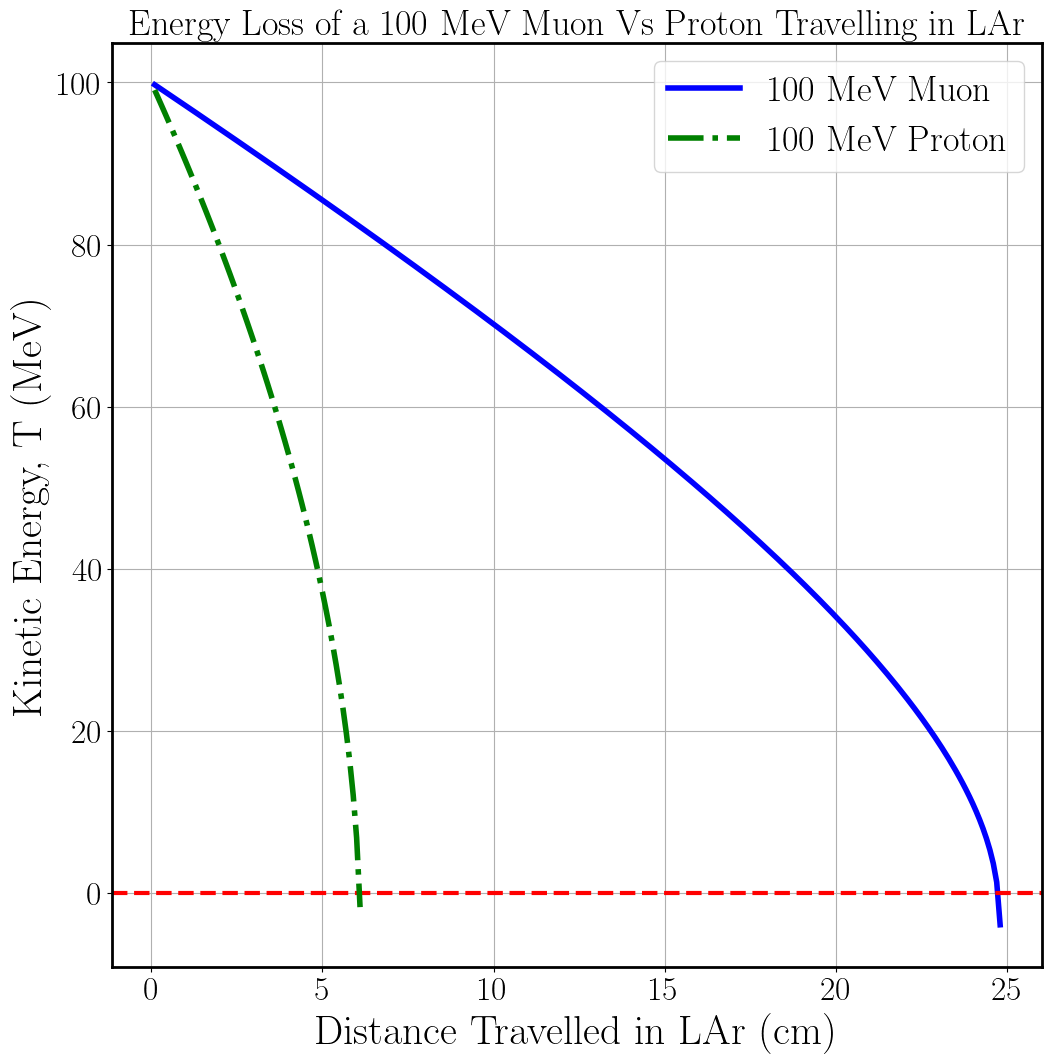

In [157]:
#K.E. loss of a 100 MeV Muon

#Calculating the distance travelled by Proton (with given initial K.E) in LAr
# xlist = np.linspace(0,199.9,2000) 

t = 100 #initial K.E of the proton in MeV 
# t = np.array([1,10,20,50,100,200,250,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV

dx = 0.1 #in cm 

# print(xlist2, tlist2)
# print(xlist2p, tlist2p)

#Plotting the distance travelled by Muon (with given initial K.E) in LAr:  

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)


ax.set_title("Energy Loss of a 100 MeV Muon Vs Proton Travelling in LAr", fontsize=26)
# ax.scatter(xlist,tlist)
# ax.scatter(xlist1,tlist1, c='purple',label='non-relativistic',lw=3)
ax.plot(xlist2, tlist2, c='blue',label='100 MeV Muon',lw=4) #'relativistic'

#Continuous plot: 
# ax.plot(xlist1,tlist1, c='purple',lw=4) #label='non-relativistic'
# ax.plot(xlist2, tlist2, c='green', lw=4) #label='relativistic'
plt.axhline(0,ls='--',c='red',lw=3)

ax.plot(xlist2p, tlist2p, c='green', label='100 MeV Proton', lw=4, ls='dashdot') #label='relativistic'


ax.grid()

ax.set_ylabel("Kinetic Energy, T (MeV)",fontsize=30)
ax.set_xlabel('Distance Travelled in LAr (cm)',fontsize=30)

plt.legend(fontsize=26)

plt.yticks(fontsize=24), plt.xticks(fontsize=24)

# plt.savefig("KEloss_MuonvsProton_100MeV_LAr.jpg", bbox_inches= 'tight')
# plt.show()



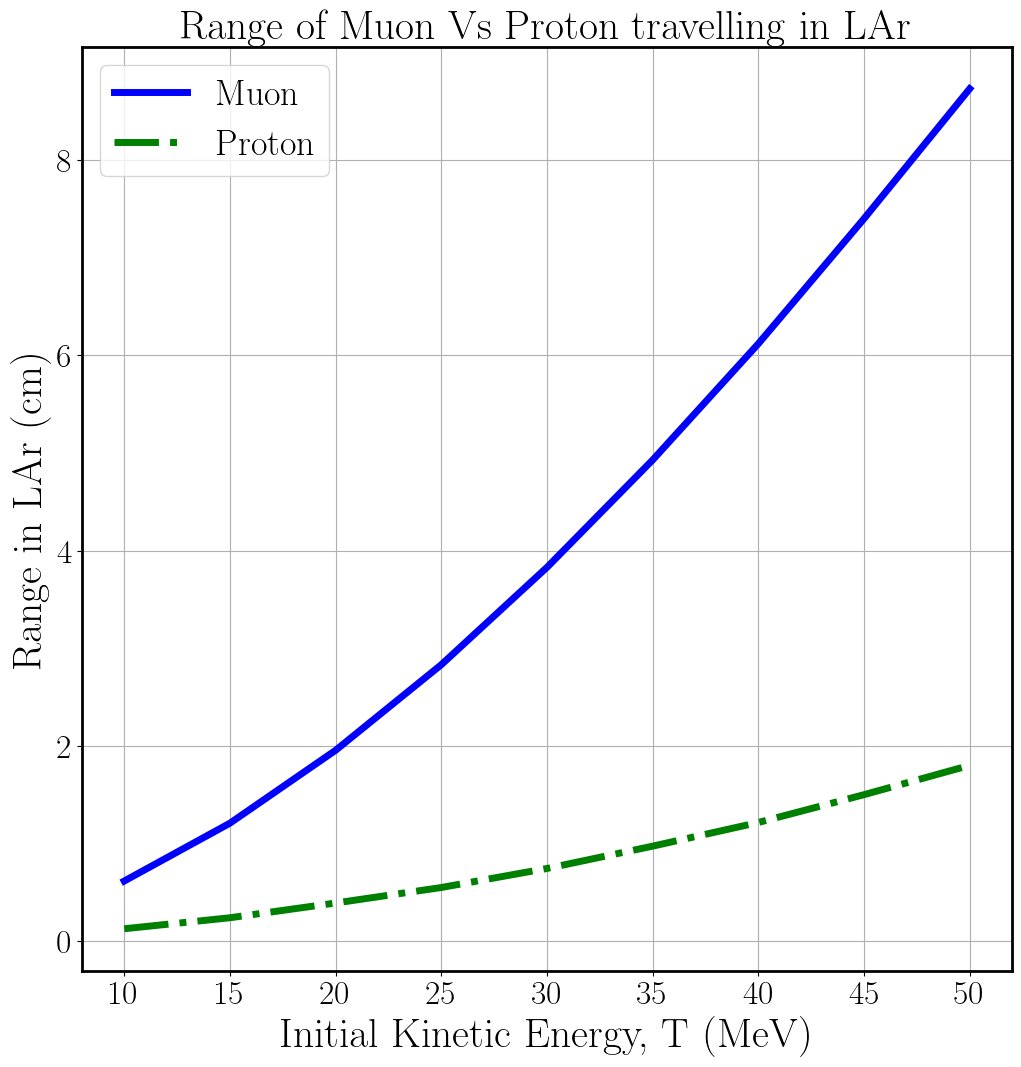

In [158]:
#Comparing the range
# Plotting the function 

# tr = np.array([5,10,15,20,25,30,35,40,45,50])
# tm = np.array([5,10,15,20,25,30,35,40,45,50]) #initial  K.E of the muon in MeV
# tp = np.array([10,20,50,100,200,250,300,400,450]) #initial  K.E of the proton in MeV ,500,600,700,800,900,1000




fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_title("Range of Muon Vs Proton travelling in LAr", fontsize=30)
plt.plot(tr,rel_listmu, c='blue',label='Muon',lw=5)
plt.plot(tr,rel_listp, c='green',label='Proton',lw=5, ls='dashdot')
# plt.axvline(100,ls='--',c='red',lw=3)
plt.grid()

ax.set_ylabel("Range in LAr (cm)",fontsize=30)
ax.set_xlabel('Initial Kinetic Energy, T (MeV)',fontsize=30)
plt.legend(fontsize=24)

plt.yticks(fontsize=24), plt.xticks(fontsize=24)

ax.legend(fontsize=26)

# plt.savefig("Range_MuonvsProton_LAr_rel.jpg", bbox_inches= 'tight')
plt.show()

# Comparison of Yield

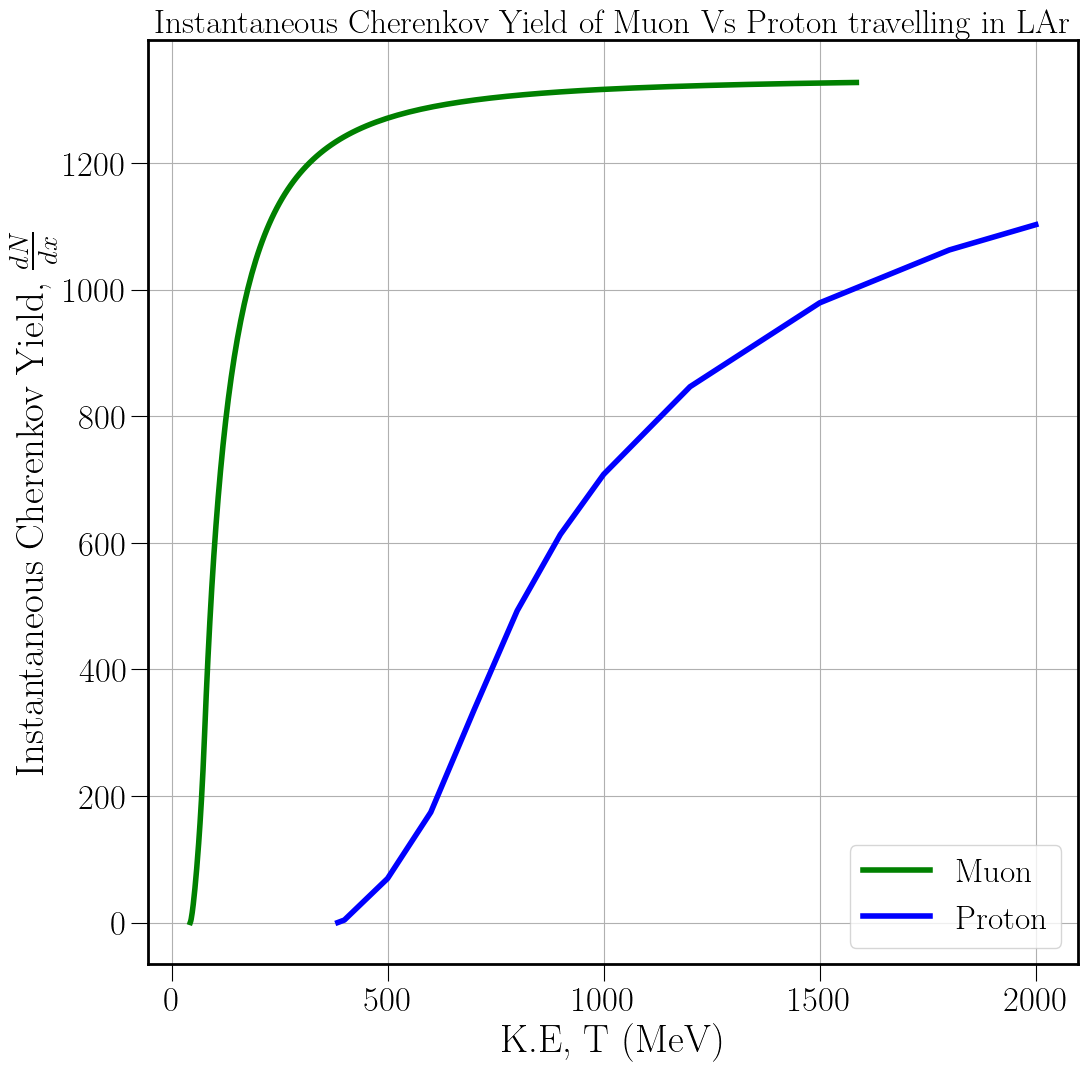

In [159]:
#Comparison of instantaneous yield of Muon vs Proton in LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Instantaneous Cherenkov Yield of Muon Vs Proton travelling in LAr", fontsize=24)
ax.plot(tm, cerenkovaprxisummu, linewidth = 4, label='Muon', color='g')
ax.plot(tp, cerenkovaprxisump, linewidth = 4, label='Proton', color='b')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("K.E, T (MeV)",fontsize=28)
# ax.set_xlabel("$\\beta$",fontsize=28)
ax.set_ylabel('Instantaneous Cherenkov Yield, $\\frac{dN}{dx}$',fontsize=28)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("instantaneous_cherenkov_yield_muonvsproton_LAr_approxfit.jpg")

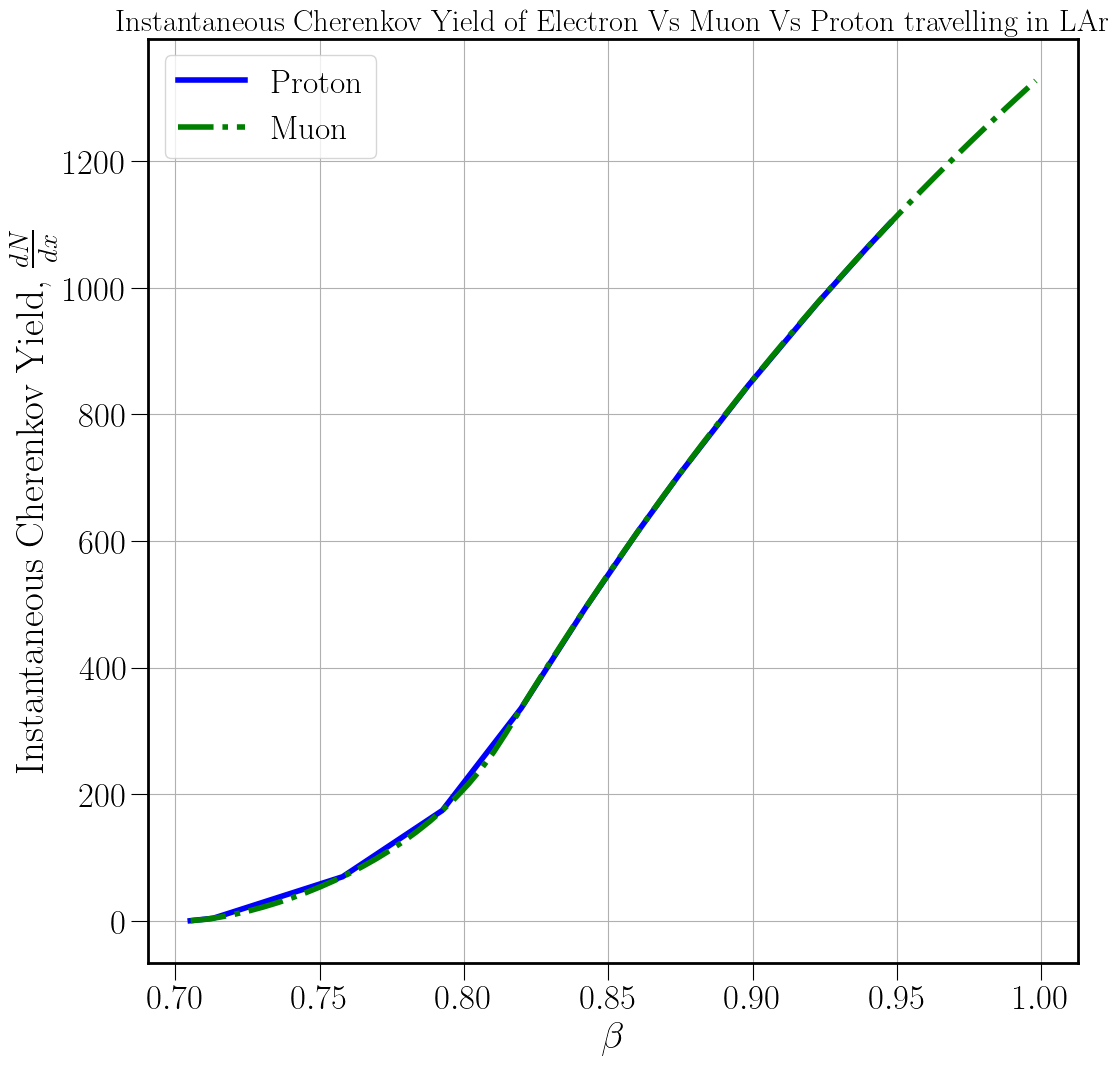

In [161]:
#Comparison of instantaneous yield of Muon vs Proton in LAr medium. (no vs beta)
#Note: Scaling in beta maybe different than T 

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Instantaneous Cherenkov Yield of Electron Vs Muon Vs Proton travelling in LAr", fontsize=22)

ax.plot(betap, cerenkovaprxisump, linewidth = 4, label='Proton', color='b')
ax.plot(betam, cerenkovaprxisummu, linewidth = 4, ls='dashdot', label='Muon', color='g')
# ax.plot(betae, cerenkovaprxisume, linewidth = 4, ls='dashed', label='Electron', color='r')

ax.tick_params(axis='both',which='major',labelsize=25,length=12)

# ax.set_xlabel("Threshold scaled K.E, $\mathcal{T} = \\frac{T - T_{thr}}{T_{thr}}$",fontsize=28)
ax.set_xlabel("$\\beta$",fontsize=28)
ax.set_ylabel('Instantaneous Cherenkov Yield, $\\frac{dN}{dx}$',fontsize=28)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("instantaneous_cherenkov_yield_fbeta_muonvsproton_LAr_approxfit.jpg")
# plt.savefig("instantaneous_cherenkov_yield_fbeta_electronvsmuonvsproton_LAr_approxfit.jpg")

ValueError: x and y must have same first dimension, but have shapes (300,) and (0,)

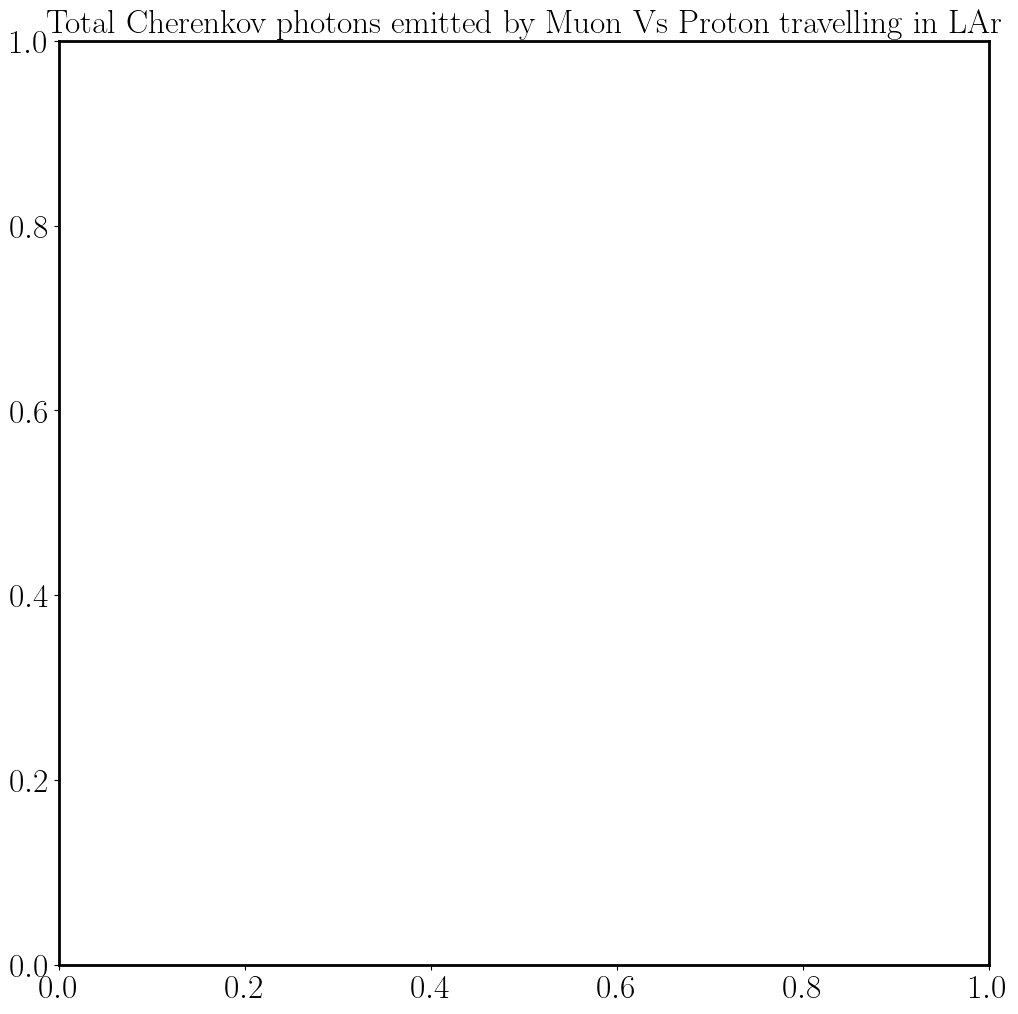

In [162]:
#Comparison of total yield of Muon vs Proton in LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Total Cherenkov photons emitted by Muon Vs Proton travelling in LAr", fontsize=24)
ax.plot(tm, cerenkovaprxsummu, linewidth = 4, label='Muon', color='g')
ax.plot(tp, cerenkovaprxsump, linewidth = 4, label='Proton', color='b')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("K.E, T (MeV)",fontsize=28)
# ax.set_xlabel("$\\beta$",fontsize=28)
ax.set_ylabel('Total Cherenkov Yield, $\\frac{dN}{dx}$',fontsize=28)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("total_cherenkov_yield_muonvsproton_LAr_approxfit.jpg")

In [ ]:
#Comparison of total yield of Muon vs Proton in LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Total Cherenkov photons emitted by Electron Vs Muon Vs Proton travelling in LAr", fontsize=22)

ax.plot(te, cerenkovaprxsume, linewidth = 4, label='Electron', color='r')
ax.plot(tm, cerenkovaprxsummu, linewidth = 4, label='Muon', color='g')
ax.plot(tp, cerenkovaprxsump, linewidth = 4, label='Proton', color='b')

ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("K.E, T (MeV)",fontsize=28)
# ax.set_xlabel("$\\beta$",fontsize=28)
ax.set_ylabel('Total Cherenkov Yield, $\\frac{dN}{dx}$',fontsize=28)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("total_cherenkov_yield_electronvsmuonvsproton_LAr_approxfit.jpg")

In [ ]:
#Plot of Cerenkov photons emitted by Proton in the LAr medium. (no vs T)

#TeX up labels and text:

# plt.rc("text", usetex=True)
# plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
# plt.rc('font', size=24) 
# plt.rc('font', family='serif')

# #     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams["font.weight"] = "bold"     
# #     plt.rcParams["axes.labelweight"] = "bold"
# plt.rc('axes', linewidth=2)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Total Cherenkov photons emitted by Muon Vs Proton travelling in LAr", fontsize=24)
# ax.plot((te-43.11)/43.11, cerenkovaprxsummu, linewidth = 4, label='Electron', color='r')
ax.plot((tm-43.11)/43.11, cerenkovaprxsummu, linewidth = 4, label='Muon', color='g')
ax.plot((tp-385)/385, cerenkovaprxsump, linewidth = 4, label='Proton', color='b')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("Threshold scaled K.E, $\mathcal{T} = \\frac{T - T_{thr}}{T_{thr}}$",fontsize=28)
ax.set_ylabel('Number of Cherenkov Photons',fontsize=28)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("total_cerenkov_yield_electronvsmuonvsproton_LAr_approxfit_scaledT.jpg")

In [ ]:
#N(beta_thr)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Total Cherenkov photons emitted by Muon Vs Proton travelling in LAr", fontsize=24)
ax.plot(betam, cerenkovaprxsummu, linewidth = 4, label='Muon', color='g')
ax.plot(betap, cerenkovaprxsump, linewidth = 4, label='Proton', color='b')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

# ax.set_xlabel("Threshold scaled K.E, $\mathcal{T} = \\frac{T - T_{thr}}{T_{thr}}$",fontsize=28)
ax.set_xlabel("$\\beta$",fontsize=28)

ax.set_ylabel('Number of Cherenkov Photons',fontsize=28)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("total_cherenkov_yield_fbeta_muonvsproton_LAr_approxfit.jpg")

In [ ]:
#N(beta_thr)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Total Cherenkov photons emitted by Muon Vs Proton travelling in LAr", fontsize=24)
ax.plot((betam-0.704)/0.704, cerenkovaprxsummu, linewidth = 4, label='Muon', color='g')
ax.plot((betap-0.704)/0.704, cerenkovaprxsump, linewidth = 4, label='Proton', color='b')
ax.tick_params(axis='both',which='major',labelsize=25,length=12)

ax.set_xlabel("Threshold scaled beta, $\mathcal{\\beta} = \\frac{\\beta - \\beta_{thr}}{\\beta_{thr}}$",fontsize=28)
# ax.set_xlabel("$\\beta$",fontsize=28)

ax.set_ylabel('Number of Cherenkov Photons',fontsize=28)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("total_cerenkov_photon_muonvsproton_LAr_approxfit2_beta.jpg")

# plt.savefig("total_cerenkov_yield_muonvsproton_LAr_approxfit2_scaledbeta.jpg")

In [ ]:
# # total_cherenkov_photons_ourfit_ft_vs_ang.jpg

# fig = plt.figure(figsize=(12,12))

# ax = fig.add_subplot(111)
# ax.set_title("Optimization of Angular Resolution ($d\\theta$) For Cherenkov Yield for 500 MeV Proton in LAr Using Our Fit", fontsize=16)

# ax.plot((np.pi/2)/ndtheta1, n1_ft, linewidth = 3.5, color='deepskyblue', label="FT(dx=0.1 cm)") #
# ax.plot((np.pi/2)/ndtheta2, n2_ft, linewidth = 3.5, color='royalblue', label="FT(dx=0.01 cm)") #
# ax.plot((np.pi/2)/ndtheta3, n3_ft, linewidth = 3.5, color='navy', label="FT(dx=0.001 cm)") #

# ax.plot((np.pi/2)/ndtheta1, n1_ad, linewidth = 3.5, color='limegreen', ls= 'dashdot', label="AD(dx=0.1 cm)") #
# ax.plot((np.pi/2)/ndtheta2, n2_ad, linewidth = 3.5, color='olive', ls= 'dashdot', label="AD(dx=0.01 cm)") #
# ax.plot((np.pi/2)/ndtheta3, n3_ad, linewidth = 3.5, color='green', ls= 'dashdot', label="AD(dx=0.001 cm)") #

# ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# ax.set_xlabel("Angular Resolution, $d\\theta$ (radian)", fontsize=28)
# ax.set_ylabel('Total Cherenkov Yield (N)', fontsize=28)
# ax.grid()
# ax.legend(fontsize=22)
# # ax.set_xlim(0,500)
# plt.savefig("resolutionN_ourfit_ft_ad_vs_dtheta.jpg", bbox_inches="tight")


# Wavelength Solutions for Cherenkov Emission

# Muon Cherenkov AD (Approx Fit)

In [7]:
# #Calculating Betalist for muons with different K.E.

# #Parameters

# rho = 1.38 #density of LAr in kg/m^3 at 89K temperature  
# me = 9.11e-31 #Electron's mass in Kg.
# io = 23.6e-6  #Average Ionization Potential of LAr in MeV
# k =  0.307  #Constant in MeV.cm^2/g 
# zb = 18  #Atomic No of Ar (absorber)
# a = 39.948  #Mass no of Ar (absorber)
# zs = -1 #charge of the particle 
# c = 3e8
# e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

# #Mass of the particle travelling
# # mp = 938 #Proton's mass
# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

# k1 = k*rho*zb*zs**2/a
# k2 = 2*e/io 

# alpha = 1/137 #Fine-structure (EM coupling) constant 


# # lamd = np.linspace(100,200,925)   #wavelength of light 



In [8]:
#Calculating Betalist for muons with different K.E.

#Parameters

rho = 1.38 #density of LAr in kg/m^3 at 89K temperature  
me = 9.11e-31 #Electron's mass in Kg.
io = 23.6e-6  #Average Ionization Potential of LAr in MeV
k =  0.307  #Constant in MeV.cm^2/g 
zb = 18  #Atomic No of Ar (absorber)
a = 39.948  #Mass no of Ar (absorber)
zs = -1 #charge of the particle 
c = 3e8
e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Mass of the particle travelling
# mp = 938 #Proton's mass
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

k1 = k*rho*zb*zs**2/a
k2 = 2*e/io 

alpha = 1/137 #Fine-structure (EM coupling) constant 


# lamd = np.linspace(100,200,925)   #wavelength of light 


#Defining a function to calculate the betalist for some given initial K.E of Proton in LAr
#Calculating range of Muons with different initial KE travelling in LAr:

# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
t_arr = np.array([0,148.8,155.9,200,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,


#def make_first_list(t):


def make_betalistmu(t,x,dx):
    ''' t = t_list input from data'''
    
    
    xlist = []
    tlist = [] 
    tslope = []
    betalist = []
    
#     x = 0 #in cm 
#     dx = 0.01 #in cm 
    
    while t>0: 
        
        betam  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
        t_slope = (((k1*np.log(k2*(betam**2/(1-betam**2))))/betam**2) - k1)
        t = t - (t_slope * dx)
        tslope.append(t_slope)
        tlist.append(t)
        betalist.append(betam)

        x=x+dx    
        xlist.append(x)
        
#       print(t, beta, xlist)
         
    #Linear Interpolation: 

    if (len(tlist)>1)  and (len(xlist)>1):
    
        tnp1 = tlist[-1]
        tnp2 = tlist[-2]
        xnp1 = xlist[-1]
        xnp2 = xlist[-2]
        
        rang = xnp2 - (tnp2 * ((xnp1-xnp2)/(tnp1 - tnp2))) #Range of Proton: Relativistic approach 
#         print(betalist)
        
        return betalist  #range


betalist_50 = make_betalistmu(50,0,0.01)
print(betalist_50)

[0.7343351229183378, 0.7341881450051391, 0.7340409847320496, 0.7338936416955066, 0.7337461154906104, 0.7335984057111189, 0.7334505119494414, 0.7333024337966331, 0.7331541708423878, 0.7330057226750333, 0.7328570888815243, 0.7327082690474369, 0.7325592627569615, 0.7324100695928975, 0.7322606891366468, 0.7321111209682071, 0.731961364666166, 0.7318114198076944, 0.7316612859685402, 0.7315109627230219, 0.7313604496440219, 0.7312097463029803, 0.7310588522698883, 0.7309077671132813, 0.7307564904002324, 0.730605021696346, 0.7304533605657512, 0.7303015065710938, 0.7301494592735317, 0.729997218232726, 0.7298447830068354, 0.729692153152509, 0.7295393282248789, 0.7293863077775536, 0.7292330913626116, 0.729079678530593, 0.7289260688304936, 0.7287722618097571, 0.728618257014268, 0.7284640539883446, 0.7283096522747314, 0.7281550514145925, 0.7280002509475029, 0.727845250411443, 0.727690049342789, 0.7275346472763073, 0.7273790437451463, 0.7272232382808277, 0.727067230413241, 0.7269110196706342, 0.726754

In [26]:
t = np.array([43.11,50.24,100,200,300,400,500,600,800,1000,1200,1500,1800,2000])
# t = 500
b  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
print(t, b)

t = 500
b  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
print(t, b)


[  43.11   50.24  100.    200.    300.    400.    500.    600.    800.
 1000.   1200.   1500.   1800.   2000.  ] [0.70397593 0.73529966 0.85793361 0.93835312 0.96548344 0.97792534
 0.98466527 0.98872659 0.99317117 0.9954234  0.99672023 0.99783252
 0.99846172 0.99874024]
500 0.984665269125252


0.8213468149394477 0.9564053815691128
[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

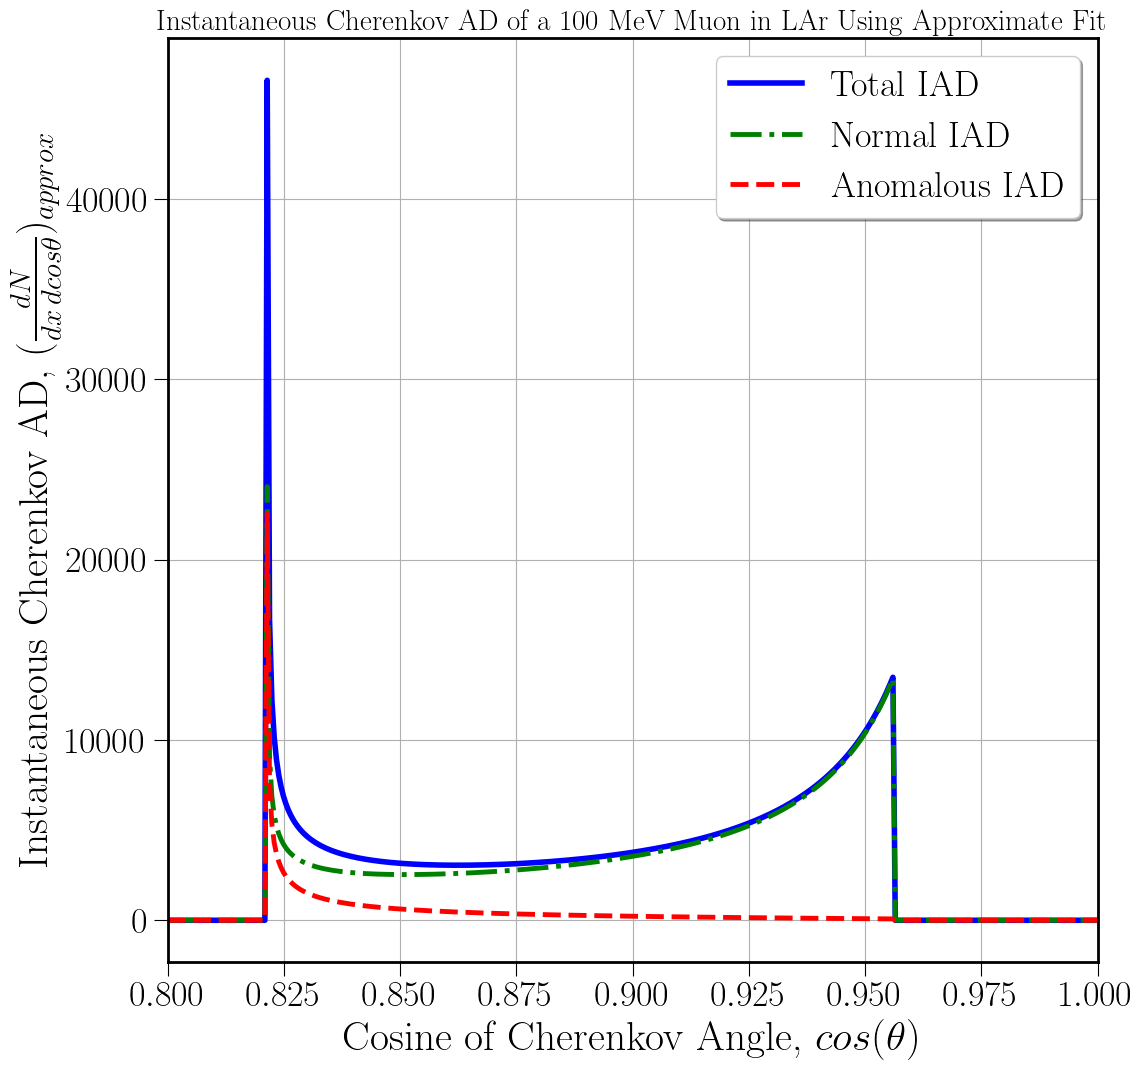

In [163]:
#Muon IAD for 100 MeV

t = 100
b = 0.85793361

alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081
lamd_uv = 106.6 

#Mass of the particle travelling
# mp = 938 #Proton's mass
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)

# b  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
# print(b)

#Scintillation 
cerenkovangtsum = []

# cerenkov_all = [[] for j in t]
# scint_all = [[] for j in t]

# for j in range(len(t)):  

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]

cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1) #asymtotic value of n and 1/beta intersection

print(cos_ang_min, cos_ang_max)

def func_anga(x):
    if x >= cos_ang_min and x <= cos_ang_max:
        return 2*pi*1e7 * (alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))
    else: 
        return 0 #To avaid getting negative contribution 
    
def func_angn(x):
    if x >= cos_ang_min and x <= cos_ang_max:
        return 2*pi*1e7 * (alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))
    else: 
        return 0 #To avaid getting negative contribution 

def func_angt(x):
    if x >= cos_ang_min and x <= cos_ang_max:
        return 2*pi*1e7 * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
    else: 
        return 0 #To avaid getting negative contribution 

func_angnc = [func_angn(x) for x in x_all]       
func_angac = [func_anga(x) for x in x_all]       

func_angtc = [func_angt(x) for x in x_all]       

print(x_all, func_angtc)


#make figure
    
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)


ax.set_title(r"Instantaneous Cherenkov AD of a 100 MeV Muon in LAr Using Approximate Fit", fontsize= 21)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
ax.set_ylabel(r"Instantaneous Cherenkov AD, $(\frac{dN}{dx \, dcos\theta})_{approx}$",fontsize=30)

ax.plot(x_all, func_angtc, lw= 4, c = 'b', label= "Total IAD")         #, c=colors_all[j], label= r"{} MeV".format(t[j])
ax.plot(x_all, func_angnc, lw= 3.5, ls= 'dashdot', c = 'g', label= "Normal IAD")         #, c=colors_all[j], label= r"{} MeV".format(t[j])
ax.plot(x_all, func_angac, lw= 3.5, ls= 'dashed', c = 'r', label= "Anomalous IAD")         #, c=colors_all[j], label= r"{} MeV".format(t[j])

plt.xlim(0.8,1)


ax.grid()
ax.tick_params(axis='both',which='major',labelsize=26,length=10)

#     ax.text(0.876,28e4,r'dx={} cm'.format(dx),fontsize=18)
# ax.text(0.901,28e4,r'dx={} cm'.format(dx),fontsize=18)

ax.legend(loc='best',fontsize=26,framealpha=None,shadow=True)
# plt.savefig("IAD_Cherenkov_100MeV_Mu_LAr_dxp1dth2000_approxfit.jpg", bbox_inches="tight")

0.7156351091808106 0.833310919590996
[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

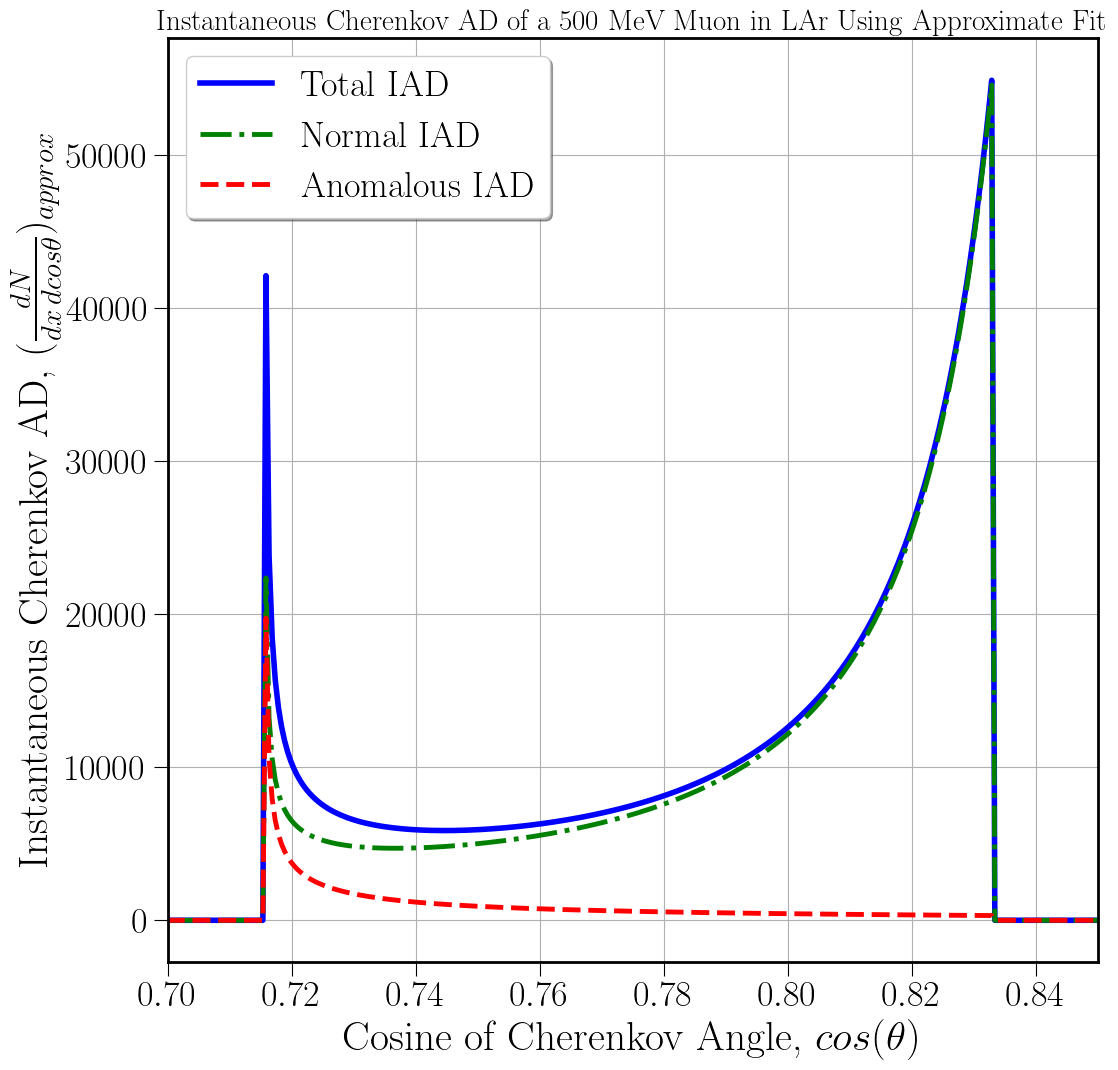

In [164]:
#Muon IAD for 500 MeV
t = 500
b = 0.98466527

alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081
lamd_uv = 106.6 

#Mass of the particle travelling
# mp = 938 #Proton's mass
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)

# b  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
# print(b)

#Scintillation 
cerenkovangtsum = []

# cerenkov_all = [[] for j in t]
# scint_all = [[] for j in t]

# for j in range(len(t)):  

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]

cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1) #asymtotic value of n and 1/beta intersection

print(cos_ang_min, cos_ang_max)

def func_anga(x):
    if x >= cos_ang_min and x <= cos_ang_max:
        return 2*pi*1e7* (alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))
    else: 
        return 0 #To avaid getting negative contribution 
    
def func_angn(x):
    if x >= cos_ang_min and x <= cos_ang_max:
        return 2*pi*1e7 * (alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))
    else: 
        return 0 #To avaid getting negative contribution 

def func_angt(x):
    if x >= cos_ang_min and x <= cos_ang_max:
        return 2*pi*1e7*(((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
    else: 
        return 0 #To avaid getting negative contribution 

func_angnc = [func_angn(x) for x in x_all]       
func_angac = [func_anga(x) for x in x_all]       

func_angtc = [func_angt(x) for x in x_all]       

print(x_all, func_angtc)


#make figure
    
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)


ax.set_title(r"Instantaneous Cherenkov AD of a 500 MeV Muon in LAr Using Approximate Fit", fontsize= 21)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
ax.set_ylabel(r"Instantaneous Cherenkov AD, $(\frac{dN}{dx \, dcos\theta})_{approx}$",fontsize=30)

ax.plot(x_all, func_angtc, lw= 4, c = 'b', label= "Total IAD")         #, c=colors_all[j], label= r"{} MeV".format(t[j])
ax.plot(x_all, func_angnc, lw= 3.5, ls= 'dashdot', c = 'g', label= "Normal IAD")         #, c=colors_all[j], label= r"{} MeV".format(t[j])
ax.plot(x_all, func_angac, lw= 3.5, ls= 'dashed', c = 'r', label= "Anomalous IAD")         #, c=colors_all[j], label= r"{} MeV".format(t[j])

plt.xlim(0.70,0.85)


ax.grid()
ax.tick_params(axis='both',which='major',labelsize=26,length=10)

#     ax.text(0.876,28e4,r'dx={} cm'.format(dx),fontsize=18)
# ax.text(0.901,28e4,r'dx={} cm'.format(dx),fontsize=18)

ax.legend(loc='best',fontsize=26,framealpha=None,shadow=True)
# plt.savefig("IAD_Cherenkov_500MeV_Mu_LAr_dxp1dth2000_approxfit.jpg", bbox_inches="tight")



In [165]:
#Integrated AD: Muons 50,100, 500 MeV

##### OVERAll FUNCTION ###### ##### Threshold Corrected Version ####### DEFAULT:FINAL

def get_cerenkov(x=0,dx=0.01,plotx1=0,plotx2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    
    alpha = 1/137 #Fine-structure (EM coupling) constant 
    a_0 = 1.18416
    a_pvs = 0.000325985
    gamma = 0.000693652
    n_max = 1.4191220261503081
    lamd_uv = 106.6 

    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    
    #Scintillation 
    cerenkovangtsum = []

    cerenkovn_all = [[] for j in t]
    cerenkova_all = [[] for j in t]
    cerenkovt_all = [[] for j in t]
    
    # scint_all = [[] for j in t]

    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangnsum = [0 for x in x_all]
        cerenkovangasum = [0 for x in x_all]
        cerenkovangtsum = [0 for x in x_all]

        mybetalist = make_betalistmu(t[j],x,dx)
#         mybetalist = make_betalist(t[j])

        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 

        # scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        # scint = np.linspace(scintp, scintp, 2000)

        for b in filtered_betalist: 
            
#             print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#             print("cos ang min: {:.3f}".format((1/(b*n_max)))) #min
#             print("cos ang max: {:.3f}".format((1/(a_0*b))))   #max

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1) #asymtotic value of n and 1/beta intersection

            
# From Babicz: 
#             cos_ang_minb = 0
#             cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

            def func_anga(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6 * (dx/0.1) * (alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))
                else: 
                    return 0 #To avaid getting negative contribution 

            def func_angn(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6 * (dx/0.1) * (alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))
                else: 
                    return 0 #To avaid getting negative contribution 

            def func_angt(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6 * (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angnc = [func_angn(x) for x in x_all]       
            func_angac = [func_anga(x) for x in x_all]       

            func_angtc = [func_angt(x) for x in x_all]       

            # print(x_all, func_angtc)
       
            cerenkovangnsum = np.add(func_angnc, cerenkovangnsum)
            cerenkovangasum = np.add(func_angac, cerenkovangasum)
            cerenkovangtsum = np.add(func_angtc, cerenkovangtsum) 
            
        cerenkovn_all[j].append(cerenkovangnsum)
        cerenkova_all[j].append(cerenkovangasum)
        cerenkovt_all[j].append(cerenkovangtsum)
        
        # scint_all[j].append(scint)

        print("Normal Cerenkov photons emitted by a {} Mev Muon in LAr: {:.3f}" .format(t[j], sum(cerenkovangnsum)/2000))  #* (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        print("Anomalous Cerenkov photons emitted by a {} Mev Muon in LAr: {:.3f}" .format(t[j], sum(cerenkovangasum)/2000))  #* (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr: {:.3f}" .format(t[j], sum(cerenkovangtsum)/2000))  #* (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        
#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
    colors_all = ['g','r','b']
    # colors_all = ['black','brown','lime','orchid','darkturquoise','hotpink','teal','firebrick','deepskyblue','green','tomato','navy','purple','red','blueviolet','orange','magenta']
    
    #     colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','deepskyblue','olive'] #
    
    
#     for k in range(len(cerenkov_all)):
#         ax[0].plot(x_all, cerenkov_all[k][0]+scint_all[k][0],label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.errorbar(x_all,  cerenkov_all[k][0]+scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]),label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
#         print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
# #         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#         ax[1].plot(x_all,np.sqrt(scint_all[k][0]),c=colors_all[k])  
    
    for i in range(len(t)):

        ax.plot(x_all, cerenkovn_all[i][0], lw= 3.5, ls= 'dashdot', c = 'g', label= "Normal AD")  #label= r"{} MeV".format(t[i])
        ax.plot(x_all, cerenkova_all[i][0], lw= 3.5, ls= 'dashed', c = 'r', label= "Anomalous AD")
        ax.plot(x_all, cerenkovt_all[i][0], lw= 4.0, ls= 'solid', c = 'b', label= "Total AD")
        
#         if i==len(t)-1:
            
#             ax.plot(x_all, scint_all[i][0],lw=3,  label=r'Scintillation', color=colors_all[i]) #, color= 'g'
        
#         else:
#             ax.plot(x_all, scint_all[i][0],lw=3, color=colors_all[i]) #, color= 'g'

        
        # plt.yscale("log")
        
    # ax.set_title(r"Cherenkov AD of a 50 MeV Muon in LAr Using Approximate Fit", fontsize= 25)
    # ax.set_title(r"Cherenkov AD of a 100 MeV Muon in LAr Using Approximate Fit", fontsize= 25)
    ax.set_title(r"Cherenkov AD of a 500 MeV Muon in LAr Using Approximate Fit", fontsize= 25)
    
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
    ax.set_ylabel(r"Total Cherenkov Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=26,length=10)
    
    
#     ax.text(0.876,28e4,r'dx={} cm'.format(dx),fontsize=18)
    # ax.text(0.901,28e4,r'dx={} cm'.format(dx),fontsize=18)
    
    ax.legend(loc='best',fontsize=22,framealpha=None,shadow=True)

        # plt.ylim([0,0.4e13])
        # plt.xlim([0.92,1])
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    plt.xlim(plotx1,plotx2)
    
    # plt.savefig("AD_Cherenkov_total_Mu_LAr_dxp001dth2000_50MeV_approxfit_normalplot.jpg", bbox_inches="tight")
    # plt.savefig("AD_Cherenkov_total_Mu_LAr_dxp001dth2000_100MeV_approxfit_normalplot.jpg", bbox_inches="tight")
    # plt.savefig("AD_Cherenkov_total_Mu_LAr_dxp01dth2000_500MeV_approxfit_normalplot.jpg", bbox_inches="tight")
    
    plt.show()
    
#     

started:  time.struct_time(tm_year=2025, tm_mon=3, tm_mday=28, tm_hour=10, tm_min=55, tm_sec=36, tm_wday=4, tm_yday=87, tm_isdst=0)


Please enter one or more t-values in MeV, separated by a comma each 43.11,50.24,100,200,300,400,500,600,800,1000


Normal Cerenkov photons emitted by a 43.11 Mev Muon in LAr: 0.000
Anomalous Cerenkov photons emitted by a 43.11 Mev Muon in LAr: 0.000
Total Cerenkov photons emitted by a 43.11 Mev Muon in LAr: 0.000
Normal Cerenkov photons emitted by a 50.24 Mev Muon in LAr: 13.380
Anomalous Cerenkov photons emitted by a 50.24 Mev Muon in LAr: 8.172
Total Cerenkov photons emitted by a 50.24 Mev Muon in LAr: 21.552
Normal Cerenkov photons emitted by a 100.0 Mev Muon in LAr: 4403.821
Anomalous Cerenkov photons emitted by a 100.0 Mev Muon in LAr: 783.524
Total Cerenkov photons emitted by a 100.0 Mev Muon in LAr: 5187.345
Normal Cerenkov photons emitted by a 200.0 Mev Muon in LAr: 40466.581
Anomalous Cerenkov photons emitted by a 200.0 Mev Muon in LAr: 4468.502
Total Cerenkov photons emitted by a 200.0 Mev Muon in LAr: 44935.083
Normal Cerenkov photons emitted by a 300.0 Mev Muon in LAr: 89687.684
Anomalous Cerenkov photons emitted by a 300.0 Mev Muon in LAr: 9054.068
Total Cerenkov photons emitted by a 3

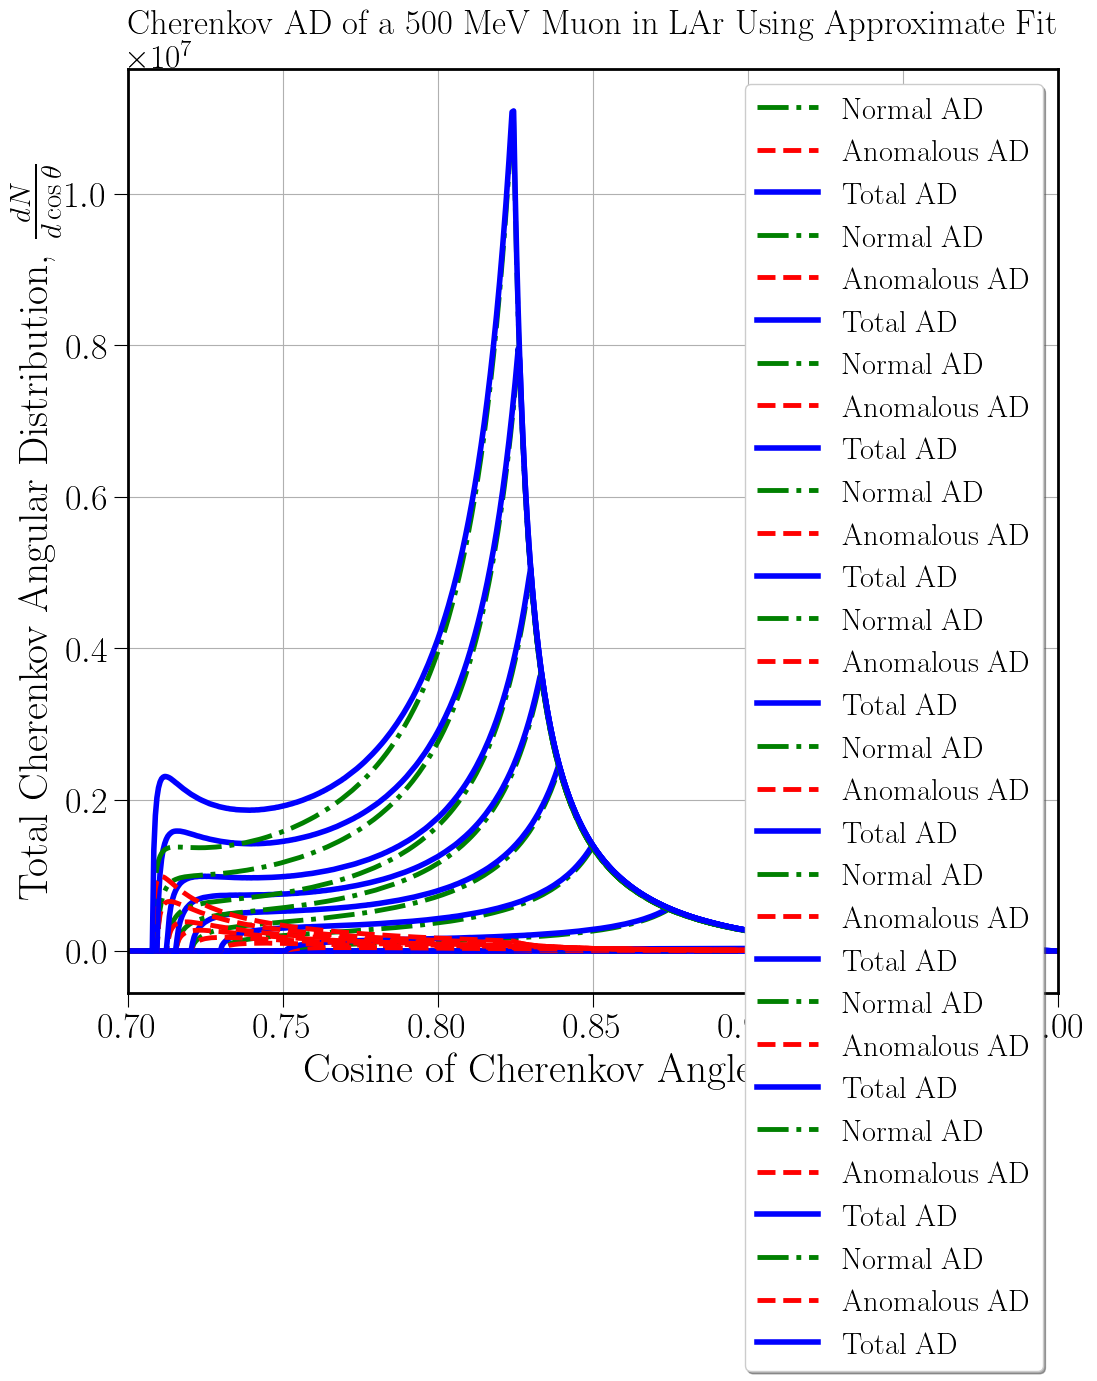

ended:  time.struct_time(tm_year=2025, tm_mon=3, tm_mday=28, tm_hour=13, tm_min=32, tm_sec=54, tm_wday=4, tm_yday=87, tm_isdst=0)


In [166]:
############ RUN THE FUNCTION ###################

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
 
# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

# get_cerenkov(x=0,dx=0.001,plotx1=0.95,plotx2=1) #50 MeV
# get_cerenkov(x=0,dx=0.001,plotx1=0.80,plotx2=1) #100 MeV
get_cerenkov(x=0,dx=0.01,plotx1=0.70,plotx2=1) #500 MeV

print('ended: ', time.gmtime())

# t = 50, 100, 500 MeV

# t = 43.11,50.24,100,200,300,400,500,600,800,1000,1200,1500,1800,2000
# t_arr = np.array([383.96,400,450,500,550,600,650,700,750,800,812]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

In [167]:
#Integrated AD: Muons

##### OVERAll FUNCTION ###### ##### Threshold Corrected Version ####### DEFAULT:FINAL

def get_cerenkov(x=0,dx=0.1,plotx1=0,plotx2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    
    alpha = 1/137 #Fine-structure (EM coupling) constant 
    a_0 = 1.18416
    a_pvs = 0.000325985
    gamma = 0.000693652
    n_max = 1.4191220261503081
    lamd_uv = 106.6 

    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    
    #Scintillation 
    cerenkovangtsum = []

    cerenkov_all = [[] for j in t]
    scint_all = [[] for j in t]

    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangsum = [0 for x in x_all]

        mybetalist = make_betalistmu(t[j],x,dx)
#         mybetalist = make_betalist(t[j])

        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

        for b in filtered_betalist: 
            
#             print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#             print("cos ang min: {:.3f}".format((1/(b*n_max)))) #min
#             print("cos ang max: {:.3f}".format((1/(a_0*b))))   #max

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1) #asymtotic value of n and 1/beta intersection

            
# From Babicz: 
#             cos_ang_minb = 0
#             cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

            def func_angt(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6* (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angt(x) for x in x_all]       
            
            cerenkovangsum = np.add(func_angtc, cerenkovangsum) 
            
        cerenkov_all[j].append(cerenkovangsum)
        scint_all[j].append(scint)

        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr: {:.3f}" .format(t[j], sum(cerenkovangsum)/2000))  #* (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
    colors_all = ['black','brown','lime','orchid','darkturquoise','hotpink','teal','firebrick','deepskyblue','green','tomato','navy','purple','red','blueviolet','orange','magenta']
#     colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','deepskyblue','olive'] #
    
    
#     for k in range(len(cerenkov_all)):
#         ax[0].plot(x_all, cerenkov_all[k][0]+scint_all[k][0],label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.errorbar(x_all,  cerenkov_all[k][0]+scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]),label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
#         print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
# #         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#         ax[1].plot(x_all,np.sqrt(scint_all[k][0]),c=colors_all[k])

    
    
    
    for i in range(len(t)):
        
#     def make_plot(x_all,scint,ceren)


#         ax.set_title("Total Angular Distribution of a {} MeV ($\\beta$ = 0.758) Proton in LAr", fontsize= 18) #
        # 
        # func_angt = func_angp + func_angn

        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{R}$")    #func_angp = f(lamd_pterm): Blue plot
        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{L}$")     #func_angp = f(lamd_pterm): Orange plot
        ax.plot(x_all, cerenkov_all[i][0], lw= 3.5, label= r"{} MeV".format(t[i]), c=colors_all[i])     #func_angp = f(lamd_pterm): Green plot label='Cerenkov',
        
#         if i==len(t)-1:
            
#             ax.plot(x_all, scint_all[i][0],lw=3,  label=r'Scintillation', color=colors_all[i]) #, color= 'g'
        
#         else:
#             ax.plot(x_all, scint_all[i][0],lw=3, color=colors_all[i]) #, color= 'g'

        
        # plt.yscale("log")
        
    ax.set_title(r"Cherenkov Angular Distribution of Muons in LAr Using Approximate Fit", fontsize= 26)
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
    ax.set_ylabel(r"Total Cherenkov Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=26,length=10)

#     ax.text(0.876,28e4,r'dx={} cm'.format(dx),fontsize=18)
    # ax.text(0.901,28e4,r'dx={} cm'.format(dx),fontsize=18)
    
    ax.legend(loc='best',fontsize=22,framealpha=None,shadow=True)

        # plt.ylim([0,0.4e13])
        # plt.xlim([0.92,1])
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    plt.xlim(plotx1,plotx2)
    
    # plt.savefig("AD_Cherenkov_total_Mu_LAr_dxp1dth2000_allT_approxfit_normalplot.jpg", bbox_inches="tight")
#     plt.savefig("AD_Cherenkov_P_LAr_dxp01dth2000_383to812MeV_normal.jpg", bbox_inches="tight")
#   
    
    plt.show()
    
#     

started:  time.struct_time(tm_year=2025, tm_mon=3, tm_mday=28, tm_hour=13, tm_min=32, tm_sec=55, tm_wday=4, tm_yday=87, tm_isdst=0)


Please enter one or more t-values in MeV, separated by a comma each 43.11,50.24,100


Total Cerenkov photons emitted by a 43.11 Mev Muon in LAr: 0.000
Total Cerenkov photons emitted by a 50.24 Mev Muon in LAr: 22.616
Total Cerenkov photons emitted by a 100.0 Mev Muon in LAr: 5203.851


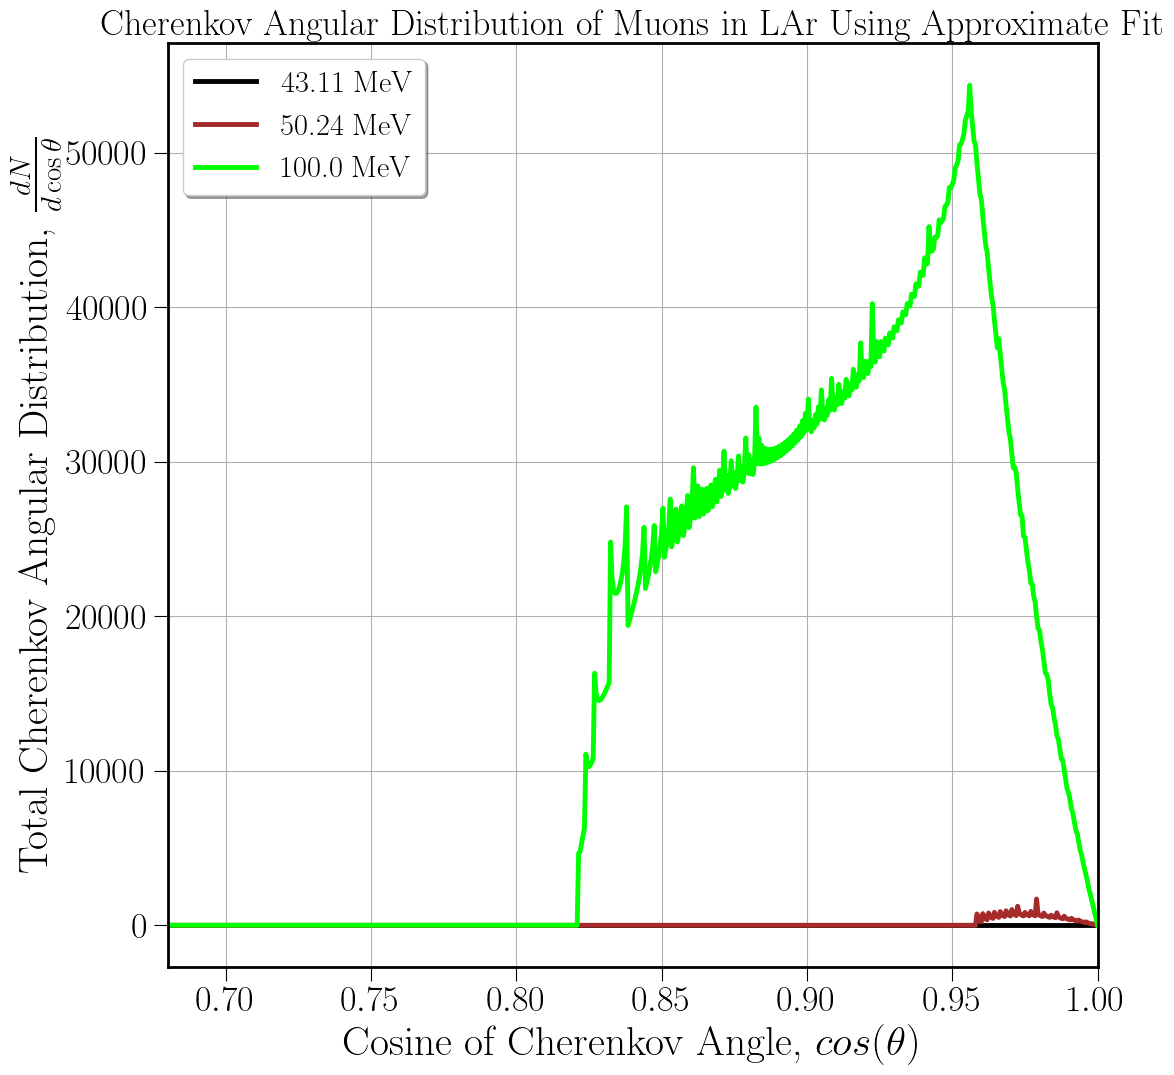

ended:  time.struct_time(tm_year=2025, tm_mon=3, tm_mday=28, tm_hour=19, tm_min=4, tm_sec=24, tm_wday=4, tm_yday=87, tm_isdst=0)


In [168]:
############ RUN THE FUNCTION ###################

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
 
# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

get_cerenkov(x=0,dx=0.1,plotx1=0.68,plotx2=1)

print('ended: ', time.gmtime())

# t = 43.11,50.24,100,200,300,400,500,600,800,1000,1200,1500,1800,2000
# t_arr = np.array([383.96,400,450,500,550,600,650,700,750,800,812]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

In [169]:
# #Scintillation 

# scintp = 40000*t*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
# scint = np.linspace(scintp, scintp, 5000)

In [170]:
# print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(j, (sum(cerenkovangsum) * (dx/0.1))/2000) )

# #Converting the above plot to dcos(theta) vs cos(theta)
# # print(b, func_angp, func_angn)
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)

# ax.set_title("Total Angular Distribution of a 500 MeV ($\\beta$ = 0.758) Proton in LAr", fontsize= 18) #
# # 
# # func_angt = func_angp + func_angn

# # ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{R}$")    #func_angp = f(lamd_pterm): Blue plot
# # ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{L}$")     #func_angp = f(lamd_pterm): Orange plot
# ax.plot(x_all, cerenkovangsum, linewidth= 3.5, color= 'g', label= "500 MeV Proton (dx= 0.1 cm, d$\\theta$ = $\\frac{\\pi /2}{2000}$)")     #func_angp = f(lamd_pterm): Green plot label='Cerenkov',
# ax.plot(x_all, scint, linewidth= 3.5, label='Scintillation', lw=5) #, color= 'g'
# plt.yscale("log")


# ax.set_xlabel("Cosine of Cherenkov Angle, $cos(\\theta)$ ",fontsize=24)
# ax.set_ylabel("Total Angular Distribution, $\\frac{dN}{dcos\\theta}$",fontsize=24)
# ax.grid()
# ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# ax.legend(fontsize=18)

# # plt.ylim([0,0.4e13])
# # plt.xlim([0.92,1])
# plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
# # plt.savefig("AD_P500_LAr_dx0.1dth5000_All.jpg")

# # theta, func_angp, func_angn
# # cos(theta), func_angt

In [171]:
# def func_angp(x):
#         if x >= cos_ang_min:
#             return 2*pi*1e6* (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))))) #+ ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
#         else: 
#             return 0 

# def func_angn(x):
#         if x >= cos_ang_min:
#             return 2*pi*1e6* (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta) ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + 

#         else: 
#             return 0 

In [172]:
##### OVERAll FUNCTION ###### ##### Threshold Corrected Version ####### DEFAULT:FINAL (Normal)

def get_cerenkov(x=0,dx=0.1,plotx1=0,plotx2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    
    alpha = 1/137 #Fine-structure (EM coupling) constant 
    a_0 = 1.18416
    a_pvs = 0.000325985
    gamma = 0.000693652
    n_max = 1.4191220261503081
    lamd_uv = 106.6 

    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    
    #Scintillation 
    cerenkovangtsum = []

    cerenkov_all = [[] for j in t]
    scint_all = [[] for j in t]

    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangpsum = [0 for x in x_all]

        mybetalist = make_betalistmu(t[j],x,dx)
#         mybetalist = make_betalist(t[j])

        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

        for b in filtered_betalist: 
            
#             print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#             print("cos ang min: {:.3f}".format((1/(b*n_max)))) #min
#             print("cos ang max: {:.3f}".format((1/(a_0*b))))   #max

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1) #asymtotic value of n and 1/beta intersection

            
# From Babicz: 
#             cos_ang_minb = 0
#             cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

            def func_angp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6 * (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta) ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + 
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angpc = [func_angp(y) for y in x_all]       

            cerenkovangpsum = np.add(func_angpc, cerenkovangpsum) 

        cerenkov_all[j].append(cerenkovangpsum)
        scint_all[j].append(scint)

        print("Normal Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], sum(cerenkovangpsum)/2000))  # * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
    # colors_all = ['black','brown','lime','orchid','darkturquoise','hotpink','teal','firebrick','deepskyblue','green','tomato','navy','purple','red','blueviolet','orange','magenta']
    colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','olive','dodgerblue','maroon','lime']
    
#     colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','deepskyblue','olive'] #
    
    
#     for k in range(len(cerenkov_all)):
#         ax[0].plot(x_all, cerenkov_all[k][0]+scint_all[k][0],label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.errorbar(x_all,  cerenkov_all[k][0]+scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]),label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
#         print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
# #         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#         ax[1].plot(x_all,np.sqrt(scint_all[k][0]),c=colors_all[k])

    
    
    
    for i in range(len(t)):
        
#     def make_plot(x_all,scint,ceren)


#         ax.set_title("Total Angular Distribution of a {} MeV ($\\beta$ = 0.758) Proton in LAr", fontsize= 18) #
        # 
        # func_angt = func_angp + func_angn

        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{R}$")    #func_angp = f(lamd_pterm): Blue plot
        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{L}$")     #func_angp = f(lamd_pterm): Orange plot
        ax.plot(x_all, cerenkov_all[i][0], lw= 3.5, label= r"{} MeV".format(t[i]), c=colors_all[i])     #func_angp = f(lamd_pterm): Green plot label='Cerenkov',
        
#         if i==len(t)-1:
            
#             ax.plot(x_all, scint_all[i][0],lw=3,  label=r'Scintillation', color=colors_all[i]) #, color= 'g'
        
#         else:
#             ax.plot(x_all, scint_all[i][0],lw=3, color=colors_all[i]) #, color= 'g'

        
        # plt.yscale("log")
        
    ax.set_title(r"Normal Cherenkov Angular Distribution of Muons in LAr Using Approximate Fit", fontsize= 26)
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
    ax.set_ylabel(r"Normal Cherenkov Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=26,length=10)

#     ax.text(0.876,28e4,r'dx={} cm'.format(dx),fontsize=18)
    # ax.text(0.901,28e4,r'dx={} cm'.format(dx),fontsize=18)
    
    ax.legend(loc='best',fontsize=22,framealpha=None,shadow=True)

        # plt.ylim([0,0.4e13])
        # plt.xlim([0.92,1])
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    plt.xlim(plotx1,plotx2)
    
    # plt.savefig("AD_Cherenkov_normal_Mu_LAr_dxp1dth2000_allT_approxfit_normalplot.jpg", bbox_inches="tight")
#     plt.savefig("AD_Cherenkov_P_LAr_dxp01dth2000_383to812MeV_normal.jpg", bbox_inches="tight")
#   
    
    plt.show()
    
#     

started:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=24, tm_hour=7, tm_min=4, tm_sec=10, tm_wday=3, tm_yday=298, tm_isdst=0)


Please enter one or more t-values in MeV, separated by a comma each 43.11,50.24,100,200,300,400,500,600,800,1000


Normal Cerenkov photons emitted by a 43.11 Mev Proton in LAr: 0.000
Normal Cerenkov photons emitted by a 50.24 Mev Proton in LAr: 14.103
Normal Cerenkov photons emitted by a 100.0 Mev Proton in LAr: 4423.426
Normal Cerenkov photons emitted by a 200.0 Mev Proton in LAr: 40526.540
Normal Cerenkov photons emitted by a 300.0 Mev Proton in LAr: 89749.651
Normal Cerenkov photons emitted by a 400.0 Mev Proton in LAr: 142932.764
Normal Cerenkov photons emitted by a 500.0 Mev Proton in LAr: 197364.649
Normal Cerenkov photons emitted by a 600.0 Mev Proton in LAr: 252053.415
Normal Cerenkov photons emitted by a 800.0 Mev Proton in LAr: 360815.433
Normal Cerenkov photons emitted by a 1000.0 Mev Proton in LAr: 467956.945


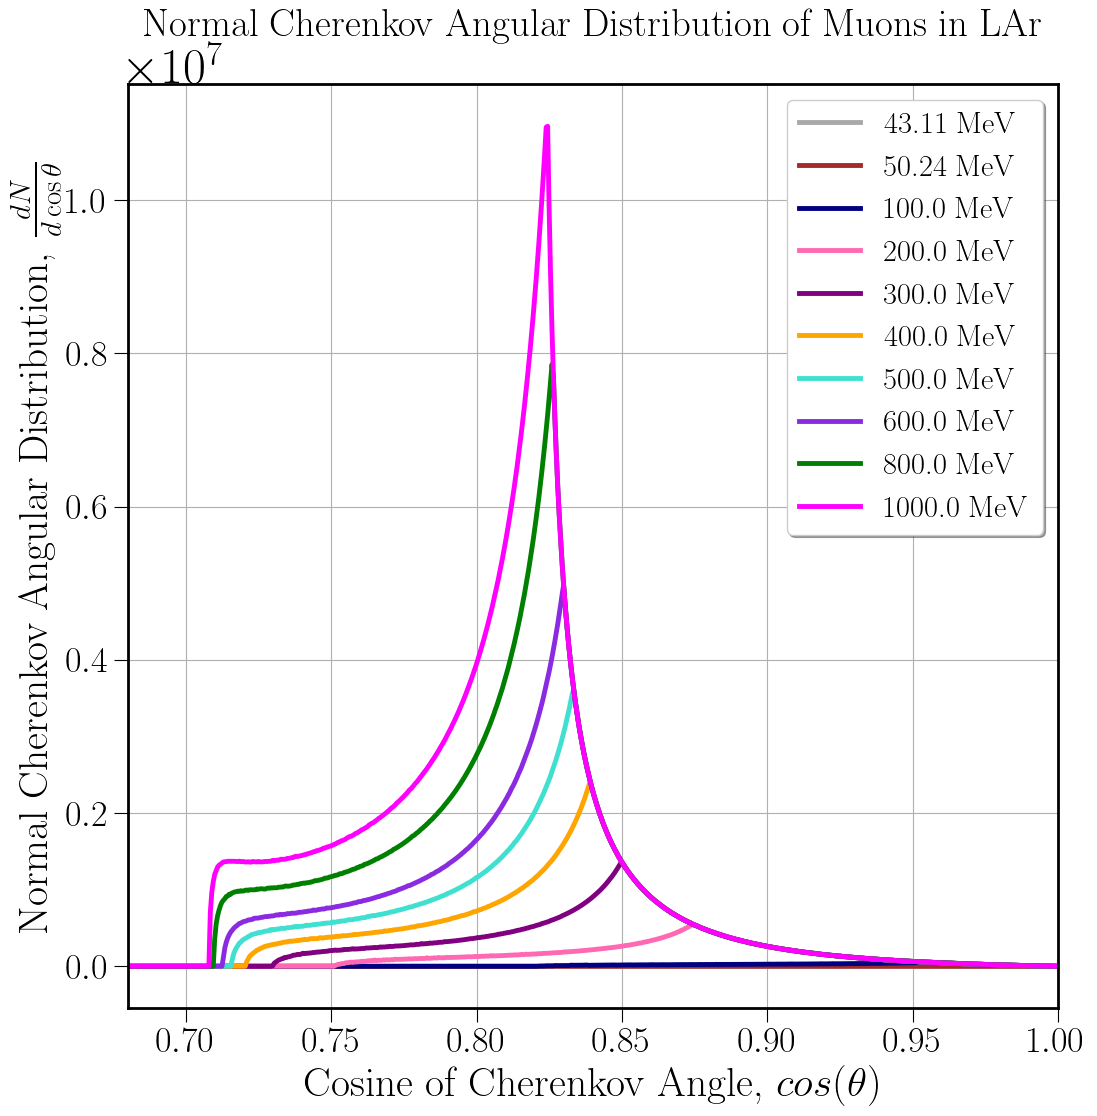

ended:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=24, tm_hour=7, tm_min=7, tm_sec=4, tm_wday=3, tm_yday=298, tm_isdst=0)


In [190]:
############ RUN THE FUNCTION ###################Normal AD####

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
 
# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

get_cerenkov(x=0,dx=0.1,plotx1=0.68,plotx2=1)

print('ended: ', time.gmtime())

# t_arr = np.array([383.96,400,450,500,550,600,650,700,750,800,812,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = 43.11,50.24,100,200,300,400,500,600,800,1000,1200,1500,1800,2000


In [197]:
##### OVERAll FUNCTION ###### ##### Threshold Corrected Version ####### DEFAULT:FINAL (Anomalous)

def get_cerenkov(x=0,dx=0.01,plotx1=0,plotx2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    
    alpha = 1/137 #Fine-structure (EM coupling) constant 
    a_0 = 1.18416
    a_pvs = 0.000325985
    gamma = 0.000693652
    n_max = 1.4191220261503081
    lamd_uv = 106.6 

    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    dx = 0.01
    
    #Scintillation 
    cerenkovangtsum = []

    cerenkov_all = [[] for j in t]
    scint_all = [[] for j in t]

    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangnsum = [0 for x in x_all]

        mybetalist = make_betalistmu(t[j],x,dx)
#         mybetalist = make_betalist(t[j])

        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

        for b in filtered_betalist: 
            
#             print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#             print("cos ang min: {:.3f}".format((1/(b*n_max)))) #min
#             print("cos ang max: {:.3f}".format((1/(a_0*b))))   #max

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1) #asymtotic value of n and 1/beta intersection

            
# From Babicz: 
#             cos_ang_minb = 0
#             cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

            # def func_angp(x):
            #     if x >= cos_ang_min and x <= cos_ang_max:
            #         return 2*pi*1e6* (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta) ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + 
            #     else: 
            #         return 0 #To avaid getting negative contribution 
            
            def func_angn(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6* (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))))) #+ ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angnc = [func_angn(y) for y in x_all]       

            cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 

        cerenkov_all[j].append(cerenkovangnsum)
        scint_all[j].append(scint)

        print("Anomalous Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], sum(cerenkovangnsum)/2000))  #* (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
    # colors_all = ['black','brown','lime','orchid','darkturquoise','hotpink','teal','firebrick','deepskyblue','green','tomato','navy','purple','red','blueviolet','orange','magenta']
    colors_all = ['darkgrey','brown','hotpink','orange','turquoise','blueviolet','green','magenta','royalblue','navy','purple'] #,'red','blueviolet'
    # colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','olive','dodgerblue','maroon','lime']

#     colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','deepskyblue','olive'] #
    
    
#     for k in range(len(cerenkov_all)):
#         ax[0].plot(x_all, cerenkov_all[k][0]+scint_all[k][0],label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.errorbar(x_all,  cerenkov_all[k][0]+scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]),label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
#         print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
# #         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#         ax[1].plot(x_all,np.sqrt(scint_all[k][0]),c=colors_all[k])

    
    
    
    for i in range(len(t)):
        
#     def make_plot(x_all,scint,ceren)


#         ax.set_title("Total Angular Distribution of a {} MeV ($\\beta$ = 0.758) Proton in LAr", fontsize= 18) #
        # 
        # func_angt = func_angp + func_angn

        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{R}$")    #func_angp = f(lamd_pterm): Blue plot
        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{L}$")     #func_angp = f(lamd_pterm): Orange plot
        ax.plot(x_all, cerenkov_all[i][0], lw= 3.5, label= r"{} MeV".format(t[i]), c=colors_all[i])     #func_angp = f(lamd_pterm): Green plot label='Cerenkov',
        
#         if i==len(t)-1:
            
#             ax.plot(x_all, scint_all[i][0],lw=3,  label=r'Scintillation', color=colors_all[i]) #, color= 'g'
        
#         else:
#             ax.plot(x_all, scint_all[i][0],lw=3, color=colors_all[i]) #, color= 'g'

        
        # plt.yscale("log")
        
    ax.set_title(r"Anomalous Cherenkov Angular Distribution of Muons in LAr Using Approximate Fit", fontsize= 26)
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
    ax.set_ylabel(r"Anomalous Cherenkov Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=26,length=10)

#     ax.text(0.876,28e4,r'dx={} cm'.format(dx),fontsize=18)
    # ax.text(0.901,28e4,r'dx={} cm'.format(dx),fontsize=18)
    
    ax.legend(loc='best',fontsize=22,framealpha=None,shadow=True)

        # plt.ylim([0,0.4e13])
        # plt.xlim([0.92,1])
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    plt.xlim(plotx1,plotx2)
    
    plt.savefig("AD_Cherenkov_anomalous_Mu_LAr_dxp01dth2000_allT_approxfit_normalplot.jpg", bbox_inches="tight")
#     plt.savefig("AD_Cherenkov_P_LAr_dxp01dth2000_383to812MeV_normal.jpg", bbox_inches="tight")
#   
    
    plt.show()
    
#     

started:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=24, tm_hour=7, tm_min=29, tm_sec=44, tm_wday=3, tm_yday=298, tm_isdst=0)


Please enter one or more t-values in MeV, separated by a comma each 43.11,50.24,100,200,300,400,500,600,800,1000


Anomalous Cerenkov photons emitted by a 43.11 Mev Proton in LAr: 0.000
Anomalous Cerenkov photons emitted by a 50.24 Mev Proton in LAr: 8.172
Anomalous Cerenkov photons emitted by a 100.0 Mev Proton in LAr: 783.524
Anomalous Cerenkov photons emitted by a 200.0 Mev Proton in LAr: 4468.502
Anomalous Cerenkov photons emitted by a 300.0 Mev Proton in LAr: 9054.068
Anomalous Cerenkov photons emitted by a 400.0 Mev Proton in LAr: 13896.641
Anomalous Cerenkov photons emitted by a 500.0 Mev Proton in LAr: 18800.450
Anomalous Cerenkov photons emitted by a 600.0 Mev Proton in LAr: 23700.728
Anomalous Cerenkov photons emitted by a 800.0 Mev Proton in LAr: 33380.992
Anomalous Cerenkov photons emitted by a 1000.0 Mev Proton in LAr: 42864.516


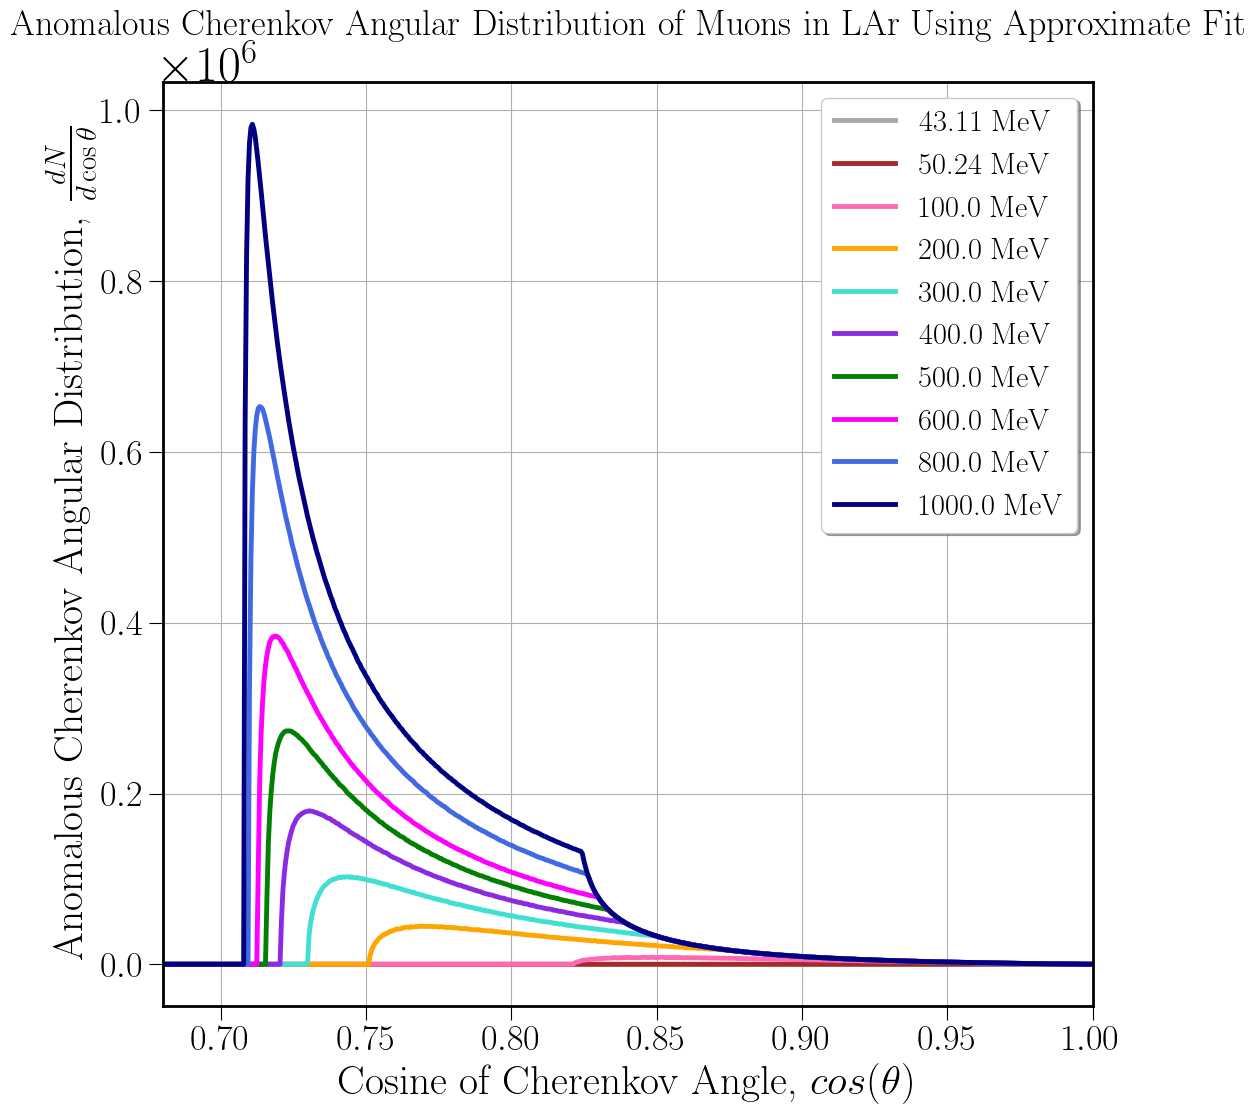

ended:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=24, tm_hour=8, tm_min=4, tm_sec=23, tm_wday=3, tm_yday=298, tm_isdst=0)


In [198]:
############ RUN THE FUNCTION ###################Anomalous AD####

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
 
# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

get_cerenkov(x=0,dx=0.01,plotx1=0.68,plotx2=1)

print('ended: ', time.gmtime())

# t_arr = np.array([383.96,400,450,500,550,600,650,700,750,800,812]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = 43.11,50.24,100,200,300,400,500,600,800,1000,1200,1500,1800,2000


In [67]:
#Saving Aprrox data for cone projection

##### OVERAll FUNCTION ###### ########Normal AD####

def get_cerenkov(x=0,dx=0.1,plotx1=0,plotx2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    
    #Scintillation

    cerenkov_allp = [[] for j in t]
    cerenkov_alln = [[] for j in t]
    cerenkov_allt = [[] for j in t]
    scint_all = [[] for j in t]

    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangpsum = [0 for y in x_all]
        cerenkovangnsum = [0 for y in x_all]
        cerenkovangtsum = [0 for y in x_all]

        mybetalist = make_betalistmu(t[j],x,dx)
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1) #asymtotic value of n and 1/beta intersection
            
            def func_angp(x): #Normal AD
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6* (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta) ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + 
                else: 
                    return 0 #To avaid getting negative contribution 
            
            def func_angn(x): #Anomalous AD
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6* (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))))) #+ ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            
            func_angpc = [func_angp(y) for y in x_all]       

            func_angnc = [func_angn(y) for y in x_all]       

            func_angtc = [func_angp(y) + func_angn(y) for y in x_all]   #Total AD    

            cerenkovangpsum = np.add(func_angpc, cerenkovangpsum) 
            cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
            cerenkovangtsum = np.add(func_angtc, cerenkovangtsum) 

#Saving to file: 

        with open('cherenkovadapprox_2000.csv', 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
    
            # write the header
            
            header = ['costheta','Normal_Cherenkov', 'Anomalous_Cherenkov', 'Total_Cherenkov']
            writer.writerow(header)
    
            # write multiple rows 
            writer.writerows([x_all, cerenkovangpsum, cerenkovangnsum, cerenkovangtsum])  #Row wise csv -> mathematica ring plots
            
            # columns_data = zip_longest(*data)
            # writer.writerows(zip_longest(*[x_all, cerenkovangnsumhot, cerenkovangasumhot, cerenkovangtsumhot])) #Column wise csv  
    
        # Choose a filename, ending in .npz
        cerenkovdata2000 = 'cerenkovdataapprox2000.npz'
    
        # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
        np.savez(cerenkovdata2000, costheta=x_all, normal2000=cerenkovangpsum, anomalous2000=cerenkovangnsum, total2000=cerenkovangtsum)
       
            
        cerenkov_allp[j].append(cerenkovangpsum)
        cerenkov_alln[j].append(cerenkovangnsum)
        cerenkov_allt[j].append(cerenkovangtsum)

        # scint_all[j].append(scint)

        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], (sum(cerenkovangtsum) /2000) )) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
    # colors_all = ['black','brown','lime','orchid','darkturquoise','hotpink','teal','firebrick','deepskyblue','green','tomato','navy','purple','red','blueviolet','orange','magenta']
    colors_all = ['darkgrey','brown','hotpink','orange','turquoise','blueviolet','green','magenta','royalblue','navy','purple'] #,'red','blueviolet'
    # colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','olive','dodgerblue','maroon','lime']

    
    for i in range(len(t)):
        
#     def make_plot(x_all,scint,ceren)


#         ax.set_title("Total Angular Distribution of a {} MeV ($\\beta$ = 0.758) Proton in LAr", fontsize= 18) #
        # 
        # func_angt = func_angp + func_angn

        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{R}$")    #func_angp = f(lamd_pterm): Blue plot
        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{L}$")     #func_angp = f(lamd_pterm): Orange plot
        ax.plot(x_all, cerenkov_allt[i][0], lw= 3,label= r"{} MeV".format(t[i]), c=colors_all[i])     #func_angp = f(lamd_pterm): Green plot label='Cerenkov',
        
#         if i==len(t)-1:
            
#             ax.plot(x_all, scint_all[i][0],lw=3, ls= 'dashdot', label=r'Scintillation', c=colors_all[i]) #color='black') #, color= 'g'
        
#         else:
#             ax.plot(x_all, scint_all[i][0],lw=3, ls= 'dashdot', c=colors_all[i]) #color='black') #, color= 'g'

        
#         plt.yscale("log")

    ax.set_title(r"Total Cherenkov AD of Protons in LAr Using Approximate Fit", fontsize= 24)
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos\theta$",fontsize=30)
    ax.set_ylabel(r"Total Cherenkov AD, $(\frac{dN}{d\cos\theta})_T$",fontsize=30)
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=22,length=10)

    # ax.text(0.901,52e4,r'dx={} cm'.format(dx),fontsize=19)
#     ax.text(0.901,28e5,r'dx={} cm'.format(dx),fontsize=18)
    
    ax.legend(loc='best',fontsize=20,framealpha=None,shadow=True)

        # plt.ylim([0,0.4e13])
        # plt.xlim([0.92,1])
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    plt.xlim(plotx1,plotx2)
    
#     plt.savefig("AD_normal_Cherenkov_P_LAr_dxp1dth2000_383to812MeV.jpg", bbox_inches="tight")
    # plt.savefig("AD_normal_Cherenkov_P_LAr_dxp01dth2000_383to812MeV.jpg", bbox_inches="tight")
#   
    #     plt.savefig("AD_P_LAr_dxp01dth2000_All.jpg", bbox_inches="tight")
    
    plt.show()
    
#     

started:  time.struct_time(tm_year=2023, tm_mon=12, tm_mday=1, tm_hour=13, tm_min=14, tm_sec=38, tm_wday=4, tm_yday=335, tm_isdst=0)


Please enter one or more t-values in MeV, separated by a comma each 2000


Total Cerenkov photons emitted by a 2000.0 Mev Proton in LAr: 513346.999


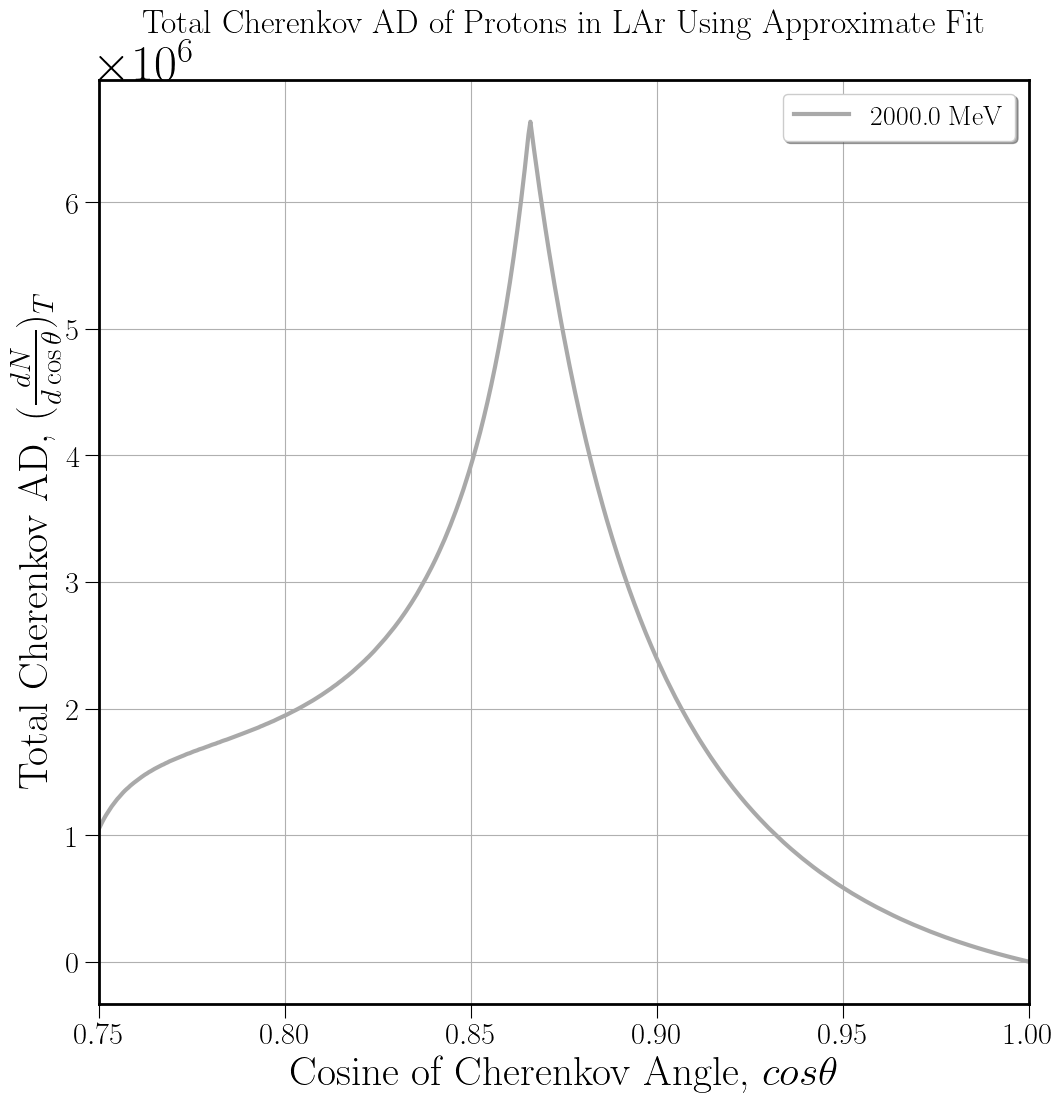

ended:  time.struct_time(tm_year=2023, tm_mon=12, tm_mday=1, tm_hour=14, tm_min=37, tm_sec=10, tm_wday=4, tm_yday=335, tm_isdst=0)


In [68]:
############ RUN THE FUNCTION ###################

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
 
# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

get_cerenkov(x=0,dx=0.01,plotx1=0.65,plotx2=1)

print('ended: ', time.gmtime())

# t_arr = np.array([383.96,400,450,500,550,600,650,700,750,800,812]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# Muon Cherenkov AD Vs Scintillation (Approx Fit)

In [142]:
##### OVERAll FUNCTION ###### ##### Threshold Corrected Version ####### DEFAULT:FINAL

def get_cerenkov(z=0,dz=0.1,plotz1=0,plotz2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    
    alpha = 1/137 #Fine-structure (EM coupling) constant 
    a_0 = 1.18416
    a_pvs = 0.000325985
    gamma = 0.000693652
    n_max = 1.4191220261503081
    lamd_uv = 106.6 

    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    
    #Scintillation 
    cerenkovangtsum = []

    cerenkov_all = [[] for j in t]
    scint_all = [[] for j in t]

    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangsum = [0 for x in x_all]

        mybetalist = make_betalistmu(t[j],z,dz)
#         mybetalist = make_betalist(t[j])

        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

        for b in filtered_betalist: 
            
#             print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#             print("cos ang min: {:.3f}".format((1/(b*n_max)))) #min
#             print("cos ang max: {:.3f}".format((1/(a_0*b))))   #max

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1) #asymtotic value of n and 1/beta intersection

            
# From Babicz: 
#             cos_ang_minb = 0
#             cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

            def func_angt(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6*(((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angt(x) for x in x_all]       
            
            cerenkovangsum = np.add(func_angtc, cerenkovangsum) 
            
        cerenkov_all[j].append(cerenkovangsum)
        scint_all[j].append(scint)

        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dz/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
    colors_all = ['black','lime','orchid','darkturquoise','teal','green','firebrick','deepskyblue','tomato','navy','purple','red','blueviolet','orange','magenta']
#     colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','deepskyblue','olive'] #
    
    
#     for k in range(len(cerenkov_all)):
#         ax[0].plot(x_all, cerenkov_all[k][0]+scint_all[k][0],label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.errorbar(x_all,  cerenkov_all[k][0]+scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]),label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
#         print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
# #         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#         ax[1].plot(x_all,np.sqrt(scint_all[k][0]),c=colors_all[k])

    
    
    
    for i in range(len(t)):
        
#     def make_plot(x_all,scint,ceren)


#         ax.set_title("Total Angular Distribution of a {} MeV ($\\beta$ = 0.758) Proton in LAr", fontsize= 18) #
        # 
        # func_angt = func_angp + func_angn

        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{R}$")    #func_angp = f(lamd_pterm): Blue plot
        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{L}$")     #func_angp = f(lamd_pterm): Orange plot
        ax.plot(x_all, cerenkov_all[i][0], lw= 3.5, label= r"{} MeV".format(t[i]), c=colors_all[i])     #func_angp = f(lamd_pterm): Green plot label='Cerenkov',
        
        if i==len(t)-1:
            
            ax.plot(x_all, scint_all[i][0],lw=3,  label=r'Scintillation', color=colors_all[i]) #, color= 'g'
        
        else:
            ax.plot(x_all, scint_all[i][0],lw=3, color=colors_all[i]) #, color= 'g'

        
        plt.yscale("log")

    ax.set_title(r"Comparison of Cherenkov AD of Muons in LAr with Scintillation Using Approximate Fit", fontsize= 19)
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
    ax.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=22,length=10)

    # ax.text(0.96,1.5e2,r'dz={} cm'.format(dz),fontsize=18)
    ax.legend(loc='best',fontsize=18,framealpha=None,shadow=True)

        # plt.ylim([0,0.4e13])
#         plt.xlim([0.92,1])
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    plt.xlim(plotz1,plotz2)
    
    # plt.savefig("AD_comparison_Mu_LAr_dxp1dth2000_approx_allnew_logplot2.jpg", bbox_inches="tight")
    # plt.savefig("AD_comparison_Mu_LAr_dxp1dth2000_approx_allnew_normalplot.jpg", bbox_inches="tight")
    # plt.savefig("AD_comparison_P_LAr_dxp1dth2000_2000to3000_logplot.jpg", bbox_inches="tight")
#     plt.savefig("AD_comparison__P_LAr_dxp01dth2000_allnew.jpg", bbox_inches="tight")
    
    plt.show()
    
    

started:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=22, tm_hour=8, tm_min=18, tm_sec=51, tm_wday=1, tm_yday=296, tm_isdst=0)


Please enter one or more t-values in MeV, separated by a comma each 43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000


Total Cerenkov photons emitted by a 43.11 Mev Muon in LAr: 0.000
Total Cerenkov photons emitted by a 50.24 Mev Muon in LAr: 22.616
Total Cerenkov photons emitted by a 100.0 Mev Muon in LAr: 5203.851
Total Cerenkov photons emitted by a 200.0 Mev Muon in LAr: 44996.875
Total Cerenkov photons emitted by a 300.0 Mev Muon in LAr: 98805.223
Total Cerenkov photons emitted by a 385.0 Mev Muon in LAr: 147947.958
Total Cerenkov photons emitted by a 400.0 Mev Muon in LAr: 156825.509
Total Cerenkov photons emitted by a 500.0 Mev Muon in LAr: 216161.906
Total Cerenkov photons emitted by a 600.0 Mev Muon in LAr: 275738.182
Total Cerenkov photons emitted by a 700.0 Mev Muon in LAr: 335088.866
Total Cerenkov photons emitted by a 800.0 Mev Muon in LAr: 394226.343
Total Cerenkov photons emitted by a 900.0 Mev Muon in LAr: 452742.561
Total Cerenkov photons emitted by a 1000.0 Mev Muon in LAr: 510822.897


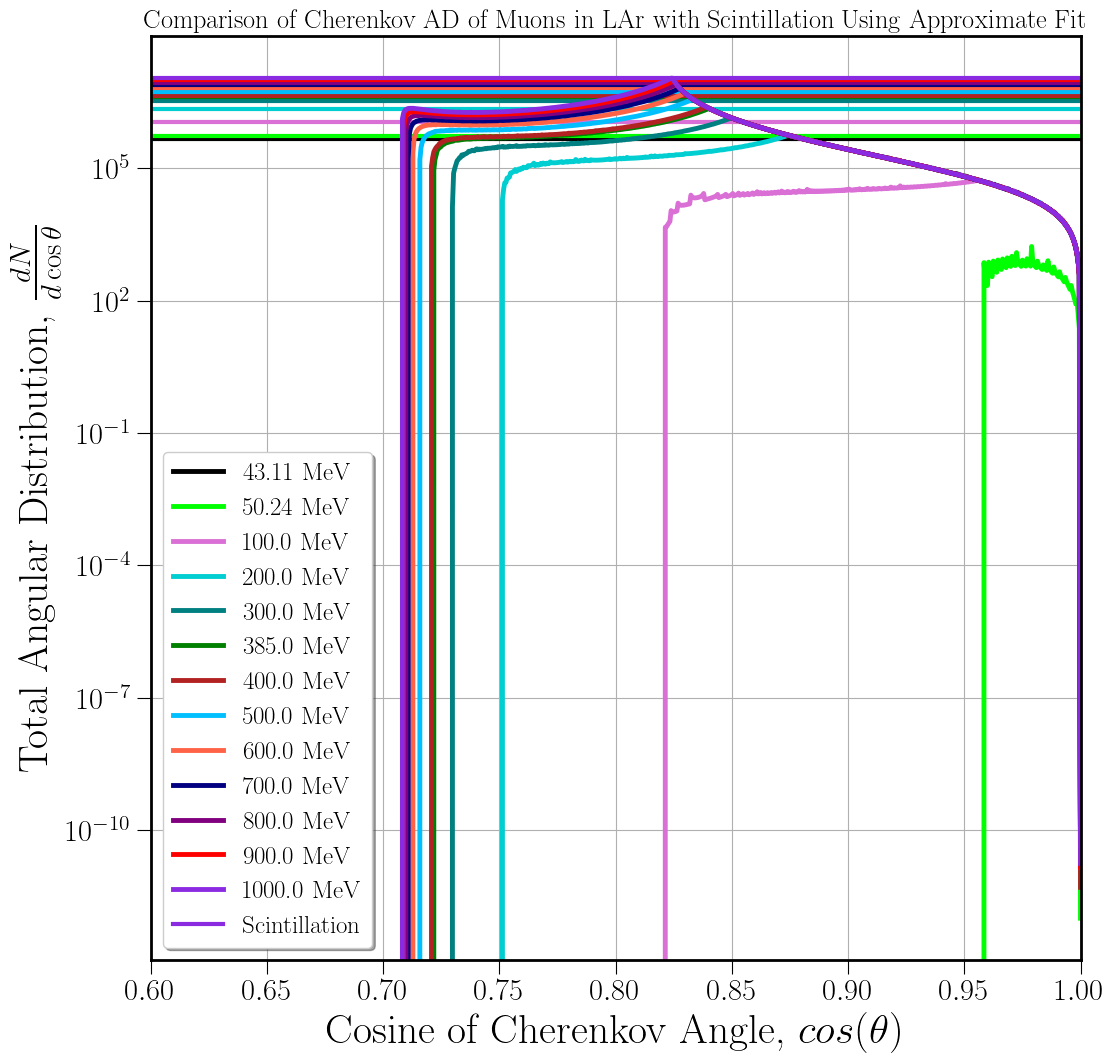

ended:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=22, tm_hour=8, tm_min=25, tm_sec=9, tm_wday=1, tm_yday=296, tm_isdst=0)


In [141]:
############ RUN THE FUNCTION ###################Total AD####

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000 

# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

get_cerenkov(z=0,dz=0.1,plotz1=0.6,plotz2=1)

print('ended: ', time.gmtime())

# t_arr = np.array([383.96,400,450,500,550,600,650,700,750,800,813,814,820,850,900,1000,1050,1100,1200,1300,1400,1500,1600])  #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([383.96,400,450,500,550,600,650,700,750,800,900,1000] #,1200,1300,1400,1500,1600])  #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500])

started:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=22, tm_hour=8, tm_min=40, tm_sec=38, tm_wday=1, tm_yday=296, tm_isdst=0)


Please enter one or more t-values in MeV, separated by a comma each 43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000


Total Cerenkov photons emitted by a 43.11 Mev Muon in LAr: 0.000
Total Cerenkov photons emitted by a 50.24 Mev Muon in LAr: 22.616
Total Cerenkov photons emitted by a 100.0 Mev Muon in LAr: 5203.851
Total Cerenkov photons emitted by a 200.0 Mev Muon in LAr: 44996.875
Total Cerenkov photons emitted by a 300.0 Mev Muon in LAr: 98805.223
Total Cerenkov photons emitted by a 385.0 Mev Muon in LAr: 147947.958
Total Cerenkov photons emitted by a 400.0 Mev Muon in LAr: 156825.509
Total Cerenkov photons emitted by a 500.0 Mev Muon in LAr: 216161.906
Total Cerenkov photons emitted by a 600.0 Mev Muon in LAr: 275738.182
Total Cerenkov photons emitted by a 700.0 Mev Muon in LAr: 335088.866
Total Cerenkov photons emitted by a 800.0 Mev Muon in LAr: 394226.343
Total Cerenkov photons emitted by a 900.0 Mev Muon in LAr: 452742.561
Total Cerenkov photons emitted by a 1000.0 Mev Muon in LAr: 510822.897


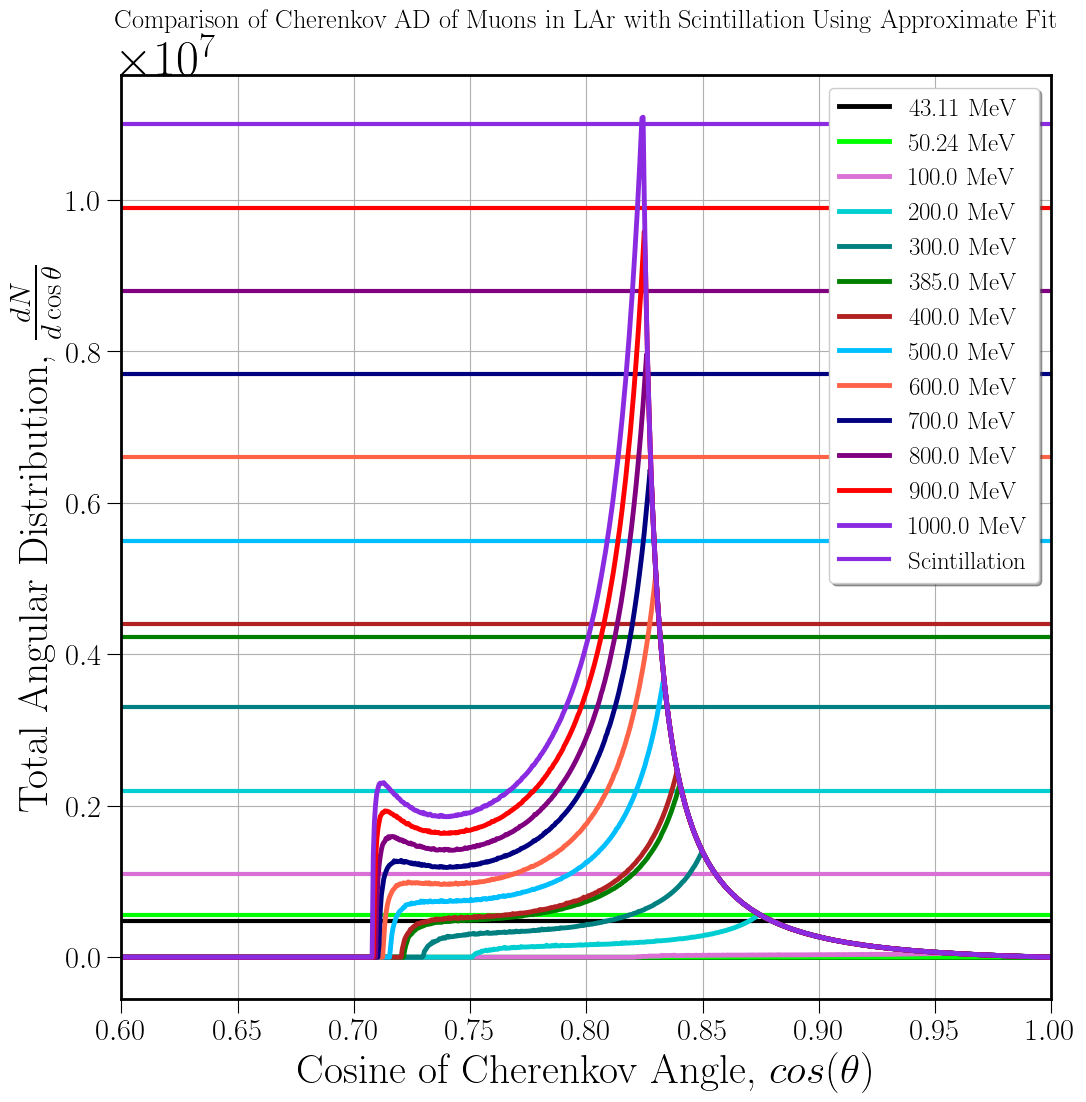

ended:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=22, tm_hour=8, tm_min=47, tm_sec=54, tm_wday=1, tm_yday=296, tm_isdst=0)


In [143]:
############ RUN THE FUNCTION ###################Total AD####

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
 
# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

get_cerenkov(z=0,dz=0.1,plotz1=0.6,plotz2=1)

print('ended: ', time.gmtime())

# t_arr = np.array([900,1000,1050,1100,1200,1300,1400,1500,1600])  #383.96,400,450,500,550,600,650,700,750,800,813,814,820,850,initial  K.E of the proton in MeV 600,700,800,900,1000

In [144]:
##### OVERAll FUNCTION ###### ##### Threshold Corrected Version ####### DEFAULT:FINAL

def get_cerenkov(z=0,dz=0.1,plotz1=0.72,plotz2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    
    alpha = 1/137 #Fine-structure (EM coupling) constant 
    a_0 = 1.18416
    a_pvs = 0.000325985
    gamma = 0.000693652
    n_max = 1.4191220261503081
    lamd_uv = 106.6 

    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    
    #Scintillation 
    cerenkovangtsum = []

    cerenkov_all = [[] for j in t]
    scint_all = [[] for j in t]

    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangsum = [0 for x in x_all]

        mybetalist = make_betalistmu(t[j],z,dz)
#         mybetalist = make_betalist(t[j])

        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

        for b in filtered_betalist: 
            
#             print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#             print("cos ang min: {:.3f}".format((1/(b*n_max)))) #min
#             print("cos ang max: {:.3f}".format((1/(a_0*b))))   #max

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1) #asymtotic value of n and 1/beta intersection

            
# From Babicz: 
#             cos_ang_minb = 0
#             cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

            def func_angt(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6*(((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angt(x) for x in x_all]       
            
            cerenkovangsum = np.add(func_angtc, cerenkovangsum) 
            
        cerenkov_all[j].append(cerenkovangsum)
        scint_all[j].append(scint)

        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dz/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
#     colors_all = ['darkgrey','brown','hotpink','orange','turquoise','blueviolet','green','magenta','royalblue','navy','purple'] #,'red','blueviolet'
#     colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue'] #,'red','blueviolet'
    colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','deepskyblue','olive'] #
    
    
#     for k in range(len(cerenkov_all)):
#         ax[0].plot(x_all, cerenkov_all[k][0]+scint_all[k][0],label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.errorbar(x_all,  cerenkov_all[k][0]+scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]),label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
#         print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
# #         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#         ax[1].plot(x_all,np.sqrt(scint_all[k][0]),c=colors_all[k])

    
    
    
    for i in range(len(t)):
        
#     def make_plot(x_all,scint,ceren)


#         ax.set_title("Total Angular Distribution of a {} MeV ($\\beta$ = 0.758) Proton in LAr", fontsize= 18) #
        # 
        # func_angt = func_angp + func_angn

        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{R}$")    #func_angp = f(lamd_pterm): Blue plot
        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{L}$")     #func_angp = f(lamd_pterm): Orange plot
        ax.plot(x_all, cerenkov_all[i][0], lw= 3,label= r"{} MeV".format(t[i]), c=colors_all[i])     #func_angp = f(lamd_pterm): Green plot label='Cerenkov',
        
        if i==len(t)-1:
            
            ax.plot(x_all, scint_all[i][0],lw=3,  label=r'Scintillation', color='black') #, color= 'g'
        
        else:
            ax.plot(x_all, scint_all[i][0],lw=3, color='black') #, color= 'g'

        
        plt.yscale("log")

    ax.set_title(r"Comparison of Cherenkov Angular Distribution of Muons in LAr with Scintillation", fontsize= 19)
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=28)
    ax.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=28)
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=22,length=10)

    # ax.text(0.96,1e2,r'dz={} cm'.format(dz),fontsize=16)
    ax.legend(loc='best',fontsize=14,framealpha=None,shadow=True)

        # plt.ylim([0,0.4e13])
        # plt.xlim([0.92,1])
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    plt.xlim(plotz1,plotz2)
    
    plt.savefig("AD_comparison_Muon_LAr_dxp1dth2000_allnewblack_normalplot.jpg", bbox_inches="tight")
#     plt.savefig("AD_comparison__P_LAr_dxp01dth2000_allnew.jpg", bbox_inches="tight")
    
    plt.show()
    
    

started:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=22, tm_hour=8, tm_min=55, tm_sec=18, tm_wday=1, tm_yday=296, tm_isdst=0)


Please enter one or more t-values in MeV, separated by a comma each 43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000


Total Cerenkov photons emitted by a 43.11 Mev Proton in LAr: 0.000
Total Cerenkov photons emitted by a 50.24 Mev Proton in LAr: 22.616
Total Cerenkov photons emitted by a 100.0 Mev Proton in LAr: 5203.851
Total Cerenkov photons emitted by a 200.0 Mev Proton in LAr: 44996.875
Total Cerenkov photons emitted by a 300.0 Mev Proton in LAr: 98805.223
Total Cerenkov photons emitted by a 385.0 Mev Proton in LAr: 147947.958
Total Cerenkov photons emitted by a 400.0 Mev Proton in LAr: 156825.509
Total Cerenkov photons emitted by a 500.0 Mev Proton in LAr: 216161.906
Total Cerenkov photons emitted by a 600.0 Mev Proton in LAr: 275738.182
Total Cerenkov photons emitted by a 700.0 Mev Proton in LAr: 335088.866
Total Cerenkov photons emitted by a 800.0 Mev Proton in LAr: 394226.343
Total Cerenkov photons emitted by a 900.0 Mev Proton in LAr: 452742.561
Total Cerenkov photons emitted by a 1000.0 Mev Proton in LAr: 510822.897


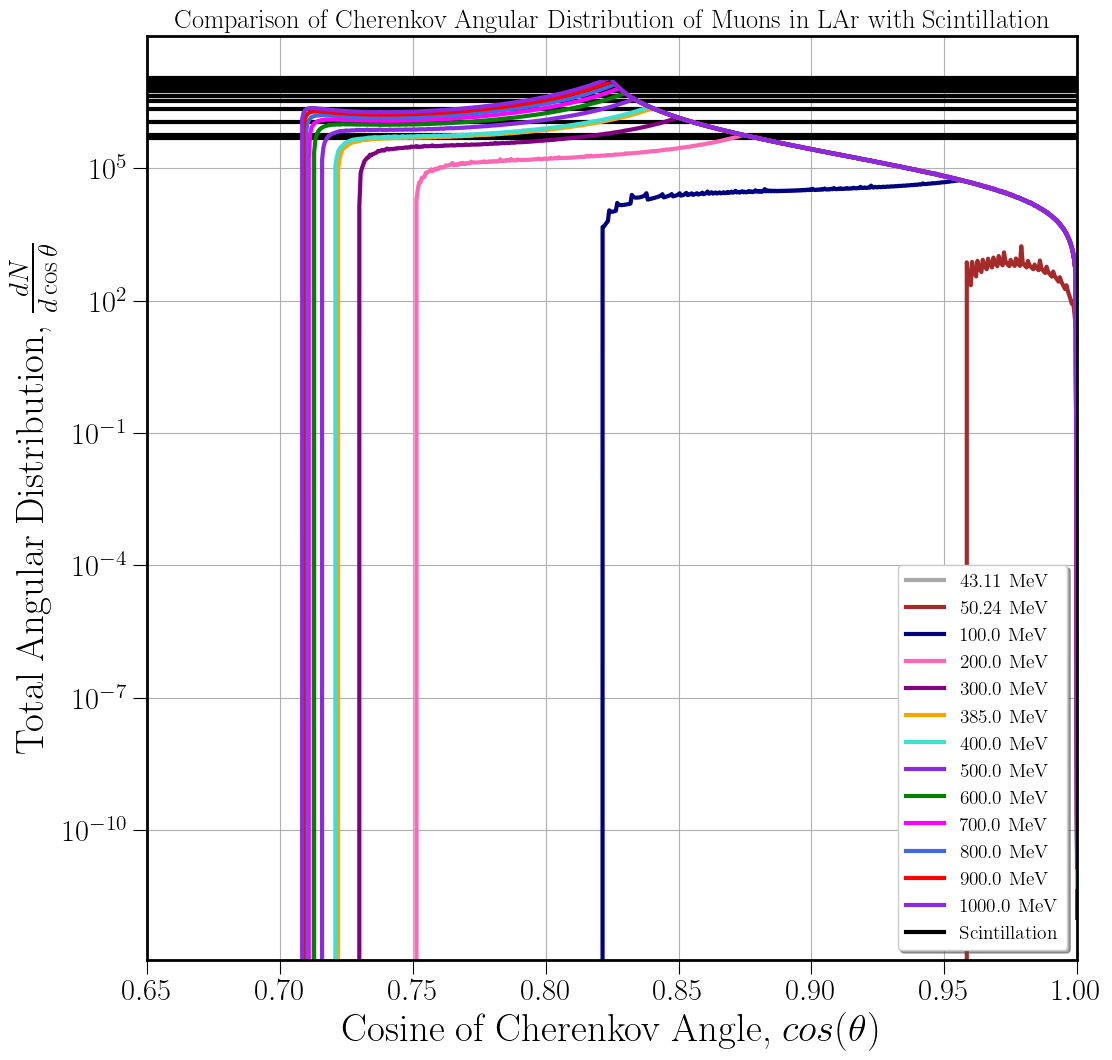

ended:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=22, tm_hour=9, tm_min=2, tm_sec=5, tm_wday=1, tm_yday=296, tm_isdst=0)


In [145]:
############ RUN THE FUNCTION ###################Total AD####

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
 
# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

get_cerenkov(z=0,dz=0.1,plotz1=0.65,plotz2=1)

print('ended: ', time.gmtime())

# t = np.array([43.11,50.24,100,200,300,385,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000 
# t_arr = np.array([383.96,400,450,500,550,600,650,700,750,800,813,814,820,850,900,950,1000])  #initial  K.E of the proton in MeV 600,700,800,900,1000

In [199]:
##### OVERAll FUNCTION ###### ##### Threshold Corrected Version ####### DEFAULT:FINAL

def get_cerenkov(z=0,dz=0.1,plotz1=0,plotz2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    
    alpha = 1/137 #Fine-structure (EM coupling) constant 
    a_0 = 1.18416
    a_pvs = 0.000325985
    gamma = 0.000693652
    n_max = 1.4191220261503081
    lamd_uv = 106.6 

    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    
    #Scintillation 
    cerenkovangtsum = []

    cerenkov_all = [[] for j in t]
    scint_all = [[] for j in t]

    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangsum = [0 for x in x_all]

        mybetalist = make_betalistmu(t[j],z,dz)
#         mybetalist = make_betalist(t[j])

        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

        for b in filtered_betalist: 
            
#             print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#             print("cos ang min: {:.3f}".format((1/(b*n_max)))) #min
#             print("cos ang max: {:.3f}".format((1/(a_0*b))))   #max

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1) #asymtotic value of n and 1/beta intersection

            
# From Babicz: 
#             cos_ang_minb = 0
#             cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

            def func_angt(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return 2*pi*1e6*(((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angt(x) for x in x_all]       
            
            cerenkovangsum = np.add(func_angtc, cerenkovangsum) 
            
        cerenkov_all[j].append(cerenkovangsum)
        scint_all[j].append(scint)

        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dz/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
    colors_all = ['black','brown','lime','orchid','darkturquoise','hotpink','teal','firebrick','deepskyblue','green','tomato','navy','purple','red','blueviolet','orange','magenta']
#     colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','deepskyblue','olive'] #
    
    
#     for k in range(len(cerenkov_all)):
#         ax[0].plot(x_all, cerenkov_all[k][0]+scint_all[k][0],label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.errorbar(x_all,  cerenkov_all[k][0]+scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]),label='t = {} MeV'.format(float(t[k])),c=colors_all[k])
# #         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
#         print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
# #         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#         ax[1].plot(x_all,np.sqrt(scint_all[k][0]),c=colors_all[k])

    
    
    
    for i in range(len(t)):
        
#     def make_plot(x_all,scint,ceren)


#         ax.set_title("Total Angular Distribution of a {} MeV ($\\beta$ = 0.758) Proton in LAr", fontsize= 18) #
        # 
        # func_angt = func_angp + func_angn

        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{R}$")    #func_angp = f(lamd_pterm): Blue plot
        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{L}$")     #func_angp = f(lamd_pterm): Orange plot
        ax.plot(x_all, cerenkov_all[i][0], lw= 3.5, label= r"{} MeV".format(t[i]), c=colors_all[i])     #func_angp = f(lamd_pterm): Green plot label='Cerenkov',
        
        if i==len(t)-1:
            
            ax.plot(x_all, scint_all[i][0],lw=3,  label=r'Scintillation', color=colors_all[i]) #, color= 'g'
        
        else:
            ax.plot(x_all, scint_all[i][0],lw=3, color=colors_all[i]) #, color= 'g'

        
        plt.yscale("log")

    ax.set_title(r"Comparison of Cherenkov AD of Muons in LAr with Scintillation Using Approximate Fit", fontsize= 19)
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
    ax.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=22,length=10)

    # ax.text(0.96,1.5e2,r'dz={} cm'.format(dz),fontsize=18)
    ax.legend(loc='best',fontsize=18,framealpha=None,shadow=True)

        # plt.ylim([0,0.4e13])
#         plt.xlim([0.92,1])
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    plt.xlim(plotz1,plotz2)
    
    plt.savefig("AD_comparison_Mu_LAr_dxp1dth2000_approx_allnew_logplot3.jpg", bbox_inches="tight")
    # plt.savefig("AD_comparison_Mu_LAr_dxp1dth2000_approx_allnew_normalplot.jpg", bbox_inches="tight")
    # plt.savefig("AD_comparison_P_LAr_dxp1dth2000_2000to3000_logplot.jpg", bbox_inches="tight")
#     plt.savefig("AD_comparison__P_LAr_dxp01dth2000_allnew.jpg", bbox_inches="tight")
    
    plt.show()
    
    

started:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=24, tm_hour=8, tm_min=58, tm_sec=40, tm_wday=3, tm_yday=298, tm_isdst=0)


Please enter one or more t-values in MeV, separated by a comma each 43.11,50.24,100,200,300,400,500,600,800,1000,1200,1500,1800,2000


Total Cerenkov photons emitted by a 43.11 Mev Muon in LAr: 0.000
Total Cerenkov photons emitted by a 50.24 Mev Muon in LAr: 22.616
Total Cerenkov photons emitted by a 100.0 Mev Muon in LAr: 5203.851
Total Cerenkov photons emitted by a 200.0 Mev Muon in LAr: 44996.875
Total Cerenkov photons emitted by a 300.0 Mev Muon in LAr: 98805.223
Total Cerenkov photons emitted by a 400.0 Mev Muon in LAr: 156825.509
Total Cerenkov photons emitted by a 500.0 Mev Muon in LAr: 216161.906
Total Cerenkov photons emitted by a 600.0 Mev Muon in LAr: 275738.182
Total Cerenkov photons emitted by a 800.0 Mev Muon in LAr: 394226.343
Total Cerenkov photons emitted by a 1000.0 Mev Muon in LAr: 510822.897
Total Cerenkov photons emitted by a 1200.0 Mev Muon in LAr: 625663.319
Total Cerenkov photons emitted by a 1500.0 Mev Muon in LAr: 795021.010
Total Cerenkov photons emitted by a 1800.0 Mev Muon in LAr: 960639.389
Total Cerenkov photons emitted by a 2000.0 Mev Muon in LAr: 1069196.050


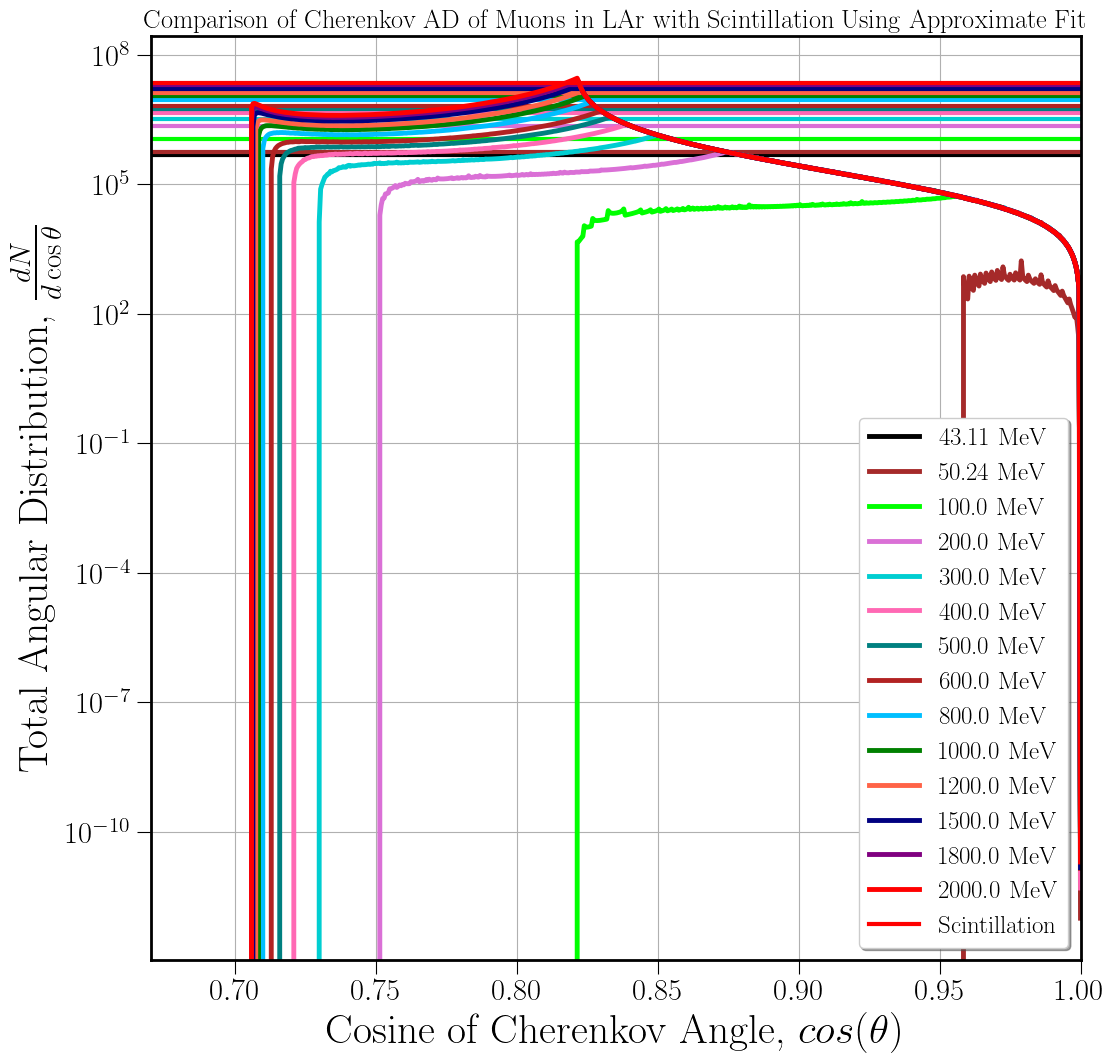

ended:  time.struct_time(tm_year=2024, tm_mon=10, tm_mday=24, tm_hour=9, tm_min=12, tm_sec=21, tm_wday=3, tm_yday=298, tm_isdst=0)


In [200]:
############ RUN THE FUNCTION ###################

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
 
# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

get_cerenkov(z=0,dz=0.1,plotz1=0.67,plotz2=1)

print('ended: ', time.gmtime())

# t = 43.11,50.24,100,200,300,400,500,600,800,1000,1200,1500,1800,2000
# t_arr = np.array([383.96,400,450,500,550,600,650,700,750,800,812]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000


# Muon Sigma Plot (All Fits)

In [63]:
#Calculating Betalist for muons with different K.E.

#Parameters

rho = 1.38 #density of LAr in kg/m^3 at 89K temperature  
me = 9.11e-31 #Electron's mass in Kg.
io = 23.6e-6  #Average Ionization Potential of LAr in MeV
k =  0.307  #Constant in MeV.cm^2/g 
zb = 18  #Atomic No of Ar (absorber)
a = 39.948  #Mass no of Ar (absorber)
zs = -1 #charge of the particle 
c = 3e8
e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Mass of the particle travelling
# mp = 938 #Proton's mass
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

k1 = k*rho*zb*zs**2/a
k2 = 2*e/io 

alpha = 1/137 #Fine-structure (EM coupling) constant 


# lamd = np.linspace(100,200,925)   #wavelength of light 


#Defining a function to calculate the betalist for some given initial K.E of Proton in LAr
#Calculating range of Muons with different initial KE travelling in LAr:

# mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²
t_arr = np.array([0,148.8,155.9,200,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,500,600,700,800,900,1000,1200,1500,1800,2000]) #initial  K.E of the proton in MeV 0,148.8,155.9,200,300,


#def make_first_list(t):


def make_betalistmu(t,x,dx):
    ''' t = t_list input from data'''
    
    
    xlist = []
    tlist = [] 
    tslope = []
    betalist = []
    
#     x = 0 #in cm 
#     dx = 0.01 #in cm 
    
    while t>0: 
        
        betam  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
        t_slope = (((k1*np.log(k2*(betam**2/(1-betam**2))))/betam**2) - k1)
        t = t - (t_slope * dx)
        tslope.append(t_slope)
        tlist.append(t)
        betalist.append(betam)

        x=x+dx    
        xlist.append(x)
        
#       print(t, beta, xlist)
         
    #Linear Interpolation: 

    if (len(tlist)>1)  and (len(xlist)>1):
    
        tnp1 = tlist[-1]
        tnp2 = tlist[-2]
        xnp1 = xlist[-1]
        xnp2 = xlist[-2]
        
        rang = xnp2 - (tnp2 * ((xnp1-xnp2)/(tnp1 - tnp2))) #Range of Proton: Relativistic approach 
#         print(betalist)
        
        return betalist  #range


betalist_50 = make_betalistmu(50,0,0.1)
print(betalist_50)

[0.7343351229183378, 0.7328593481721767, 0.7313650605139412, 0.7298518419489141, 0.7283192602186594, 0.7267668681398994, 0.7251942029043774, 0.7236007853368999, 0.7219861191085044, 0.7203496899014423, 0.7186909645223678, 0.7170093899598134, 0.7153043923816709, 0.713575376068012, 0.7118217222741527, 0.7100427880183809, 0.7082379047882511, 0.706406377158746, 0.7045474813149655, 0.7026604634712684, 0.700744538177984, 0.6987988865059025, 0.6968226540977422, 0.6948149490746541, 0.6927748397845483, 0.6907013523775969, 0.68859346819265, 0.6864501209364811, 0.6842701936357191, 0.6820525153389883, 0.6797958575441337, 0.6774989303223888, 0.6751603781079198, 0.672778775117243, 0.6703526203585345, 0.6678803321856788, 0.6653602423459828, 0.662790589463624, 0.6601695118929891, 0.6574950398668709, 0.654765086853804, 0.6519774400263562, 0.6491297497275909, 0.6462195178057916, 0.6432440846673423, 0.640200614873795, 0.637086081080829, 0.6338972460830655, 0.6306306426883508, 0.6272825510966464, 0.6238489

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


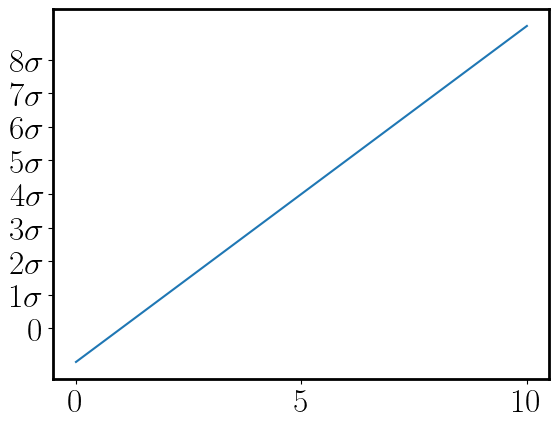

In [29]:
#Trial Method
# plt.plot()
fig, ax2 = plt.subplots()
ax2.plot([0,10], [0, 10])
scintp = 1
sigma_val = np.sqrt(scintp)
y_max = 10
new_yticks = np.arange(scintp, y_max, sigma_val)
new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(i) for i in range(1, len(new_yticks))])))
ax2.set_yticks(new_yticks, labels=new_ytick_labels)

print(ax2.get_yticks())
print(new_yticks)

In [125]:
# Muon AD (sigma plot) Data Saving Version for PID

#TeX up labels and text: 

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Angular Distribution of Cerenkov Radiation for a 50 MeV Muon: Approx fit (OVERALL FUNCTION)

alpha = 1/137 #Fine-structure (EM coupling) constant 

lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 115.11 #where n is max 

# #Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# #Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Approx Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
# x_all = np.linspace(0, 1, 2000)
x_all = np.cos(theta)
print(x_all)
# dx = 0.1
# z = np.cos(theta)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd = np.linspace(90,700,2000)

n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf


print("n_uv = {}, n_peak = {}, n_500= {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []


# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([200]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# Choose a filename, ending in .npz

# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu200_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu300_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu400_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu500_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu600_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu700_ho.npz'


# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu200_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu300_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu400_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu500_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu600_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu700_babicz.npz'


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalistmu(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 *(dx/0.1)* ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * (dx/0.1)* ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchon = [func_angn(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhon = np.add(func_angchon, cerenkovangsumhon)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
            np.savez(filename1, theta=theta, costheta=x_all, totalho=cerenkovangsumhot, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, scint=scint) #ke=t_arr, 

        
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from HO Model fit: {:.3f}" .format(t[j], sum(cerenkovangsumhot)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        

        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtmu(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtmu(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Approx fit: {:.3f}" .format(t[j], sum(cerenkovangsump)/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from Grace fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumg)/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (dx/0.1)* (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb)

            np.savez(filename2, theta=theta, costheta=x_all, totalb=cerenkovangsumb, scint=scint) #ke=t_arr, #Save data to .npz file

            
            
#         print(np.shape(cerenkovangsum))
        
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Babicz fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumb)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
#     ax = fig.add_subplot(111)
    
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()

 
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 200 MeV Muon in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$', fontsize=30, color='g')
    ax3.set_xlabel(r'$\theta (^{\circ})$', fontsize=30, color='b')
    
#     # get left axis limits
#     ymin, ymax = ax1.get_ylim()
# # apply function and set transformed values to right axis limits
#     ax2.set_ylim((T_f(ymin),T_f(ymax)))
# # set an invisible artist to twin axes 
# # to prevent falling back to initial values on rescale events
#     ax2.plot([],[])

# plt.show()

    ax2.grid()
    ax3.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax3.tick_params(axis='both',which='major',labelsize=20,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['purple','cadetblue','tomato','dimgray'] 
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #50 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #100 MeV
    colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #200 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #300 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #400 MeV 'brown','purple'
    # colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #500 MeV   
    # colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1000 MeV   
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    # 
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, cerenkov_allb[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashdot', label='Babicz',c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k]))
        ax1.plot(x_all, cerenkov_allg[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashed', label='Grace',c=colors_all[k+1]) #linewidth= 4,
        ax1.plot(x_all, cerenkov_allp[k][0]+scint_all[k][0]/2, linewidth= 4.5, label='This Work (Approx Fit)', c=colors_all[k+2])
        ax1.plot(x_all, (cerenkov_allhot[k][0]+scint_all[k][0]/2), linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO #(dx/0.1)*
        # plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
#         plt.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#     ax1.set_ylim(-0.26,0.26)
#     ax2.set_ylim(4521000,4540000)   #411 MeV: scintp=4521000.0 , sigma= 2126.264329757709

    
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     ax2.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)


    # Set up the right side of the plot with sigma values
    y_ticks = ax1.get_yticks()  # Gets a list of y-axis tick values on the right side
    y_min, y_max = ax1.get_ylim()
    ax2.set_ylim(y_min, y_max)
    sigma_val = np.sqrt(scintp/2)  # Get standard deviation 
    # new_yticks = np.arange(scintp/2, y_max, sigma_val)
    # new_yticks = np.arange(scintp/2, y_max, 5*sigma_val)
    # new_yticks = np.arange(scintp/2, y_max, 10*sigma_val)
    new_yticks = np.arange(scintp/2, y_max, 50*sigma_val)
    # new_yticks = np.arange(scintp/2, y_max, 100*sigma_val)
    # new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(i) for i in range(1, len(new_yticks))])))
    # new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(5*i) for i in range(1, len(new_yticks))])))
    # new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(10*i) for i in range(1, len(new_yticks))])))
    new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(50*i) for i in range(1, len(new_yticks))])))
    # new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(100*i) for i in range(1, len(new_yticks))])))
    ax2.set_yticks(new_yticks, labels=new_ytick_labels)

    # Set up the top side of the plot with angle in degrees
    ax3.set_xlim(plotx1, plotx2)
    new_xticks = np.flip(np.cos(np.arange(np.arccos(plotx2), np.arccos(plotx1), np.pi*10/180)))
    new_xtick_labels = np.flip(np.arange(np.arccos(plotx2)*180/np.pi, np.arccos(plotx1)*180/np.pi, 10)).astype(int)
    ax3.set_xticks(new_xticks, labels=new_xtick_labels)

    ax1.set_xlim(plotx1, plotx2)       
    # plt.savefig('signal_over_background_Muon_50MeV_approxfit_dxp001.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_Muon_200MeV_allfits_dxp01.jpg', bbox_inches="tight") #,dpi=200
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))
    plt.show()


[1.00000000e+00 9.99999691e-01 9.99998765e-01 ... 1.57158147e-03
 7.85790978e-04 6.12323400e-17]
n_uv = 1.10232, n_peak = 1.3605, n_500= 1.2278, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=24, tm_hour=2, tm_min=45, tm_sec=21, tm_wday=3, tm_yday=114, tm_isdst=0)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_3068\3143332980.py:204: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_3068\3143332980.py:243: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 200 Mev Muon in LAr from HO Model fit: 47701.406
Total Cerenkov photons emitted by a 200 Mev Muon in LAr using Approx fit: 59618.042


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_3068\3143332980.py:314: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_3068\3143332980.py:314: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/

Total Cerenkov photons emitted by a 200 Mev Muon in LAr from Grace fit: 67035.933
Total Cerenkov photons emitted by a 200 Mev Muon in LAr using Babicz fit: 62102.460
2200000.0 2200000.0


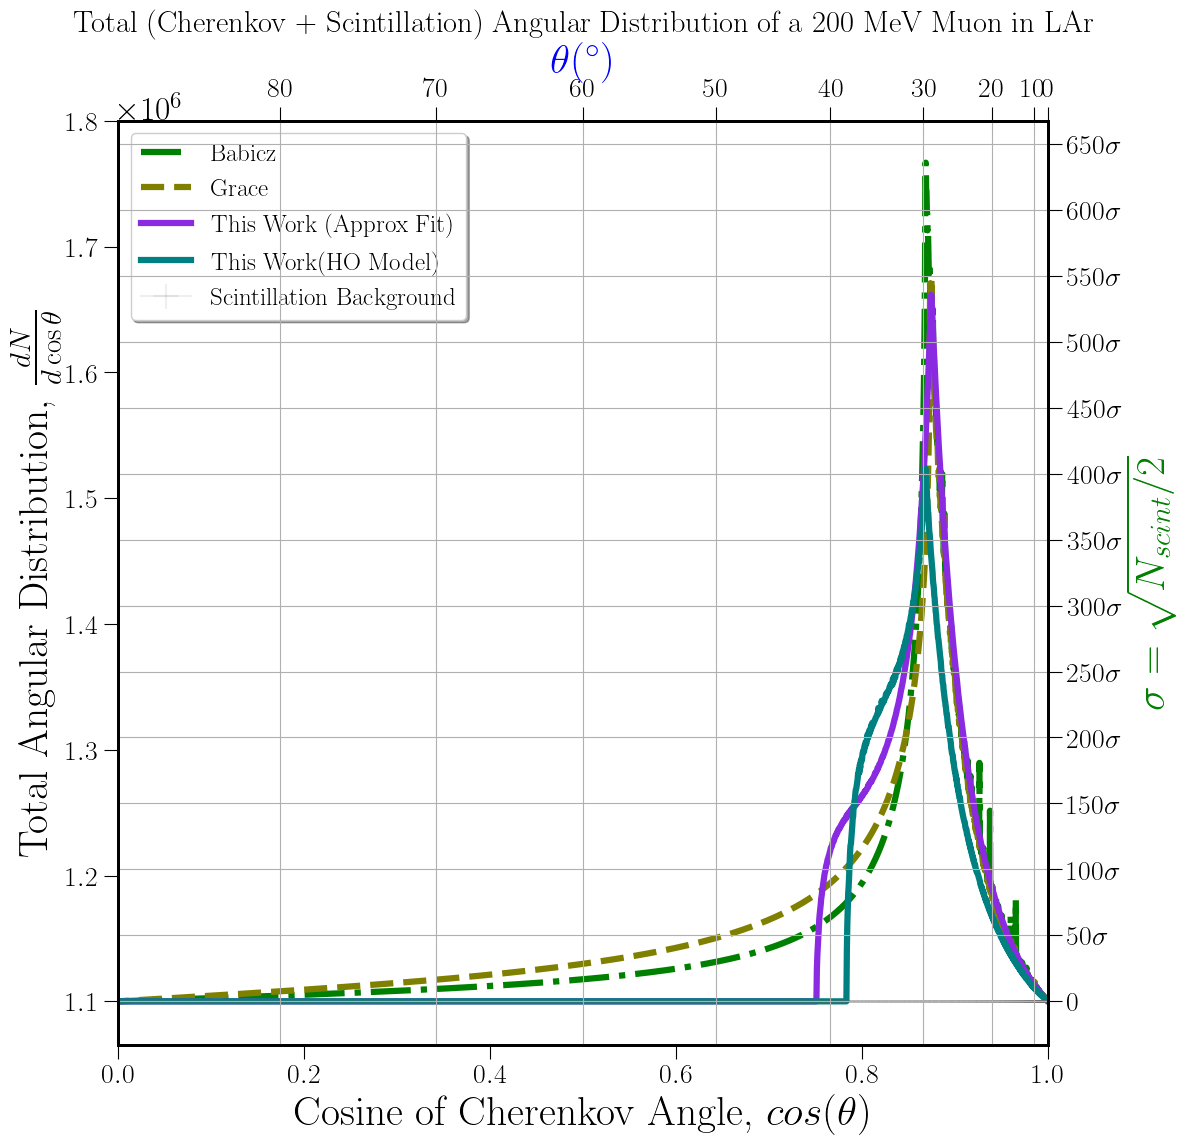

ended:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=24, tm_hour=3, tm_min=53, tm_sec=30, tm_wday=3, tm_yday=114, tm_isdst=0)


In [127]:

################### RUN THE FUNCTION: All Fit

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0, plotx2=1)

print('ended: ', time.gmtime())


['theta', 'costheta', 'totalho', 'normalho', 'anomalousho', 'scint']
['theta', 'costheta', 'totalb', 'scint']


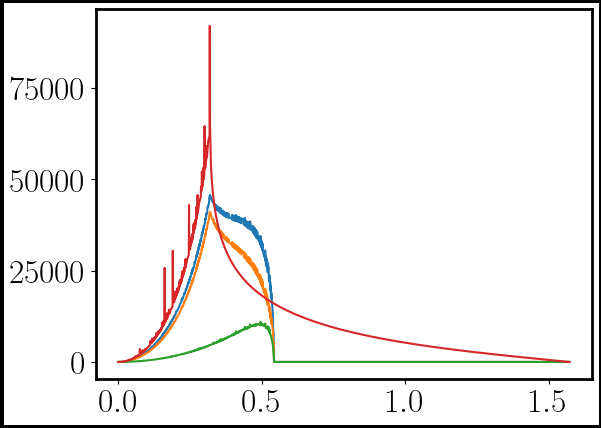

In [102]:
# # Load the saved file
# npzfile = np.load(filename)

# print(npzfile.files) #name of the columns

# # Extract the arrays using the argument names you fed to "np.savez"
# # ke = npzfile['t_arr']
# theta = npzfile['theta']
# costheta = npzfile['costheta']
# totalho = npzfile['totalho']
# normalho = npzfile['normalho']
# anomalousho = npzfile['anomalousho']
# scint = npzfile['scint']

# Load the saved file
npzfile1 = np.load(filename1)
npzfile2 = np.load(filename2)

print(npzfile1.files) #name of the columns
print(npzfile2.files) #name of the columns

# Extract the arrays using the argument names you fed to "np.savez"
# ke = npzfile['t_arr']
theta = npzfile1['theta']
costheta = npzfile1['costheta']
totalho = npzfile1['totalho']
normalho = npzfile1['normalho']
anomalousho = npzfile1['anomalousho']
scint = npzfile1['scint']

totalb = npzfile2['totalb']

# Create the plot using the loaded arrays

fig, axis = plt.subplots(edgecolor='black', linewidth=5)
# axis.plot(costheta, totalho)
axis.plot(theta, totalho)
axis.plot(theta, normalho)
axis.plot(theta, anomalousho)
axis.plot(theta, totalb)
# axis.plot(costheta, scint)
# axis.plot(costheta, totalho+scint)

plt.show()

In [18]:
# Muon AD (sigma plot) Data Saving Version for PID

#TeX up labels and text: 

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Angular Distribution of Cerenkov Radiation for a 50 MeV Muon: Approx fit (OVERALL FUNCTION)

alpha = 1/137 #Fine-structure (EM coupling) constant 

lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 115.11 #where n is max 

# #Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# #Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Approx Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
# x_all = np.cos(theta)
print(x_all)
# dx = 0.1
# z = np.cos(theta)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd = np.linspace(90,700,2000)

n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf


print("n_uv = {}, n_peak = {}, n_500= {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []


# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([50]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# Choose a filename, ending in .npz

# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_ho.npz'

# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_babicz.npz'


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalistmu(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 *(dx/0.1)* ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * (dx/0.1)* ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchon = [func_angn(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhon = np.add(func_angchon, cerenkovangsumhon)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
            # np.savez(filename1, theta=theta, costheta=x_all, totalho=cerenkovangsumhot, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, scint=scint) #ke=t_arr, 

        
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from HO Model fit: {:.3f}" .format(t[j], sum(cerenkovangsumhot)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        

        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtmu(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtmu(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Approx fit: {:.3f}" .format(t[j], sum(cerenkovangsump)/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from Grace fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumg)/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (dx/0.1)* (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb)

            # np.savez(filename2, theta=theta, costheta=x_all, totalb=cerenkovangsumb, scint=scint) #ke=t_arr, #Save data to .npz file

            
            
#         print(np.shape(cerenkovangsum))
        
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Babicz fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumb)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
#     ax = fig.add_subplot(111)
    
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()

 
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 50 MeV Muon in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$', fontsize=30, color='g')
    ax3.set_xlabel(r'$\theta (^{\circ})$', fontsize=30, color='b')
    
#     # get left axis limits
#     ymin, ymax = ax1.get_ylim()
# # apply function and set transformed values to right axis limits
#     ax2.set_ylim((T_f(ymin),T_f(ymax)))
# # set an invisible artist to twin axes 
# # to prevent falling back to initial values on rescale events
#     ax2.plot([],[])

# plt.show()

    ax2.grid()
    ax3.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax3.tick_params(axis='both',which='major',labelsize=20,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['purple','cadetblue','tomato','dimgray'] 
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']

    colors_all = ['lime','crimson','hotpink','green','dimgray'] #50 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #100 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #200 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #300 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #400 MeV 'brown','purple'
    # colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #500 MeV   
    # colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1000 MeV   
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
        
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, cerenkov_allb[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashdot', label='Babicz',c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k]))
        ax1.plot(x_all, cerenkov_allg[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashed', label='Grace',c=colors_all[k+1]) #linewidth= 4,
        ax1.plot(x_all, cerenkov_allp[k][0]+scint_all[k][0]/2, linewidth= 4.5, label='This Work (Approx Fit)', c=colors_all[k+2])
        ax1.plot(x_all, (cerenkov_allhot[k][0]+scint_all[k][0]/2), linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO #(dx/0.1)*
        # plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
#         plt.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#     ax1.set_ylim(-0.26,0.26)
#     ax2.set_ylim(4521000,4540000)   #411 MeV: scintp=4521000.0 , sigma= 2126.264329757709

    
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     ax2.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)


    # Set up the right side of the plot with sigma values
    y_ticks = ax1.get_yticks()  # Gets a list of y-axis tick values on the right side
    y_min, y_max = ax1.get_ylim()
    ax2.set_ylim(y_min, y_max)
    sigma_val = np.sqrt(scintp/2)  # Get standard deviation 
    new_yticks = np.arange(scintp/2, y_max, sigma_val)
    new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(i) for i in range(1, len(new_yticks))])))
    ax2.set_yticks(new_yticks, labels=new_ytick_labels)

    # Set up the top side of the plot with angle in degrees
    ax3.set_xlim(plotx1, plotx2)
    new_xticks = np.flip(np.cos(np.arange(np.arccos(plotx2), np.arccos(plotx1), np.pi*10/180)))
    new_xtick_labels = np.flip(np.arange(np.arccos(plotx2)*180/np.pi, np.arccos(plotx1)*180/np.pi, 10)).astype(int)
    ax3.set_xticks(new_xticks, labels=new_xtick_labels)

    ax1.set_xlim(plotx1, plotx2)
            
    # plt.savefig('signal_over_background_Muon_50MeV_approxfit_dxp001.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_Muon_50MeV_allfits_dxp001.jpg', bbox_inches="tight") #,dpi=200
    plt.show()
#     plt.xlim(0.8,1)

# plt.plot(theta, cerenkovangsum/(2*pi))


[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00]
n_uv = 1.10232, n_peak = 1.3605, n_500= 1.2278, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=25, tm_hour=9, tm_min=26, tm_sec=36, tm_wday=4, tm_yday=115, tm_isdst=0)
Total Cerenkov photons emitted by a 50 Mev Muon in LAr from HO Model fit: 0.000
Total Cerenkov photons emitted by a 50 Mev Muon in LAr using Approx fit: 19.460


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3593357105.py:301: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3593357105.py:301: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1

Total Cerenkov photons emitted by a 50 Mev Muon in LAr from Grace fit: 1416.703
Total Cerenkov photons emitted by a 50 Mev Muon in LAr using Babicz fit: 844.843
550000.0 550000.0


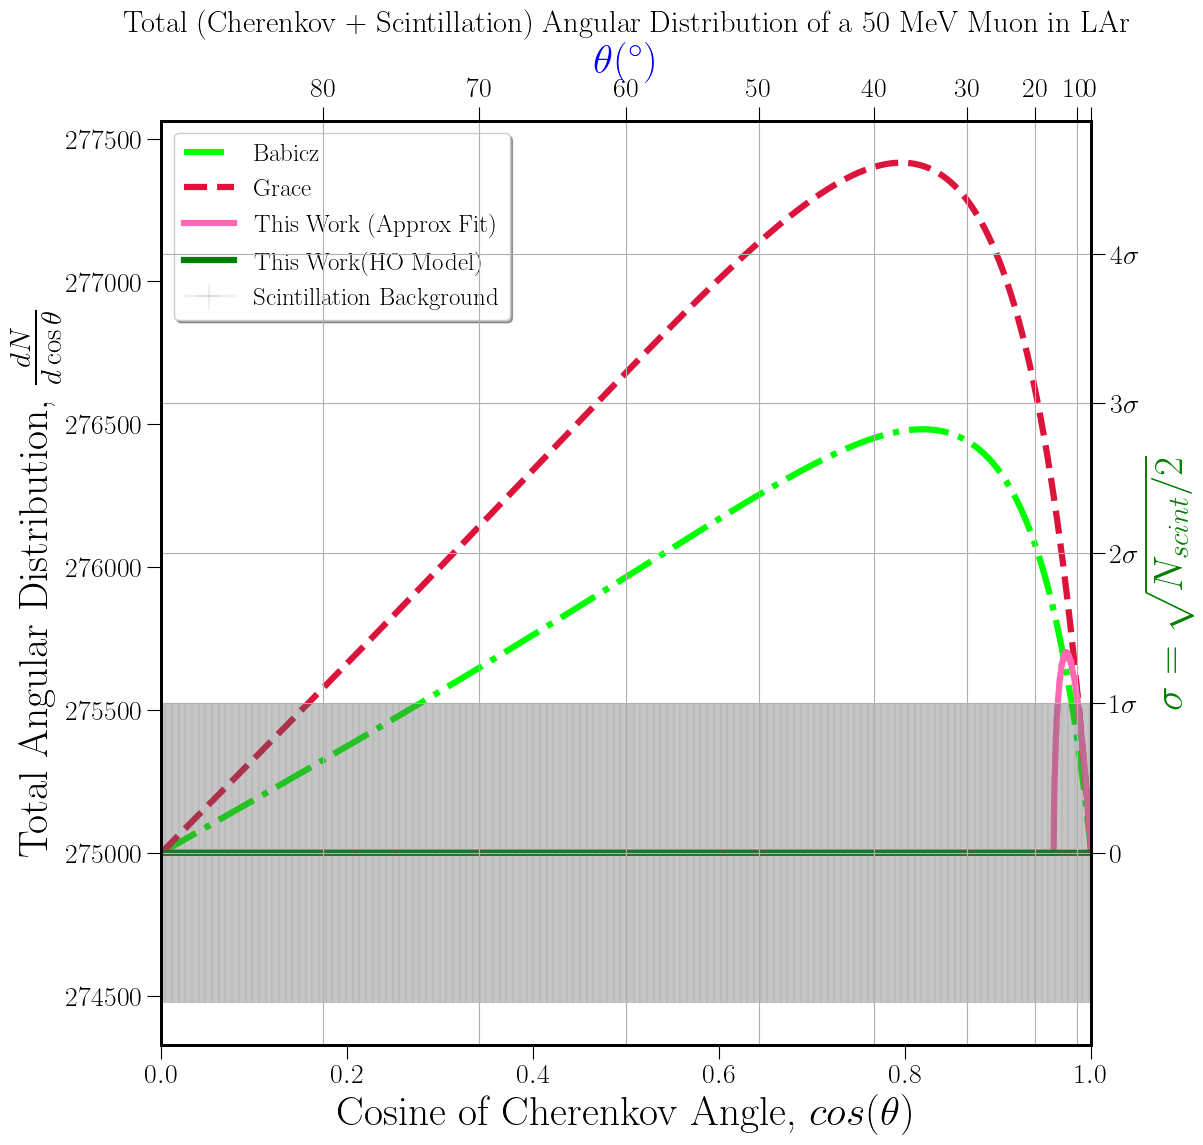

ended:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=25, tm_hour=9, tm_min=44, tm_sec=44, tm_wday=4, tm_yday=115, tm_isdst=0)


In [20]:

################### RUN THE FUNCTION: All Fit

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.001,plotx1=0, plotx2=1)

print('ended: ', time.gmtime())


In [65]:
# Muon AD (sigma plot) Data Saving Version for PID

#TeX up labels and text: 

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Angular Distribution of Cerenkov Radiation for a 50 MeV Muon: Approx fit (OVERALL FUNCTION)

alpha = 1/137 #Fine-structure (EM coupling) constant 

lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 115.11 #where n is max 

# #Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# #Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Approx Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
# x_all = np.cos(theta)
print(x_all)
# dx = 0.1
# z = np.cos(theta)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd = np.linspace(90,700,2000)

n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf


print("n_uv = {}, n_peak = {}, n_500= {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []


# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([100]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# Choose a filename, ending in .npz

# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_ho.npz'

# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_babicz.npz'


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalistmu(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 *(dx/0.1)* ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * (dx/0.1)* ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchon = [func_angn(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhon = np.add(func_angchon, cerenkovangsumhon)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
            # np.savez(filename1, theta=theta, costheta=x_all, totalho=cerenkovangsumhot, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, scint=scint) #ke=t_arr, 

        
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from HO Model fit: {:.3f}" .format(t[j], sum(cerenkovangsumhot)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        

        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtmu(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtmu(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Approx fit: {:.3f}" .format(t[j], sum(cerenkovangsump)/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from Grace fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumg)/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (dx/0.1)* (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb)

            # np.savez(filename2, theta=theta, costheta=x_all, totalb=cerenkovangsumb, scint=scint) #ke=t_arr, #Save data to .npz file

            
            
#         print(np.shape(cerenkovangsum))
        
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Babicz fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumb)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
#     ax = fig.add_subplot(111)
    
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()

 
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 100 MeV Muon in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$', fontsize=30, color='g')
    ax3.set_xlabel(r'$\theta (^{\circ})$', fontsize=30, color='b')
    
#     # get left axis limits
#     ymin, ymax = ax1.get_ylim()
# # apply function and set transformed values to right axis limits
#     ax2.set_ylim((T_f(ymin),T_f(ymax)))
# # set an invisible artist to twin axes 
# # to prevent falling back to initial values on rescale events
#     ax2.plot([],[])

# plt.show()

    ax2.grid()
    ax3.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax3.tick_params(axis='both',which='major',labelsize=20,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['purple','cadetblue','tomato','dimgray'] 
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']

    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #50 MeV
    colors_all = ['red','cyan','deeppink','orange','dimgray'] #100 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #200 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #300 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #400 MeV 'brown','purple'
    # colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #500 MeV   
    # colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1000 MeV   
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
        
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, cerenkov_allb[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashdot', label='Babicz',c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k]))
        ax1.plot(x_all, cerenkov_allg[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashed', label='Grace',c=colors_all[k+1]) #linewidth= 4,
        ax1.plot(x_all, cerenkov_allp[k][0]+scint_all[k][0]/2, linewidth= 4.5, label='This Work (Approx Fit)', c=colors_all[k+2])
        ax1.plot(x_all, (cerenkov_allhot[k][0]+scint_all[k][0]/2), linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO #(dx/0.1)*
        # plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
#         plt.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#     ax1.set_ylim(-0.26,0.26)
#     ax2.set_ylim(4521000,4540000)   #411 MeV: scintp=4521000.0 , sigma= 2126.264329757709

    
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     ax2.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)


    # Set up the right side of the plot with sigma values
    y_ticks = ax1.get_yticks()  # Gets a list of y-axis tick values on the right side
    y_min, y_max = ax1.get_ylim()
    ax2.set_ylim(y_min, y_max)
    sigma_val = np.sqrt(scintp/2)  # Get standard deviation 
    new_yticks = np.arange(scintp/2, y_max, 10*sigma_val)
    new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(10*i) for i in range(1, len(new_yticks))])))
    ax2.set_yticks(new_yticks, labels=new_ytick_labels)

    # Set up the top side of the plot with angle in degrees
    ax3.set_xlim(plotx1, plotx2)
    new_xticks = np.flip(np.cos(np.arange(np.arccos(plotx2), np.arccos(plotx1), np.pi*10/180)))
    new_xtick_labels = np.flip(np.arange(np.arccos(plotx2)*180/np.pi, np.arccos(plotx1)*180/np.pi, 10)).astype(int)
    ax3.set_xticks(new_xticks, labels=new_xtick_labels)

    ax1.set_xlim(plotx1, plotx2)
    # plt.savefig('signal_over_background_Muon_50MeV_approxfit_dxp001.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_Muon_100MeV_allfits_dxp001.jpg', bbox_inches="tight") #,dpi=200
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))
    plt.show()        
    

[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00]
n_uv = 1.10232, n_peak = 1.3605, n_500= 1.2278, n_asymtote = 1.222558964716


In [ ]:

################### RUN THE FUNCTION: All Fit

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.001,plotx1=0, plotx2=1)

print('ended: ', time.gmtime())


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=26, tm_hour=1, tm_min=5, tm_sec=54, tm_wday=5, tm_yday=116, tm_isdst=0)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\1932125443.py:191: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\1932125443.py:230: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 100 Mev Muon in LAr from HO Model fit: 4231.315
Total Cerenkov photons emitted by a 100 Mev Muon in LAr using Approx fit: 5183.831


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\1932125443.py:301: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\1932125443.py:301: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1

In [27]:
# Muon AD (sigma plot) Data Saving Version for PID: 200 MeV

#TeX up labels and text: 

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Angular Distribution of Cerenkov Radiation for a 50 MeV Muon: Approx fit (OVERALL FUNCTION)

alpha = 1/137 #Fine-structure (EM coupling) constant 

lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 115.11 #where n is max 

# #Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# #Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Approx Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
# x_all = np.cos(theta)
print(x_all)
# dx = 0.1
# z = np.cos(theta)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd = np.linspace(90,700,2000)

n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf


print("n_uv = {}, n_peak = {}, n_500= {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []


# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([200]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# Choose a filename, ending in .npz

# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_ho.npz'

# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_babicz.npz'


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalistmu(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 *(dx/0.1)* ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * (dx/0.1)* ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchon = [func_angn(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhon = np.add(func_angchon, cerenkovangsumhon)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
            # np.savez(filename1, theta=theta, costheta=x_all, totalho=cerenkovangsumhot, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, scint=scint) #ke=t_arr, 

        
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from HO Model fit: {:.3f}" .format(t[j], sum(cerenkovangsumhot)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        

        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtmu(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtmu(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Approx fit: {:.3f}" .format(t[j], sum(cerenkovangsump)/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from Grace fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumg)/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (dx/0.1)* (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb)

            # np.savez(filename2, theta=theta, costheta=x_all, totalb=cerenkovangsumb, scint=scint) #ke=t_arr, #Save data to .npz file

            
            
#         print(np.shape(cerenkovangsum))
        
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Babicz fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumb)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
#     ax = fig.add_subplot(111)
    
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()

 
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 200 MeV Muon in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$', fontsize=30, color='g')
    ax3.set_xlabel(r'$\theta (^{\circ})$', fontsize=30, color='b')
    
#     # get left axis limits
#     ymin, ymax = ax1.get_ylim()
# # apply function and set transformed values to right axis limits
#     ax2.set_ylim((T_f(ymin),T_f(ymax)))
# # set an invisible artist to twin axes 
# # to prevent falling back to initial values on rescale events
#     ax2.plot([],[])

# plt.show()

    ax2.grid()
    ax3.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax3.tick_params(axis='both',which='major',labelsize=20,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['purple','cadetblue','tomato','dimgray'] 
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']

    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #50 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #100 MeV
    colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #200 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #300 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #400 MeV 'brown','purple'
    # colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #500 MeV 
    # colors_all = ['purple','red','orange', 'deepskyblue', 'dimgrey'] #800 MeV 
    # colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1000 MeV   
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
        
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, cerenkov_allb[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashdot', label='Babicz',c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k]))
        ax1.plot(x_all, cerenkov_allg[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashed', label='Grace',c=colors_all[k+1]) #linewidth= 4,
        ax1.plot(x_all, cerenkov_allp[k][0]+scint_all[k][0]/2, linewidth= 4.5, label='This Work (Approx Fit)', c=colors_all[k+2])
        ax1.plot(x_all, (cerenkov_allhot[k][0]+scint_all[k][0]/2), linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO #(dx/0.1)*
        # plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
#         plt.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#     ax1.set_ylim(-0.26,0.26)
#     ax2.set_ylim(4521000,4540000)   #411 MeV: scintp=4521000.0 , sigma= 2126.264329757709

    
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     ax2.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)


    # Set up the right side of the plot with sigma values
    y_ticks = ax1.get_yticks()  # Gets a list of y-axis tick values on the right side
    y_min, y_max = ax1.get_ylim()
    ax2.set_ylim(y_min, y_max)
    sigma_val = np.sqrt(scintp/2)  # Get standard deviation 
    new_yticks = np.arange(scintp/2, y_max, 50*sigma_val)
    new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(50*i) for i in range(1, len(new_yticks))])))
    ax2.set_yticks(new_yticks, labels=new_ytick_labels)

    # Set up the top side of the plot with angle in degrees
    ax3.set_xlim(plotx1, plotx2)
    new_xticks = np.flip(np.cos(np.arange(np.arccos(plotx2), np.arccos(plotx1), np.pi*10/180)))
    new_xtick_labels = np.flip(np.arange(np.arccos(plotx2)*180/np.pi, np.arccos(plotx1)*180/np.pi, 10)).astype(int)
    ax3.set_xticks(new_xticks, labels=new_xtick_labels)

    ax1.set_xlim(plotx1, plotx2)
    # plt.savefig('signal_over_background_Muon_50MeV_approxfit_dxp001.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_Muon_200MeV_allfits_dxp001.jpg', bbox_inches="tight") #,dpi=200
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))
    plt.show()        
    

[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00]
n_uv = 1.10232, n_peak = 1.3605, n_500= 1.2278, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=25, tm_hour=10, tm_min=1, tm_sec=43, tm_wday=4, tm_yday=115, tm_isdst=0)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3081114900.py:191: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3081114900.py:230: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 200 Mev Muon in LAr from HO Model fit: 36630.867
Total Cerenkov photons emitted by a 200 Mev Muon in LAr using Approx fit: 45505.033


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3081114900.py:301: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3081114900.py:301: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1

Total Cerenkov photons emitted by a 200 Mev Muon in LAr from Grace fit: 58330.532
Total Cerenkov photons emitted by a 200 Mev Muon in LAr using Babicz fit: 50967.964
2200000.0 2200000.0


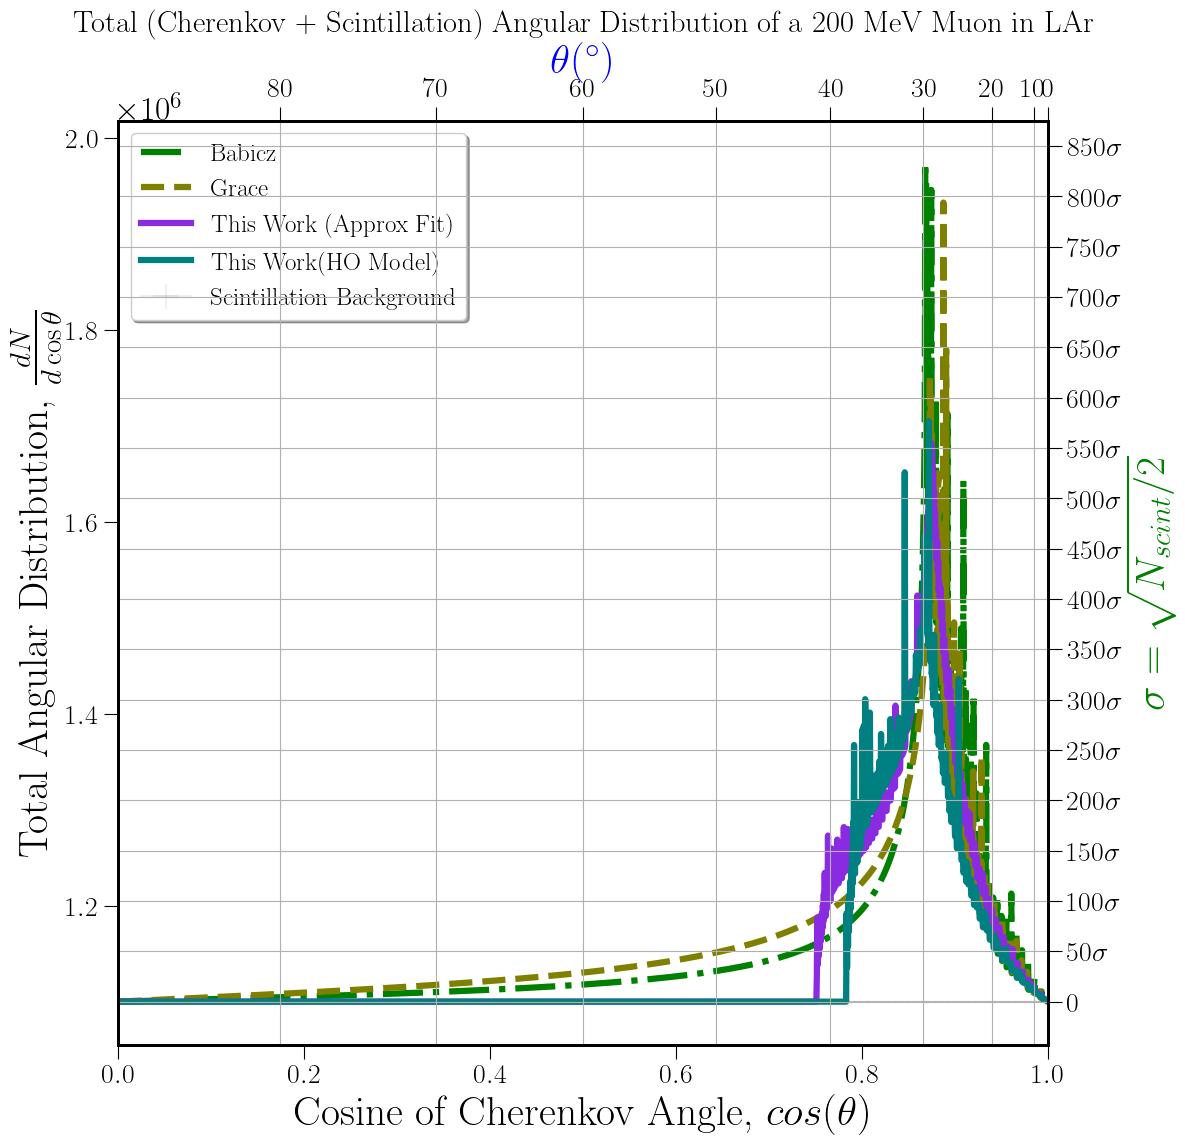

ended:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=25, tm_hour=10, tm_min=2, tm_sec=21, tm_wday=4, tm_yday=115, tm_isdst=0)


In [28]:

################### RUN THE FUNCTION: All Fit

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.001,plotx1=0, plotx2=1)

print('ended: ', time.gmtime())


In [39]:
# Muon AD (sigma plot) Data Saving Version for PID: 300 MeV

#TeX up labels and text: 

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Angular Distribution of Cerenkov Radiation for a 50 MeV Muon: Approx fit (OVERALL FUNCTION)

alpha = 1/137 #Fine-structure (EM coupling) constant 

lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 115.11 #where n is max 

# #Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# #Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Approx Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
# x_all = np.cos(theta)
print(x_all)
# dx = 0.1
# z = np.cos(theta)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd = np.linspace(90,700,2000)

n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf


print("n_uv = {}, n_peak = {}, n_500= {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []


# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([300]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# Choose a filename, ending in .npz

# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_ho.npz'

# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_babicz.npz'


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalistmu(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 *(dx/0.1)* ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * (dx/0.1)* ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchon = [func_angn(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhon = np.add(func_angchon, cerenkovangsumhon)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
            # np.savez(filename1, theta=theta, costheta=x_all, totalho=cerenkovangsumhot, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, scint=scint) #ke=t_arr, 

        
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from HO Model fit: {:.3f}" .format(t[j], sum(cerenkovangsumhot)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        

        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtmu(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtmu(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Approx fit: {:.3f}" .format(t[j], sum(cerenkovangsump)/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from Grace fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumg)/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (dx/0.1)* (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb)

            # np.savez(filename2, theta=theta, costheta=x_all, totalb=cerenkovangsumb, scint=scint) #ke=t_arr, #Save data to .npz file

            
            
#         print(np.shape(cerenkovangsum))
        
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Babicz fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumb)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
#     ax = fig.add_subplot(111)
    
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()

 
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 300 MeV Muon in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$', fontsize=30, color='g')
    ax3.set_xlabel(r'$\theta (^{\circ})$', fontsize=30, color='b')
    
#     # get left axis limits
#     ymin, ymax = ax1.get_ylim()
# # apply function and set transformed values to right axis limits
#     ax2.set_ylim((T_f(ymin),T_f(ymax)))
# # set an invisible artist to twin axes 
# # to prevent falling back to initial values on rescale events
#     ax2.plot([],[])

# plt.show()

    ax2.grid()
    ax3.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax3.tick_params(axis='both',which='major',labelsize=20,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['purple','cadetblue','tomato','dimgray'] 
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']

    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #50 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #100 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #200 MeV
    colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #300 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #400 MeV 'brown','purple'
    # colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #500 MeV   
    # colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1000 MeV   
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
        
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, cerenkov_allb[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashdot', label='Babicz',c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k]))
        ax1.plot(x_all, cerenkov_allg[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashed', label='Grace',c=colors_all[k+1]) #linewidth= 4,
        ax1.plot(x_all, cerenkov_allp[k][0]+scint_all[k][0]/2, linewidth= 4.5, label='This Work (Approx Fit)', c=colors_all[k+2])
        ax1.plot(x_all, (cerenkov_allhot[k][0]+scint_all[k][0]/2), linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO #(dx/0.1)*
        # plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
#         plt.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#     ax1.set_ylim(-0.26,0.26)
#     ax2.set_ylim(4521000,4540000)   #411 MeV: scintp=4521000.0 , sigma= 2126.264329757709

    
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     ax2.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)


    # Set up the right side of the plot with sigma values
    y_ticks = ax1.get_yticks()  # Gets a list of y-axis tick values on the right side
    y_min, y_max = ax1.get_ylim()
    ax2.set_ylim(y_min, y_max)
    sigma_val = np.sqrt(scintp/2)  # Get standard deviation 
    new_yticks = np.arange(scintp/2, y_max, 100*sigma_val)
    new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(100*i) for i in range(1, len(new_yticks))])))
    ax2.set_yticks(new_yticks, labels=new_ytick_labels)

    # Set up the top side of the plot with angle in degrees
    ax3.set_xlim(plotx1, plotx2)
    new_xticks = np.flip(np.cos(np.arange(np.arccos(plotx2), np.arccos(plotx1), np.pi*10/180)))
    new_xtick_labels = np.flip(np.arange(np.arccos(plotx2)*180/np.pi, np.arccos(plotx1)*180/np.pi, 10)).astype(int)
    ax3.set_xticks(new_xticks, labels=new_xtick_labels)

    ax1.set_xlim(plotx1, plotx2)
    # plt.savefig('signal_over_background_Muon_50MeV_approxfit_dxp001.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_Muon_300MeV_allfits_dxp01.jpg', bbox_inches="tight") #,dpi=200
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))
    plt.show()        
    

[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00]
n_uv = 1.10232, n_peak = 1.3605, n_500= 1.2278, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=25, tm_hour=10, tm_min=19, tm_sec=51, tm_wday=4, tm_yday=115, tm_isdst=0)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3535389023.py:191: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3535389023.py:230: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 300 Mev Muon in LAr from HO Model fit: 79114.903
Total Cerenkov photons emitted by a 300 Mev Muon in LAr using Approx fit: 98741.752


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3535389023.py:301: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3535389023.py:301: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1

Total Cerenkov photons emitted by a 300 Mev Muon in LAr from Grace fit: 118671.748
Total Cerenkov photons emitted by a 300 Mev Muon in LAr using Babicz fit: 106596.606
3300000.0000000005 3300000.0000000005


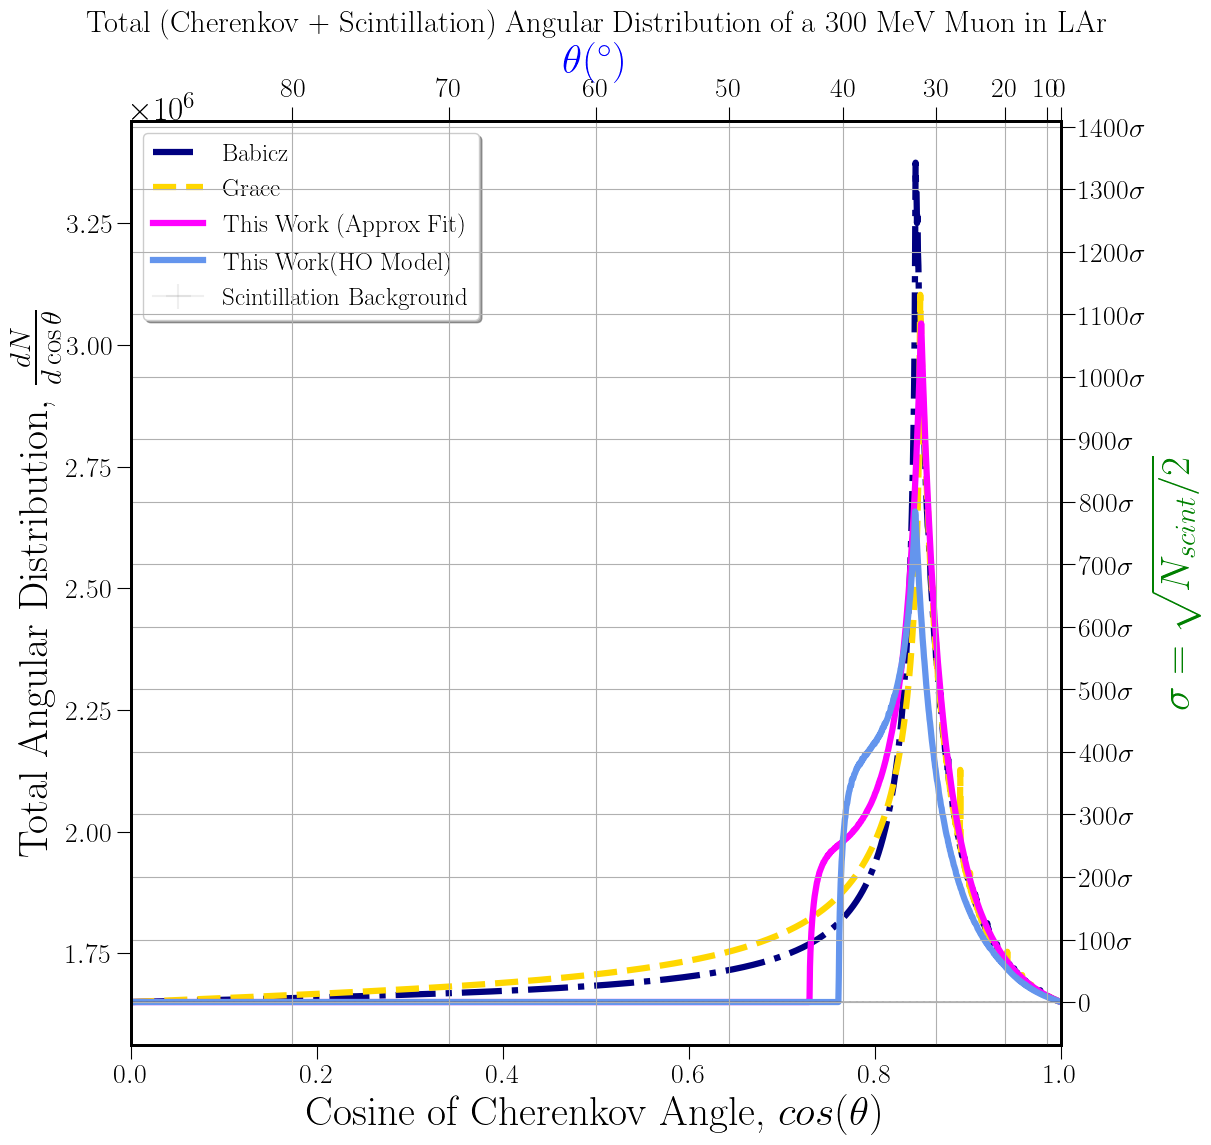

ended:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=25, tm_hour=11, tm_min=34, tm_sec=16, tm_wday=4, tm_yday=115, tm_isdst=0)


In [41]:

################### RUN THE FUNCTION: All Fit

print('started: ', time.gmtime())

find_angular_dist(t_arr, x=0, dx=0.01, plotx1=0, plotx2=1)

print('ended: ', time.gmtime())


In [47]:
# Muon AD (sigma plot) Data Saving Version for PID: 400 MeV

#TeX up labels and text: 

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Angular Distribution of Cerenkov Radiation for a 50 MeV Muon: Approx fit (OVERALL FUNCTION)

alpha = 1/137 #Fine-structure (EM coupling) constant 

lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 115.11 #where n is max 

# #Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# #Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Approx Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
# x_all = np.cos(theta)
print(x_all)
# dx = 0.1
# z = np.cos(theta)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd = np.linspace(90,700,2000)

n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf


print("n_uv = {}, n_peak = {}, n_500= {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []


# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([400]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# Choose a filename, ending in .npz

# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_ho.npz'

# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_babicz.npz'


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalistmu(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 *(dx/0.1)* ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * (dx/0.1)* ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchon = [func_angn(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhon = np.add(func_angchon, cerenkovangsumhon)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
            # np.savez(filename1, theta=theta, costheta=x_all, totalho=cerenkovangsumhot, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, scint=scint) #ke=t_arr, 

        
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from HO Model fit: {:.3f}" .format(t[j], sum(cerenkovangsumhot)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        

        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtmu(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtmu(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Approx fit: {:.3f}" .format(t[j], sum(cerenkovangsump)/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from Grace fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumg)/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (dx/0.1)* (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb)

            # np.savez(filename2, theta=theta, costheta=x_all, totalb=cerenkovangsumb, scint=scint) #ke=t_arr, #Save data to .npz file

            
            
#         print(np.shape(cerenkovangsum))
        
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Babicz fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumb)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
#     ax = fig.add_subplot(111)
    
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()

 
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 400 MeV Muon in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$', fontsize=30, color='g')
    ax3.set_xlabel(r'$\theta (^{\circ})$', fontsize=30, color='b')
    
#     # get left axis limits
#     ymin, ymax = ax1.get_ylim()
# # apply function and set transformed values to right axis limits
#     ax2.set_ylim((T_f(ymin),T_f(ymax)))
# # set an invisible artist to twin axes 
# # to prevent falling back to initial values on rescale events
#     ax2.plot([],[])

# plt.show()

    ax2.grid()
    ax3.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax3.tick_params(axis='both',which='major',labelsize=20,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['purple','cadetblue','tomato','dimgray'] 
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']

    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #50 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #100 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #200 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #300 MeV
    colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #400 MeV 'brown','purple'
    # colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #500 MeV   
    # colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1000 MeV   
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
        
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, cerenkov_allb[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashdot', label='Babicz',c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k]))
        ax1.plot(x_all, cerenkov_allg[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashed', label='Grace',c=colors_all[k+1]) #linewidth= 4,
        ax1.plot(x_all, cerenkov_allp[k][0]+scint_all[k][0]/2, linewidth= 4.5, label='This Work (Approx Fit)', c=colors_all[k+2])
        ax1.plot(x_all, (cerenkov_allhot[k][0]+scint_all[k][0]/2), linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO #(dx/0.1)*
        # plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
#         plt.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#     ax1.set_ylim(-0.26,0.26)
#     ax2.set_ylim(4521000,4540000)   #411 MeV: scintp=4521000.0 , sigma= 2126.264329757709

    
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     ax2.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)


    # Set up the right side of the plot with sigma values
    y_ticks = ax1.get_yticks()  # Gets a list of y-axis tick values on the right side
    y_min, y_max = ax1.get_ylim()
    ax2.set_ylim(y_min, y_max)
    sigma_val = np.sqrt(scintp/2)  # Get standard deviation 
    new_yticks = np.arange(scintp/2, y_max, 500*sigma_val)
    new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(500*i) for i in range(1, len(new_yticks))])))
    ax2.set_yticks(new_yticks, labels=new_ytick_labels)

    # Set up the top side of the plot with angle in degrees
    ax3.set_xlim(plotx1, plotx2)
    new_xticks = np.flip(np.cos(np.arange(np.arccos(plotx2), np.arccos(plotx1), np.pi*10/180)))
    new_xtick_labels = np.flip(np.arange(np.arccos(plotx2)*180/np.pi, np.arccos(plotx1)*180/np.pi, 10)).astype(int)
    ax3.set_xticks(new_xticks, labels=new_xtick_labels)

    ax1.set_xlim(plotx1, plotx2)
    # plt.savefig('signal_over_background_Muon_50MeV_approxfit_dxp001.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_Muon_400MeV_allfits_dxp01.jpg', bbox_inches="tight") #,dpi=200
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))
    plt.show()        
    

[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00]
n_uv = 1.10232, n_peak = 1.3605, n_500= 1.2278, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=25, tm_hour=17, tm_min=22, tm_sec=46, tm_wday=4, tm_yday=115, tm_isdst=0)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\4237390995.py:191: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\4237390995.py:230: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 400 Mev Muon in LAr from HO Model fit: 125403.668
Total Cerenkov photons emitted by a 400 Mev Muon in LAr using Approx fit: 156762.968


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\4237390995.py:301: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\4237390995.py:301: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1

Total Cerenkov photons emitted by a 400 Mev Muon in LAr from Grace fit: 183640.357
Total Cerenkov photons emitted by a 400 Mev Muon in LAr using Babicz fit: 167135.038
4400000.0 4400000.0


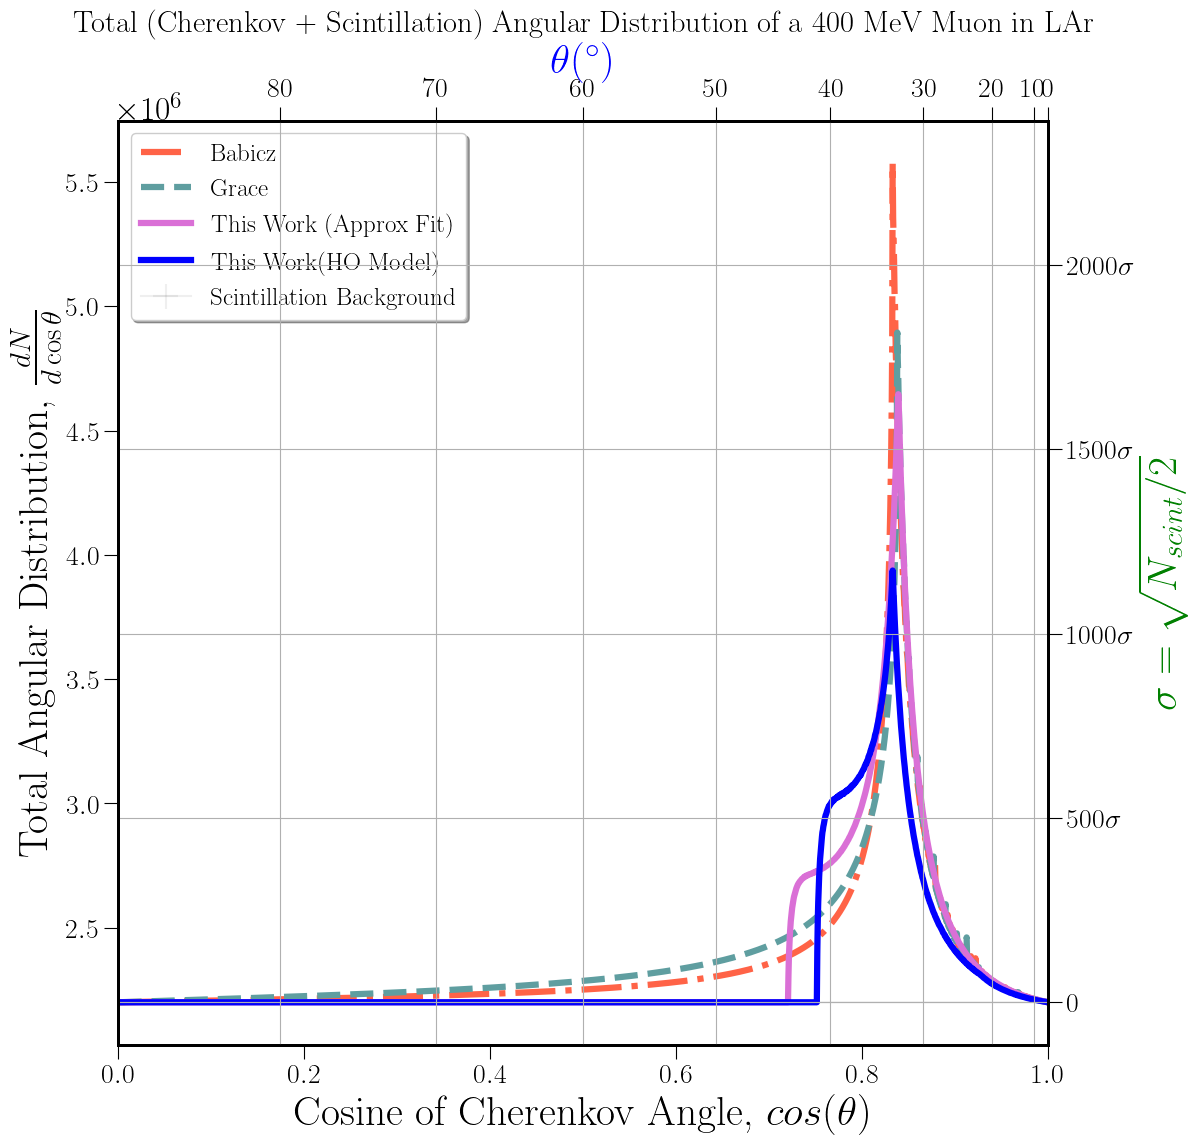

ended:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=25, tm_hour=19, tm_min=22, tm_sec=0, tm_wday=4, tm_yday=115, tm_isdst=0)


In [49]:

################### RUN THE FUNCTION: All Fit

print('started: ', time.gmtime())

find_angular_dist(t_arr, x=0, dx=0.01, plotx1=0, plotx2=1)

print('ended: ', time.gmtime())


In [70]:
# Muon AD (sigma plot) Data Saving Version for PID: 500 MeV

#TeX up labels and text: 

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Angular Distribution of Cerenkov Radiation for a 50 MeV Muon: Approx fit (OVERALL FUNCTION)

alpha = 1/137 #Fine-structure (EM coupling) constant 

lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 115.11 #where n is max 

# #Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# #Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Approx Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
# x_all = np.cos(theta)
print(x_all)
# dx = 0.1
# z = np.cos(theta)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd = np.linspace(90,700,2000)

n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf


print("n_uv = {}, n_peak = {}, n_500= {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []


# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# Choose a filename, ending in .npz

# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_ho.npz'

# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_babicz.npz'


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalistmu(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 *(dx/0.1)* ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * (dx/0.1)* ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchon = [func_angn(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhon = np.add(func_angchon, cerenkovangsumhon)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
            # np.savez(filename1, theta=theta, costheta=x_all, totalho=cerenkovangsumhot, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, scint=scint) #ke=t_arr, 

        
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from HO Model fit: {:.3f}" .format(t[j], sum(cerenkovangsumhot)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        

        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtmu(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtmu(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Approx fit: {:.3f}" .format(t[j], sum(cerenkovangsump)/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from Grace fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumg)/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (dx/0.1)* (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb)

            # np.savez(filename2, theta=theta, costheta=x_all, totalb=cerenkovangsumb, scint=scint) #ke=t_arr, #Save data to .npz file

            
            
#         print(np.shape(cerenkovangsum))
        
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Babicz fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumb)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
#     ax = fig.add_subplot(111)
    
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()

 
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 500 MeV Muon in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$', fontsize=30, color='g')
    ax3.set_xlabel(r'$\theta (^{\circ})$', fontsize=30, color='b')
    
#     # get left axis limits
#     ymin, ymax = ax1.get_ylim()
# # apply function and set transformed values to right axis limits
#     ax2.set_ylim((T_f(ymin),T_f(ymax)))
# # set an invisible artist to twin axes 
# # to prevent falling back to initial values on rescale events
#     ax2.plot([],[])

# plt.show()

    ax2.grid()
    ax3.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax3.tick_params(axis='both',which='major',labelsize=20,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['purple','cadetblue','tomato','dimgray'] 
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']

    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #50 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #100 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #200 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #300 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #400 MeV 'brown','purple'
    colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #500 MeV
    # colors_all = ['purple','red','orange','deepskyblue','dimgrey']  #800 Mev
    # colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1000 MeV   
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
        
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, cerenkov_allb[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashdot', label='Babicz',c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k]))
        ax1.plot(x_all, cerenkov_allg[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashed', label='Grace',c=colors_all[k+1]) #linewidth= 4,
        ax1.plot(x_all, cerenkov_allp[k][0]+scint_all[k][0]/2, linewidth= 4.5, label='This Work(Approx Fit)', c=colors_all[k+2])
        ax1.plot(x_all, (cerenkov_allhot[k][0]+scint_all[k][0]/2), linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO #(dx/0.1)*
        # plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
#         plt.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#     ax1.set_ylim(-0.26,0.26)
#     ax2.set_ylim(4521000,4540000)   #411 MeV: scintp=4521000.0 , sigma= 2126.264329757709

    
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     ax2.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)


    # Set up the right side of the plot with sigma values
    y_ticks = ax1.get_yticks()  # Gets a list of y-axis tick values on the right side
    y_min, y_max = ax1.get_ylim()
    ax2.set_ylim(y_min, y_max)
    sigma_val = np.sqrt(scintp/2)  # Get standard deviation 
    new_yticks = np.arange(scintp/2, y_max, 500*sigma_val)
    new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(500*i) for i in range(1, len(new_yticks))])))
    ax2.set_yticks(new_yticks, labels=new_ytick_labels)

    # Set up the top side of the plot with angle in degrees
    ax3.set_xlim(plotx1, plotx2)
    new_xticks = np.flip(np.cos(np.arange(np.arccos(plotx2), np.arccos(plotx1), np.pi*10/180)))
    new_xtick_labels = np.flip(np.arange(np.arccos(plotx2)*180/np.pi, np.arccos(plotx1)*180/np.pi, 10)).astype(int)
    ax3.set_xticks(new_xticks, labels=new_xtick_labels)

    ax1.set_xlim(plotx1, plotx2)
    # plt.savefig('signal_over_background_Muon_50MeV_approxfit_dxp001.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_Muon_500MeV_allfits_dxp01.jpg', bbox_inches="tight") #,dpi=200
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))
    plt.show()        
    

[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00]
n_uv = 1.10232, n_peak = 1.3605, n_500= 1.2278, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=26, tm_hour=4, tm_min=56, tm_sec=1, tm_wday=5, tm_yday=116, tm_isdst=0)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3040126625.py:191: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3040126625.py:230: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 500 Mev Muon in LAr from HO Model fit: 172711.423
Total Cerenkov photons emitted by a 500 Mev Muon in LAr using Approx fit: 216102.497


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3040126625.py:301: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\3040126625.py:301: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1

Total Cerenkov photons emitted by a 500 Mev Muon in LAr from Grace fit: 249816.514
Total Cerenkov photons emitted by a 500 Mev Muon in LAr using Babicz fit: 228518.104
5500000.0 5500000.0


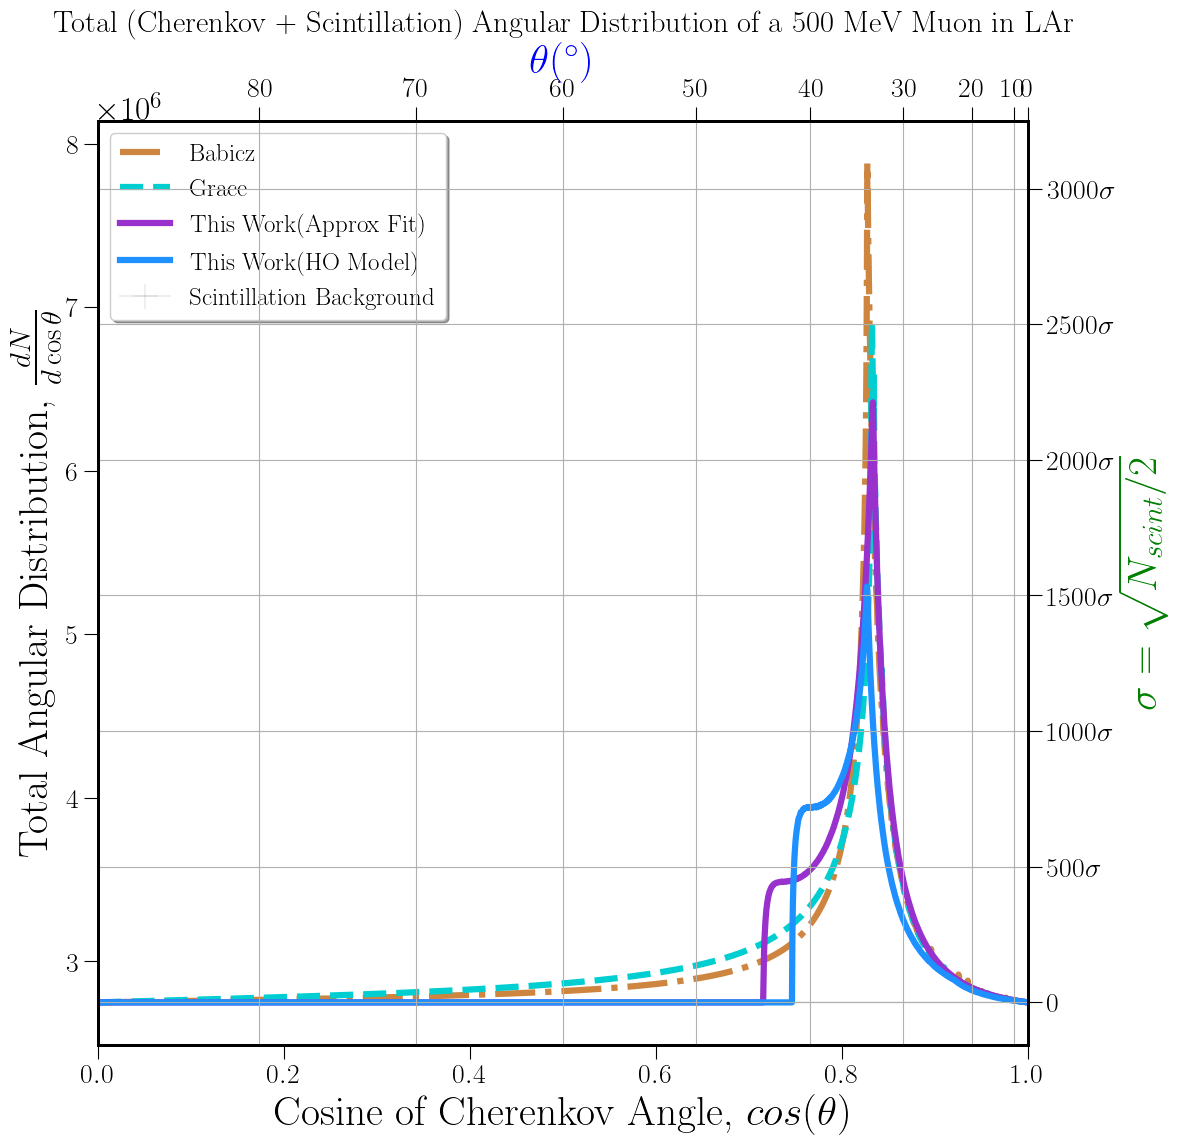

ended:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=26, tm_hour=7, tm_min=18, tm_sec=48, tm_wday=5, tm_yday=116, tm_isdst=0)


In [72]:

################### RUN THE FUNCTION: All Fit

print('started: ', time.gmtime())

find_angular_dist(t_arr, x=0, dx=0.01, plotx1=0, plotx2=1)

print('ended: ', time.gmtime())


In [90]:
# Muon AD (sigma plot) Data Saving Version for PID: 800/1000 MeV

#TeX up labels and text: 

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Angular Distribution of Cerenkov Radiation for a 50 MeV Muon: Approx fit (OVERALL FUNCTION)

alpha = 1/137 #Fine-structure (EM coupling) constant 

lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 115.11 #where n is max 

# #Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# #Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Approx Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
# x_all = np.cos(theta)
print(x_all)
# dx = 0.1
# z = np.cos(theta)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# lamd = np.linspace(90,700,2000)

n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf


print("n_uv = {}, n_peak = {}, n_500= {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []


# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([1000]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# Choose a filename, ending in .npz

# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_ho.npz'

# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu50_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_mu100_babicz.npz'


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalistmu(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 *(dx/0.1)* ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * (dx/0.1)* ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchon = [func_angn(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhon = np.add(func_angchon, cerenkovangsumhon)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
            # np.savez(filename1, theta=theta, costheta=x_all, totalho=cerenkovangsumhot, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, scint=scint) #ke=t_arr, 

        
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from HO Model fit: {:.3f}" .format(t[j], sum(cerenkovangsumhot)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        

        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtmu(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (dx/0.1) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtmu(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Approx fit: {:.3f}" .format(t[j], sum(cerenkovangsump)/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr from Grace fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumg)/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (dx/0.1)* (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb)

            # np.savez(filename2, theta=theta, costheta=x_all, totalb=cerenkovangsumb, scint=scint) #ke=t_arr, #Save data to .npz file

            
            
#         print(np.shape(cerenkovangsum))
        
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Muon in LAr using Babicz fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumb)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
#     ax = fig.add_subplot(111)
    
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()

 
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of 1000 MeV Muon in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$', fontsize=30, color='g')
    ax3.set_xlabel(r'$\theta (^{\circ})$', fontsize=30, color='b')
    
#     # get left axis limits
#     ymin, ymax = ax1.get_ylim()
# # apply function and set transformed values to right axis limits
#     ax2.set_ylim((T_f(ymin),T_f(ymax)))
# # set an invisible artist to twin axes 
# # to prevent falling back to initial values on rescale events
#     ax2.plot([],[])

# plt.show()

    ax2.grid()
    ax3.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax3.tick_params(axis='both',which='major',labelsize=20,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['purple','cadetblue','tomato','dimgray'] 
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']

    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #50 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #100 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #200 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #300 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #400 MeV 'brown','purple'
    # colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #500 MeV
    # colors_all = ['purple','red','orange','deepskyblue','dimgrey']  #800 Mev
    colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1000 MeV   
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
        
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, cerenkov_allb[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashdot', label='Babicz',c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k]))
        ax1.plot(x_all, cerenkov_allg[k][0]+scint_all[k][0]/2, linewidth= 4.5, ls= 'dashed', label='Grace',c=colors_all[k+1]) #linewidth= 4,
        ax1.plot(x_all, cerenkov_allp[k][0]+scint_all[k][0]/2, linewidth= 4.5, label='This Work(Approx Fit)', c=colors_all[k+2])
        ax1.plot(x_all, (cerenkov_allhot[k][0]+scint_all[k][0]/2), linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO #(dx/0.1)*
        # plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
#         plt.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k]))
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
#     ax1.set_ylim(-0.26,0.26)
#     ax2.set_ylim(4521000,4540000)   #411 MeV: scintp=4521000.0 , sigma= 2126.264329757709

    
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     ax2.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)


    # Set up the right side of the plot with sigma values
    y_ticks = ax1.get_yticks()  # Gets a list of y-axis tick values on the right side
    y_min, y_max = ax1.get_ylim()
    ax2.set_ylim(y_min, y_max)
    sigma_val = np.sqrt(scintp/2)  # Get standard deviation 
    new_yticks = np.arange(scintp/2, y_max, 1000*sigma_val)
    new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(1000*i) for i in range(1, len(new_yticks))])))
    ax2.set_yticks(new_yticks, labels=new_ytick_labels)

    # Set up the top side of the plot with angle in degrees
    ax3.set_xlim(plotx1, plotx2)
    new_xticks = np.flip(np.cos(np.arange(np.arccos(plotx2), np.arccos(plotx1), np.pi*10/180)))
    new_xtick_labels = np.flip(np.arange(np.arccos(plotx2)*180/np.pi, np.arccos(plotx1)*180/np.pi, 10)).astype(int)
    ax3.set_xticks(new_xticks, labels=new_xtick_labels)

    ax1.set_xlim(plotx1, plotx2)
    # plt.savefig('signal_over_background_Muon_50MeV_approxfit_dxp001.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_Muon_1000MeV_allfits_dxp01.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_Muon_1000MeV_allfits_dxp01.jpg', bbox_inches="tight") #,dpi=200
    #     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))
    plt.show()        
    

[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00]
n_uv = 1.10232, n_peak = 1.3605, n_500= 1.2278, n_asymtote = 1.222558964716


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\939112208.py:75: RuntimeWarning: divide by zero encountered in power
  n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\939112208.py:75: RuntimeWarning: invalid value encountered in divide
  n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=27, tm_hour=2, tm_min=19, tm_sec=32, tm_wday=6, tm_yday=117, tm_isdst=0)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\939112208.py:191: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\939112208.py:230: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 1000 Mev Muon in LAr from HO Model fit: 381008.215
Total Cerenkov photons emitted by a 1000 Mev Muon in LAr using Approx fit: 510755.974


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\939112208.py:301: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_22704\939112208.py:301: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6 * (dx/0.1) * (alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/

Total Cerenkov photons emitted by a 1000 Mev Muon in LAr from Grace fit: 576067.132
Total Cerenkov photons emitted by a 1000 Mev Muon in LAr using Babicz fit: 533778.855
11000000.0 11000000.0


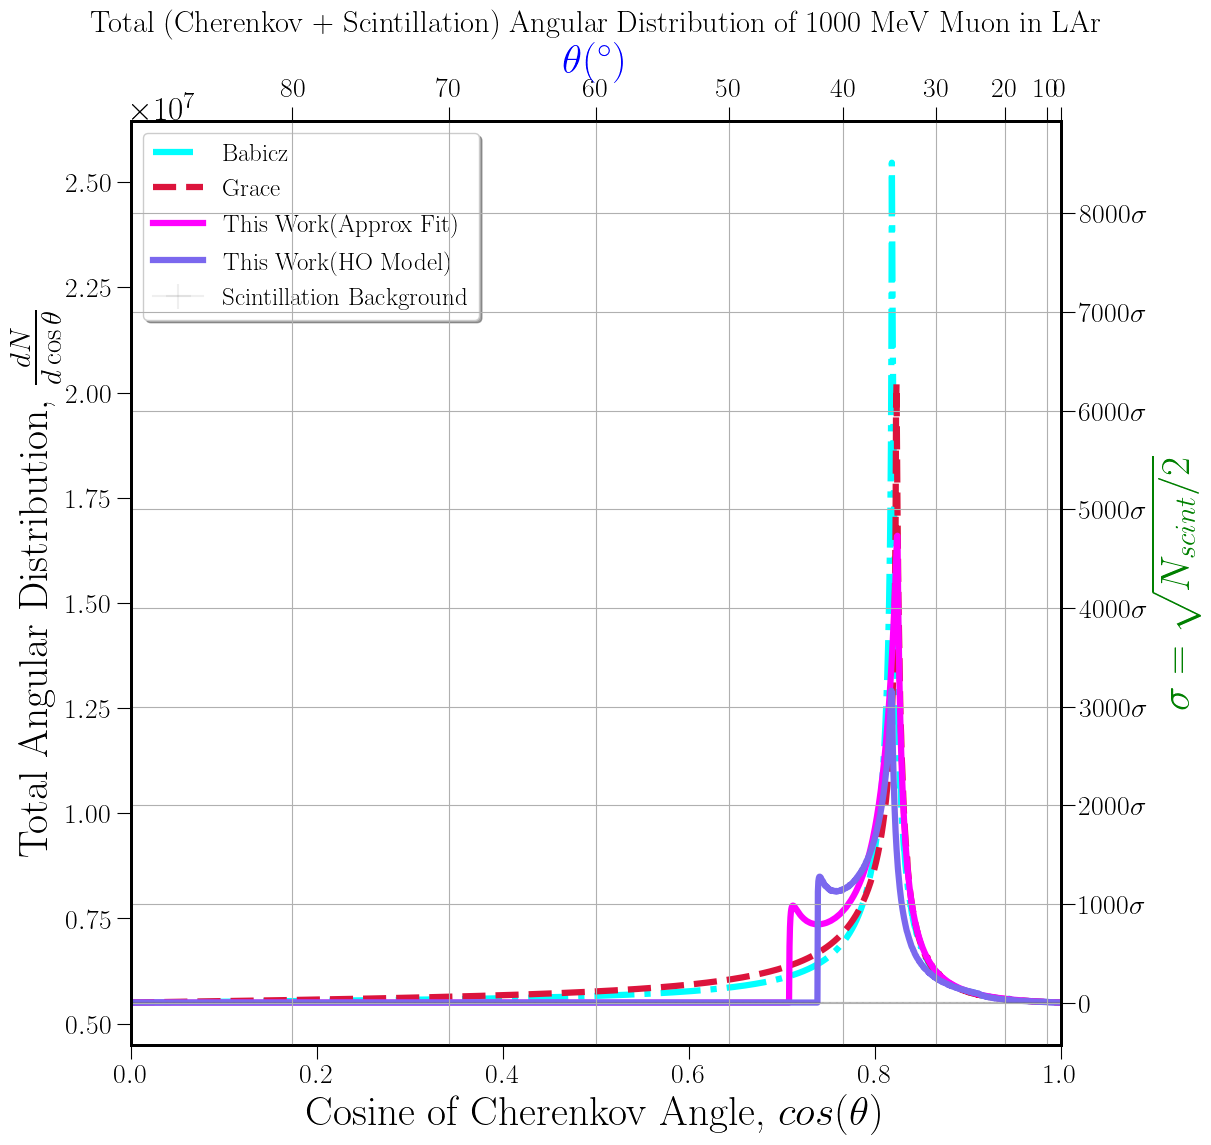

ended:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=27, tm_hour=7, tm_min=10, tm_sec=12, tm_wday=6, tm_yday=117, tm_isdst=0)


In [92]:

################### RUN THE FUNCTION: All Fit

print('started: ', time.gmtime())

find_angular_dist(t_arr, x=0, dx=0.01, plotx1=0, plotx2=1)

print('ended: ', time.gmtime())


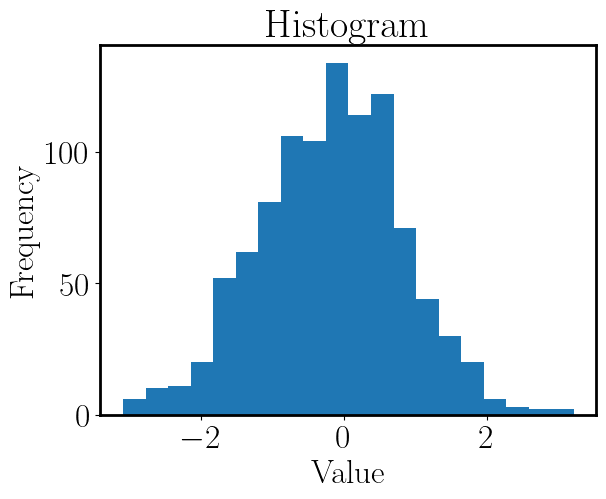

52


In [240]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = np.random.normal(0, 1, 1000)  # Example data

# Calculate histogram
hist, bin_edges = np.histogram(data, bins=20)

# Calculate bar width
bin_width = bin_edges[1] - bin_edges[0]

# Create the histogram
plt.bar(bin_edges[:-1], hist, width=bin_width)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

# Accessing the frequency of a specific bin
# Example: get the frequency of the 5th bin
frequency_of_5th_bin = hist[4]
print(frequency_of_5th_bin)